In [67]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [68]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
dens = os.listdir('../../../../txt_files/random_txt_files/Align_press_CoM')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../../../txt_files/random_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../txt_files/random_txt_files/PhaseComp')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres3 = os.listdir('../../../../txt_files/random_txt_files/lat')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [69]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [70]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       36746  6207.701026   1010.589803   5197.111223
1     0.1  5.016308       36315  5409.157318    826.619753   4582.537566
2     0.2  5.016308       37016  4376.186231    610.696721   3765.489509
3     0.3  5.016308       37506  3417.721917    464.568570   2953.153348
4     0.4  5.016308       37964  2664.702255    329.930039   2334.772216
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23019  1046.856162     79.296310    967.559852
995  99.5  5.016308       22006  1194.038490     89.310957   1104.727533
996  99.6  5.016308       23314  1181.725123     82.000246   1099.724877
997  99.7  5.016308       22746  1251.065049     77.487087   1173.577962
998  99.8  5.016308       21583  1254.704922    109.108891   1145.596031

[999 rows x 6 columns]

In [71]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  250  50.0  1.0  60.0   0.000001
1   0   50   50  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  350  50.0  1.0  60.0   0.000001
4   0   50  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  250  250  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  350  350  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [72]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       36746  6207.701026   1010.589803   5197.111223
1     0.1  5.016308       36315  5409.157318    826.619753   4582.537566
2     0.2  5.016308       37016  4376.186231    610.696721   3765.489509
3     0.3  5.016308       37506  3417.721917    464.568570   2953.153348
4     0.4  5.016308       37964  2664.702255    329.930039   2334.772216
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23019  1046.856162     79.296310    967.559852
995  99.5  5.016308       22006  1194.038490     89.310957   1104.727533
996  99.6  5.016308       23314  1181.725123     82.000246   1099.724877
997  99.7  5.016308       22746  1251.065049     77.487087   1173.577962
998  99.8  5.016308       21583  1254.704922    109.108891   1145.596031

[999 rows x 6 columns]

5.016308
36746


In [73]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea    gasSigXX   gasSigXY   gasSigYX    gasSigYY  \
0         0.0  38018.311    2375.154    -28.372    -28.372    2414.880   
1         0.1  44513.889   77255.194   3252.828   3252.828   78421.514   
2         0.2  43622.239   59034.237  -1976.006  -1976.006   50884.923   
3         0.3  42930.004   56950.722   -906.442   -906.442   50310.785   
4         0.4  42383.837   73100.650   1045.576   1045.576   66369.749   
..        ...        ...         ...        ...        ...         ...   
147      14.7  41671.280  223892.982   8582.117   8582.117  220370.547   
148      14.8  41509.970  229336.955  -1904.808  -1904.808  231464.430   
149      14.9  41582.369  224959.601   7593.650   7593.650  226025.404   
150      15.0  41628.094  213214.636 -10970.056 -10970.056  212120.252   
151      15.1  41603.961  223321.607   4550.597   4550.597  217253.890   

       gasTrace   bulkArea     bulkSigXX    bulkSigXY    bulkSigYX  \
0      2366.645  25095.743  7.128161e+07    14131.687    14131.687   
1     81091.182  18831.334  4.968946e+08  2209483.077  2209483.077   
2     52983.574  19571.835  4.190462e+08  1208557.691  1208557.691   
3     52724.311  20237.396  3.434012e+08   716554.830   716554.830   
4     70780.776  20688.302  2.843977e+08  1262609.309  1262609.309   
..          ...        ...           ...          ...          ...   
147  230713.881  21017.272  1.409051e+08  -632749.822  -632749.822   
148  228495.885  21109.994  1.417845e+08   100699.696   100699.696   
149  233086.152  21136.667  1.441829e+08  -916399.267  -916399.267   
150  201697.388  21068.078  1.432806e+08  -112728.591  -112728.591   
151  224838.346  21126.506  1.415366e+08 -1067644.996 -1067644.996   

        bulkSigYY     bulkTrace  Length  NDense  
0    7.124745e+07  7.127866e+07   521.8   45750  
1    4.910797e+08  4.961966e+08   459.8   46021  
2    4.118017e+08  4.166325e+08   509.4   46458  
3    3.383948e+08  3.416146e+08   522.9   46576  
4    2.775112e+08  2.822171e+08   535.3   46367  
..            ...           ...     ...     ...  
147  1.386405e+08  1.391401e+08   630.0   43241  
148  1.382369e+08  1.401114e+08   666.1   43475  
149  1.408811e+08  1.416156e+08   626.6   43517  
150  1.414562e+08  1.422557e+08   633.4   43452  
151  1.398602e+08  1.396308e+08   617.6   43380  

[152 rows x 15 columns]

In [74]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  200  50.0  1.0  60.0   0.000001
1   0   50   50  50.0  1.0  60.0   0.000001
2   0   50  450  50.0  1.0  60.0   0.000001
3   0   50  100  50.0  1.0  60.0   0.000001
4   0   50  250  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  250  250  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [75]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0         0.0  41578.558    46387.834    -80.322    -80.322    45632.886   
1         0.1  44786.972   627678.357   4629.446   4629.446   643038.799   
2         0.2  45314.087   591800.106  -1547.336  -1547.336   578693.233   
3         0.3  44940.661   566853.805   -830.419   -830.419   559308.539   
4         0.4  44463.083   536384.546  -8537.203  -8537.203   538323.757   
..        ...        ...          ...        ...        ...          ...   
995      99.5  49872.677  1981433.405  -5708.625  -5708.625  2000753.458   
996      99.6  49431.933  1941806.012  -4792.838  -4792.838  1957711.959   
997      99.7  49435.744  1895456.284  -9544.669  -9544.669  1936777.942   
998      99.8  49273.164  1858386.825  -6704.221  -6704.221  1854565.021   
999      99.9  50221.970  1914073.086  10278.964  10278.964  1922230.318   

        gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0      45930.038  21610.435  1.710410e+07     980.538     980.538   
1     639988.024  18066.700  5.585550e+07 -393400.790 -393400.790   
2     583699.333  17600.552  7.428493e+07  -52874.149  -52874.149   
3     562250.753  17938.414  7.366519e+07    1843.776    1843.776   
4     528816.948  18451.557  6.633622e+07 -118781.542 -118781.542   
..           ...        ...           ...         ...         ...   
995  1985384.806  11390.759  1.663338e+07  158646.441  158646.441   
996  1944966.147  11430.134  1.751383e+07   54775.411   54775.411   
997  1906572.445  11578.743  1.767704e+07   41691.559   41691.559   
998  1849771.702  11681.625  1.737415e+07  -68325.701  -68325.701   
999  1928430.666  11738.782  1.749154e+07  -74723.576  -74723.576   

        bulkSigYY     bulkTrace  Length  NDense  
0    1.710044e+07  1.710325e+07   511.7   33691  
1    5.556288e+07  5.531579e+07   641.3   33341  
2    7.423178e+07  7.420548e+07   627.7   33810  
3    7.365925e+07  7.366406e+07   617.6   34312  
4    6.736780e+07  6.673323e+07   614.2   34682  
..            ...           ...     ...     ...  
995  1.652005e+07  1.673536e+07  1109.0   20480  
996  1.708461e+07  1.735399e+07  1199.1   20911  
997  1.733678e+07  1.754860e+07  1163.1   21034  
998  1.743055e+07  1.733403e+07  1218.3   21227  
999  1.737000e+07  1.735604e+07   921.9   20735  

[1000 rows x 15 columns]

41578.558
46387.834


In [76]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_txt_files/PhaseComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.016308       45750     7365     7510        326    1930    1975   
1     0.1  5.016308       46021     8296     8441        268    1854    1862   
2     0.2  5.016308       46458     8586     8734        284    1558    1603   
3     0.3  5.016308       46576     8831     8949        302    1574    1497   
4     0.4  5.016308       46367     8818     8945        311    1665    1551   
..    ...       ...         ...      ...      ...        ...     ...     ...   
994  99.4  5.016308       43296    12496    12582        501    2961    3015   
995  99.5  5.016308       43282    12385    12456        494    3031    3124   
996  99.6  5.016308       43256    12236    12288        486    2988    3061   
997  99.7  5.016308       43140    12700    12710        504    3132    3181   
998  99.8  5.016308       43189    13001    13041        519    3081    3118   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0        1422   15705   15515       853       0       0         0  
1        1673   14850   14697       660       0       0         0  
2        1644   14856   14663       673       0       0         0  
3        1636   14595   14554       663       0       0         0  
4        1608   14517   14504       682       0       0         0  
..        ...     ...     ...       ...     ...     ...       ...  
994      1545    9543    9403       555       0       0         0  
995      1579    9584    9420       528       0       0         0  
996      1560    9776    9651       555       0       0         0  
997      1584    9168    9109       513       0       0         0  
998      1572    8918    8841       510       0       0         0  

[999 rows x 15 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 450.0, 100.0, 150.0, 50.0, 350.0, 100.0, 150.0, 450.0, 200.0, 350.0, 250.0, 350.0, 450.0, 150.0, 200.0, 250.0, 450.0, 250.0, 200.0, 350.0, 450.0, 250.0, 350.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 

In [77]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  200  50.0  1.0  60.0   0.000001
1   0   50  250  50.0  1.0  60.0   0.000001
2   0   50  450  50.0  1.0  60.0   0.000001
3   0   50  100  50.0  1.0  60.0   0.000001
4   0   50  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  250  350  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [78]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.016308       33691     4788     4779        252    7361    7598   
1     0.1  5.016308       33341     5050     5058        228    7795    7768   
2     0.2  5.016308       33810     5114     5125        212    7715    7359   
3     0.3  5.016308       34312     5078     5069        209    7558    6998   
4     0.4  5.016308       34682     5319     5341        223    7371    6656   
..    ...       ...         ...      ...      ...        ...     ...     ...   
589  58.9  5.016308       23011     2995     4436        180   15539    9851   
590  59.0  5.016308       23040     3040     4539        185   15002    9454   
591  59.1  5.016308       23054     3051     4569        186   15827    9912   
592  59.2  5.016308       23097     2924     4392        178   15459    9700   
593  59.3  5.016308       23451     2797     4208        170   15311    9544   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0        1553   12851   12623       796       0       0         0  
1        1665   12155   12174       708       0       0         0  
2        1676   12171   12516       713       0       0         0  
3        1657   12364   12933       735       0       0         0  
4        1627   12310   13003       751       0       0         0  
..        ...     ...     ...       ...     ...     ...       ...  
589      1823    6390   10668       587      76      45        11  
590      1757    6869   10960       646      89      47        13  
591      1859    6122   10519       556       0       0         0  
592      1823    6300   10710       565     317     198        35  
593      1792    6380   10888       579     512     360        60  

[594 rows x 15 columns]

5.016308
33691


In [79]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_txt_files/lat')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0     0.0  5.016308       44587       0.814662      0.866406           0.0   
1     0.1  5.016308       44767       0.700029      0.762972           0.0   
2     0.2  5.016308       45243       0.702968      0.777046           0.0   
3     0.3  5.016308       45519       0.713358      0.784183           0.0   
4     0.4  5.016308       45595       0.723361      0.797032           0.0   
..    ...       ...         ...            ...           ...           ...   
419  41.9  5.016308       43430       0.785632      0.879263           0.0   
420  42.0  5.016308       43459       0.786071      0.887881           0.0   
421  42.1  5.016308       43353       0.785242      0.871968           0.0   
422  42.2  5.016308       43174       0.784844      0.875059           0.0   
423  42.3  5.016308       43112       0.785312      0.880580           0.0   

     lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0        0.847562      0.002587     0.216863          0.0     0.174714  
1        0.741120      0.004905     0.225911          0.0     0.184997  
2        0.750905      0.003716     0.224665          0.0     0.184177  
3        0.758891      0.003614     0.206051          0.0     0.168676  
4        0.769324      0.003895     0.205337          0.0     0.166086  
..            ...           ...          ...          ...          ...  
419      0.821434      0.011298     0.273825          0.0     0.175555  
420      0.827125      0.011826     0.295065          0.0     0.194127  
421      0.820962      0.011363     0.255582          0.0     0.169711  
422      0.822431      0.011572     0.262658          0.0     0.175498  
423      0.825225      0.011208     0.286048          0.0     0.191213  

[424 rows x 11 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 350.0], [250.0, 200.0, 150.0, 100.0, 350.0, 350.0, 100.0, 200.0, 150.0, 250.0, 350.0, 200.0, 250.0, 150.0, 200.0, 250.0, 350.0, 350.0, 250.0, 350.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [80]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new2)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  250  50.0  1.0  60.0   0.000001
1   0   50  200  50.0  1.0  60.0   0.000001
2   0   50  150  50.0  1.0  60.0   0.000001
3   0   50  100  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
15  0  200  250  50.0  1.0  60.0   0.000001
16  0  200  350  50.0  1.0  60.0   0.000001
17  0  250  350  50.0  1.0  60.0   0.000001
18  0  250  250  50.0  1.0  60.0   0.000001
19  0  350  350  50.0  1.0  60.0   0.000001

[20 rows x 7 columns]

In [81]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0     0.0  5.016308       36746       0.864532      0.920160      0.000000   
1     0.1  5.016308       36315       0.789805      0.858961      0.000000   
2     0.2  5.016308       37016       0.759146      0.851514      0.000000   
3     0.3  5.016308       37506       0.760546      0.856227      0.000000   
4     0.4  5.016308       37964       0.767643      0.870296      0.000000   
..    ...       ...         ...            ...           ...           ...   
785  78.5  5.016308       23735       0.826071      0.966703      1.417557   
786  78.6  5.016308       23405       0.827225      0.964152      1.414925   
787  78.7  5.016308       23777       0.826949      0.960221      1.365632   
788  78.8  5.016308       23411       0.828320      0.961790      1.431028   
789  78.9  5.016308       23777       0.829592      0.951134      1.298418   

     lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0        0.904051      0.003982     0.191682     0.000000     0.163534  
1        0.837461      0.015486     0.245650     0.000000     0.206598  
2        0.822359      0.005644     0.242704     0.000000     0.205341  
3        0.823778      0.005333     0.236515     0.000000     0.197559  
4        0.834413      0.004759     0.249873     0.000000     0.207401  
..            ...           ...          ...          ...          ...  
785      0.923736      0.017647     0.220912     0.268529     0.200696  
786      0.923153      0.017443     0.219006     0.266326     0.200260  
787      0.920320      0.016918     0.209709     0.244036     0.191046  
788      0.915669      0.017502     0.216746     0.306737     0.189578  
789      0.909316      0.019014     0.207152     0.194733     0.178592  

[790 rows x 11 columns]

5.016308
36746


In [82]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.764#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [83]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


1.9572923144379406
2.170672352850999


/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in true_divide
/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in true_divide
/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide


1.6886254889024315
2.481132978812659
1.7671953053229785
1.7225096007209282
1.8544445176656683
2.284779534332567
1.9508290751619903
2.2242455501891247
2.0493803693051653
2.066429311956096
2.306157419090788
2.4774644383674436
2.289469119883209
2.6644681836594573
3.0262476356184456


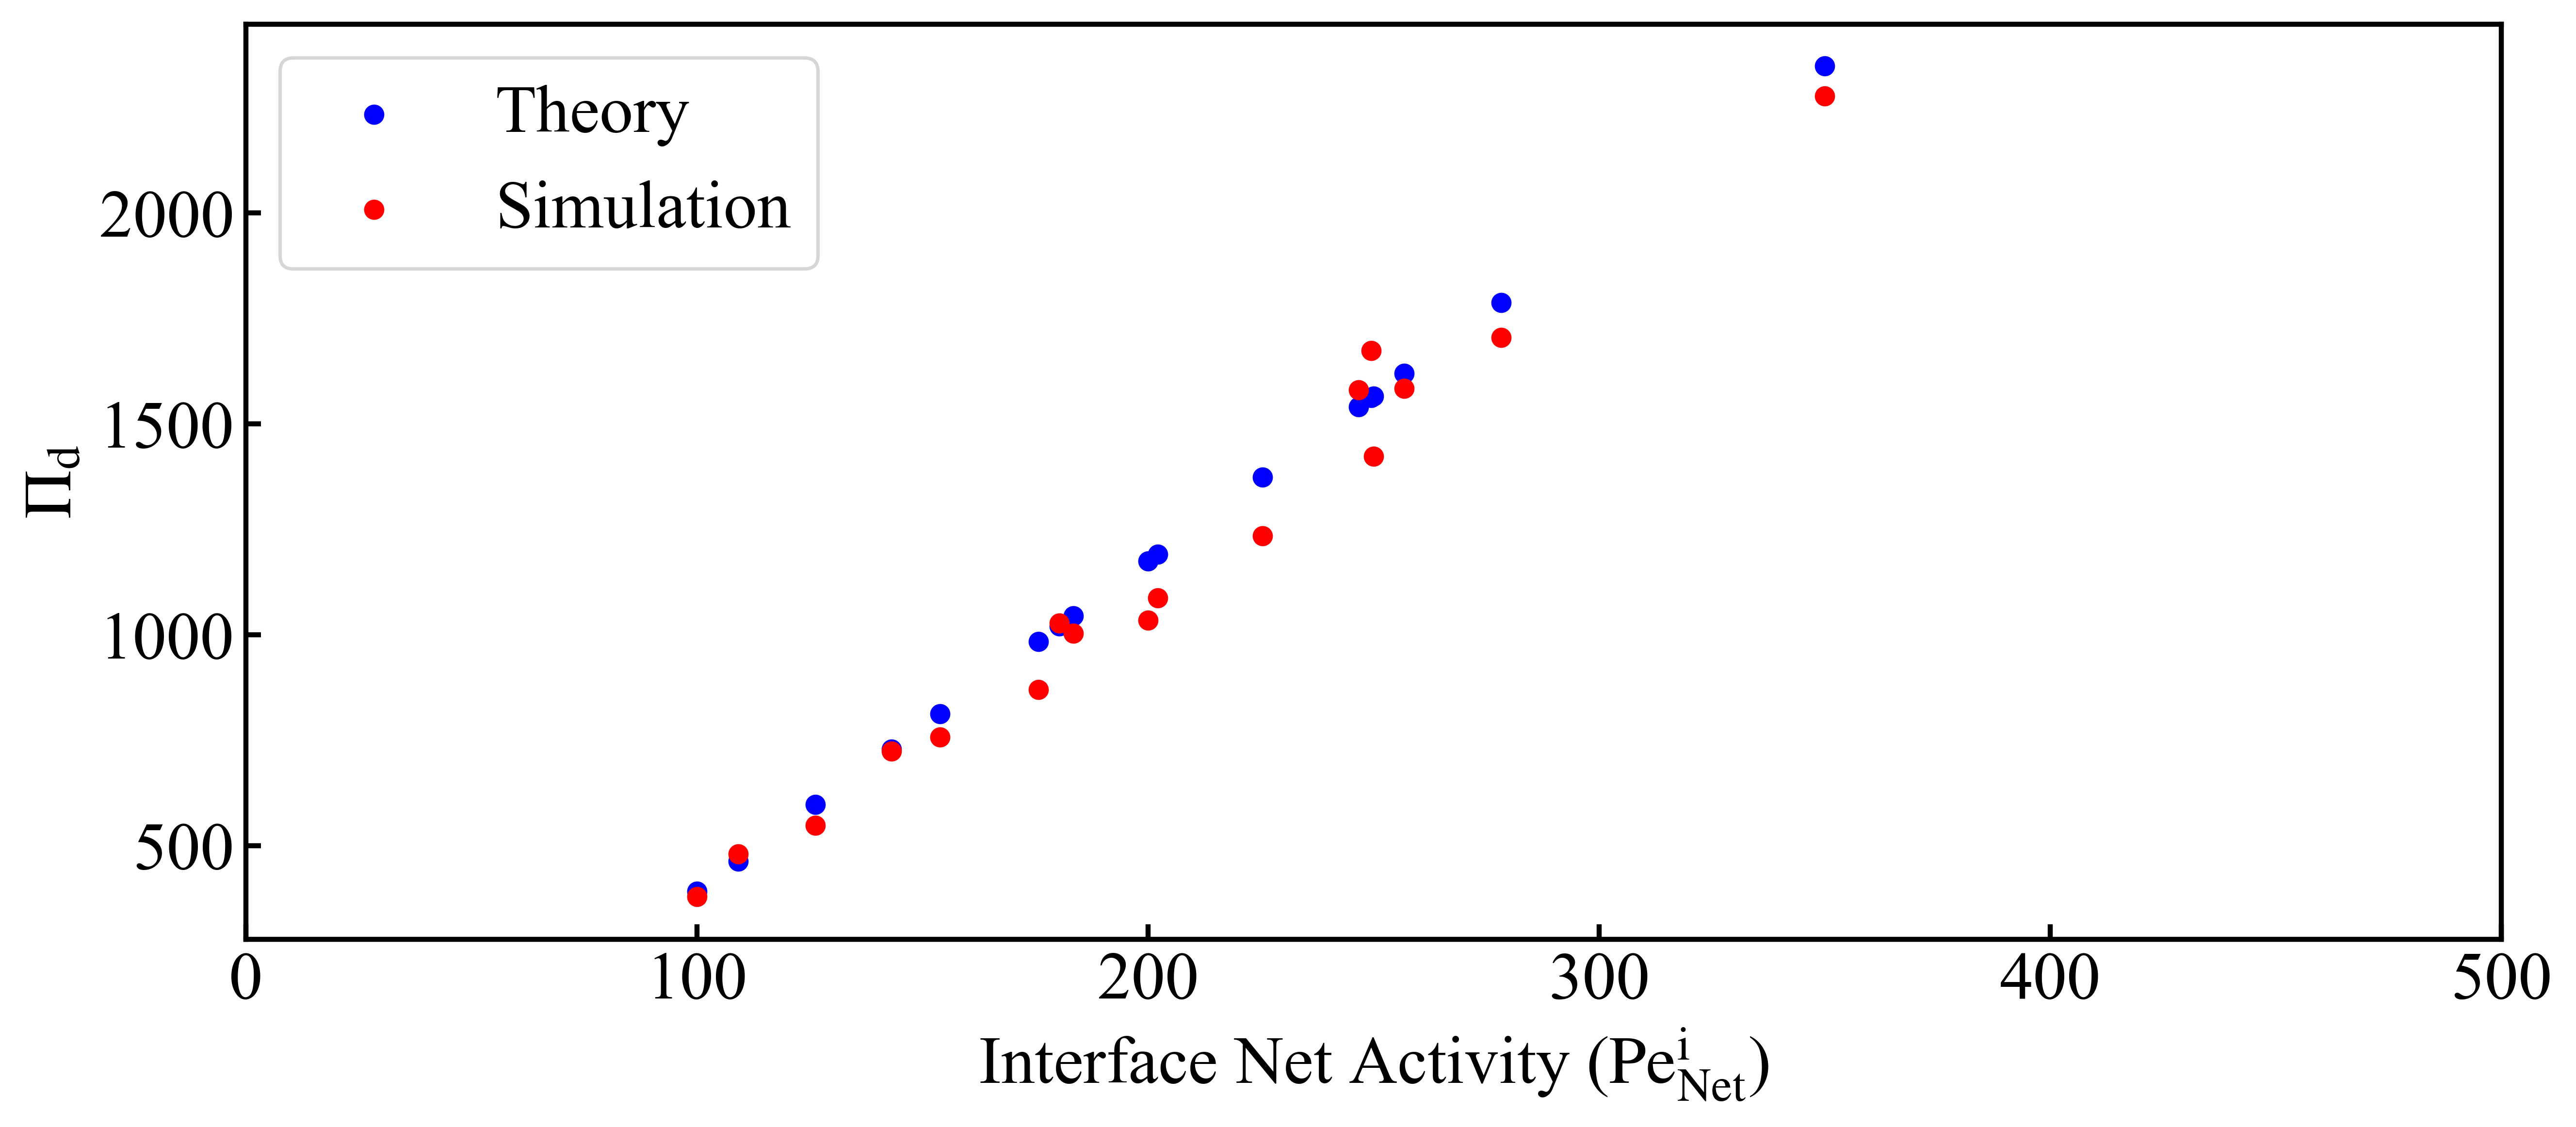

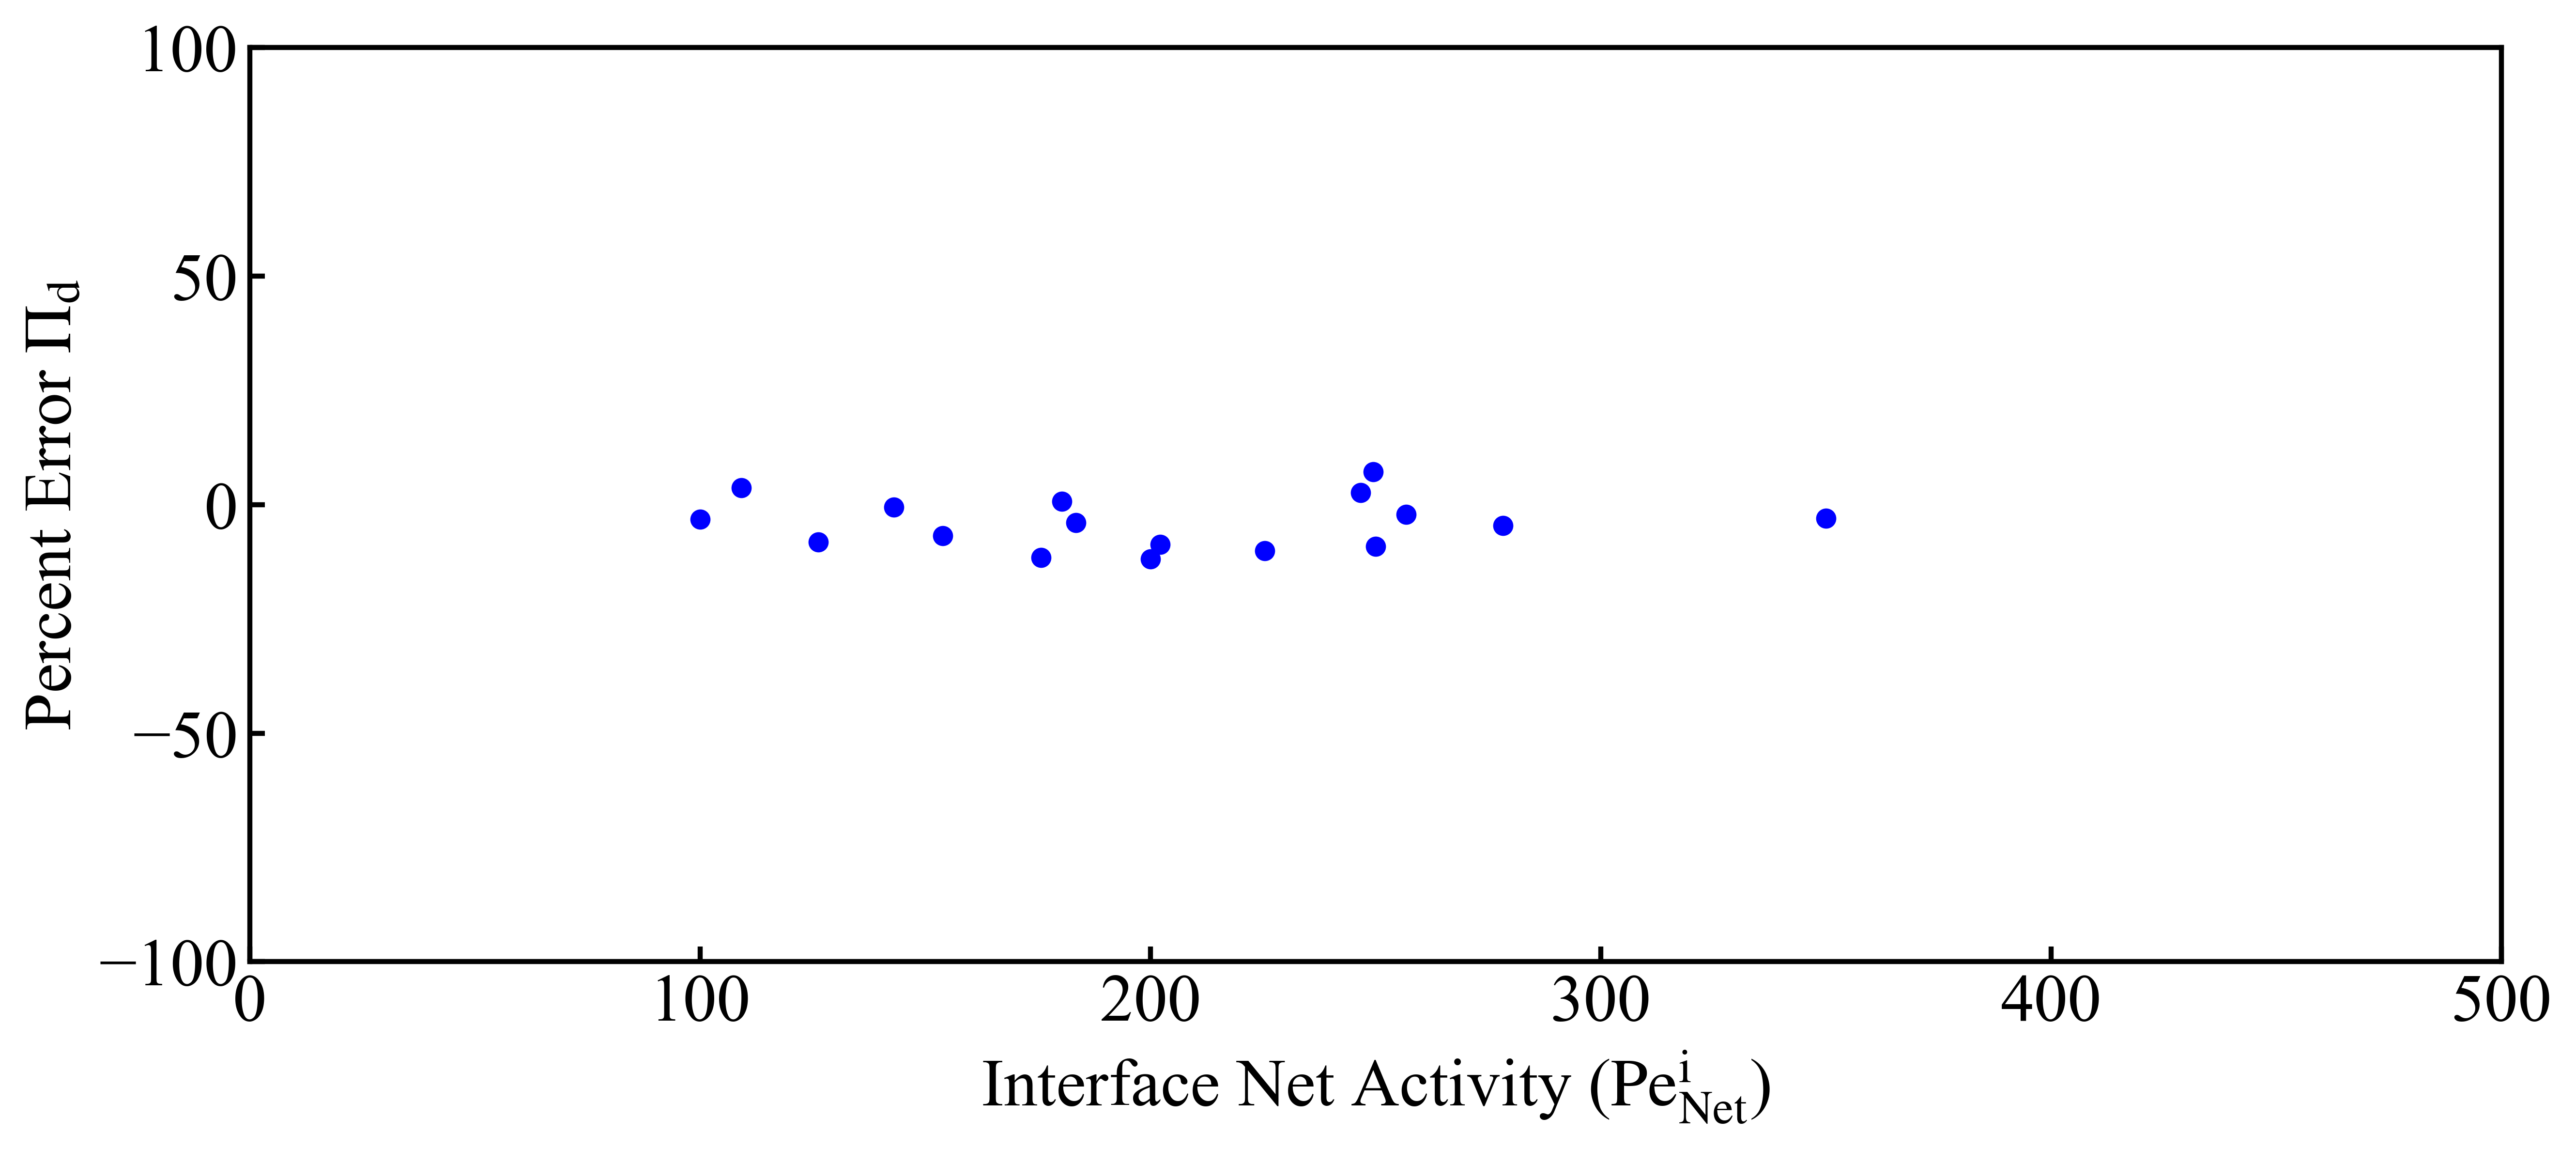

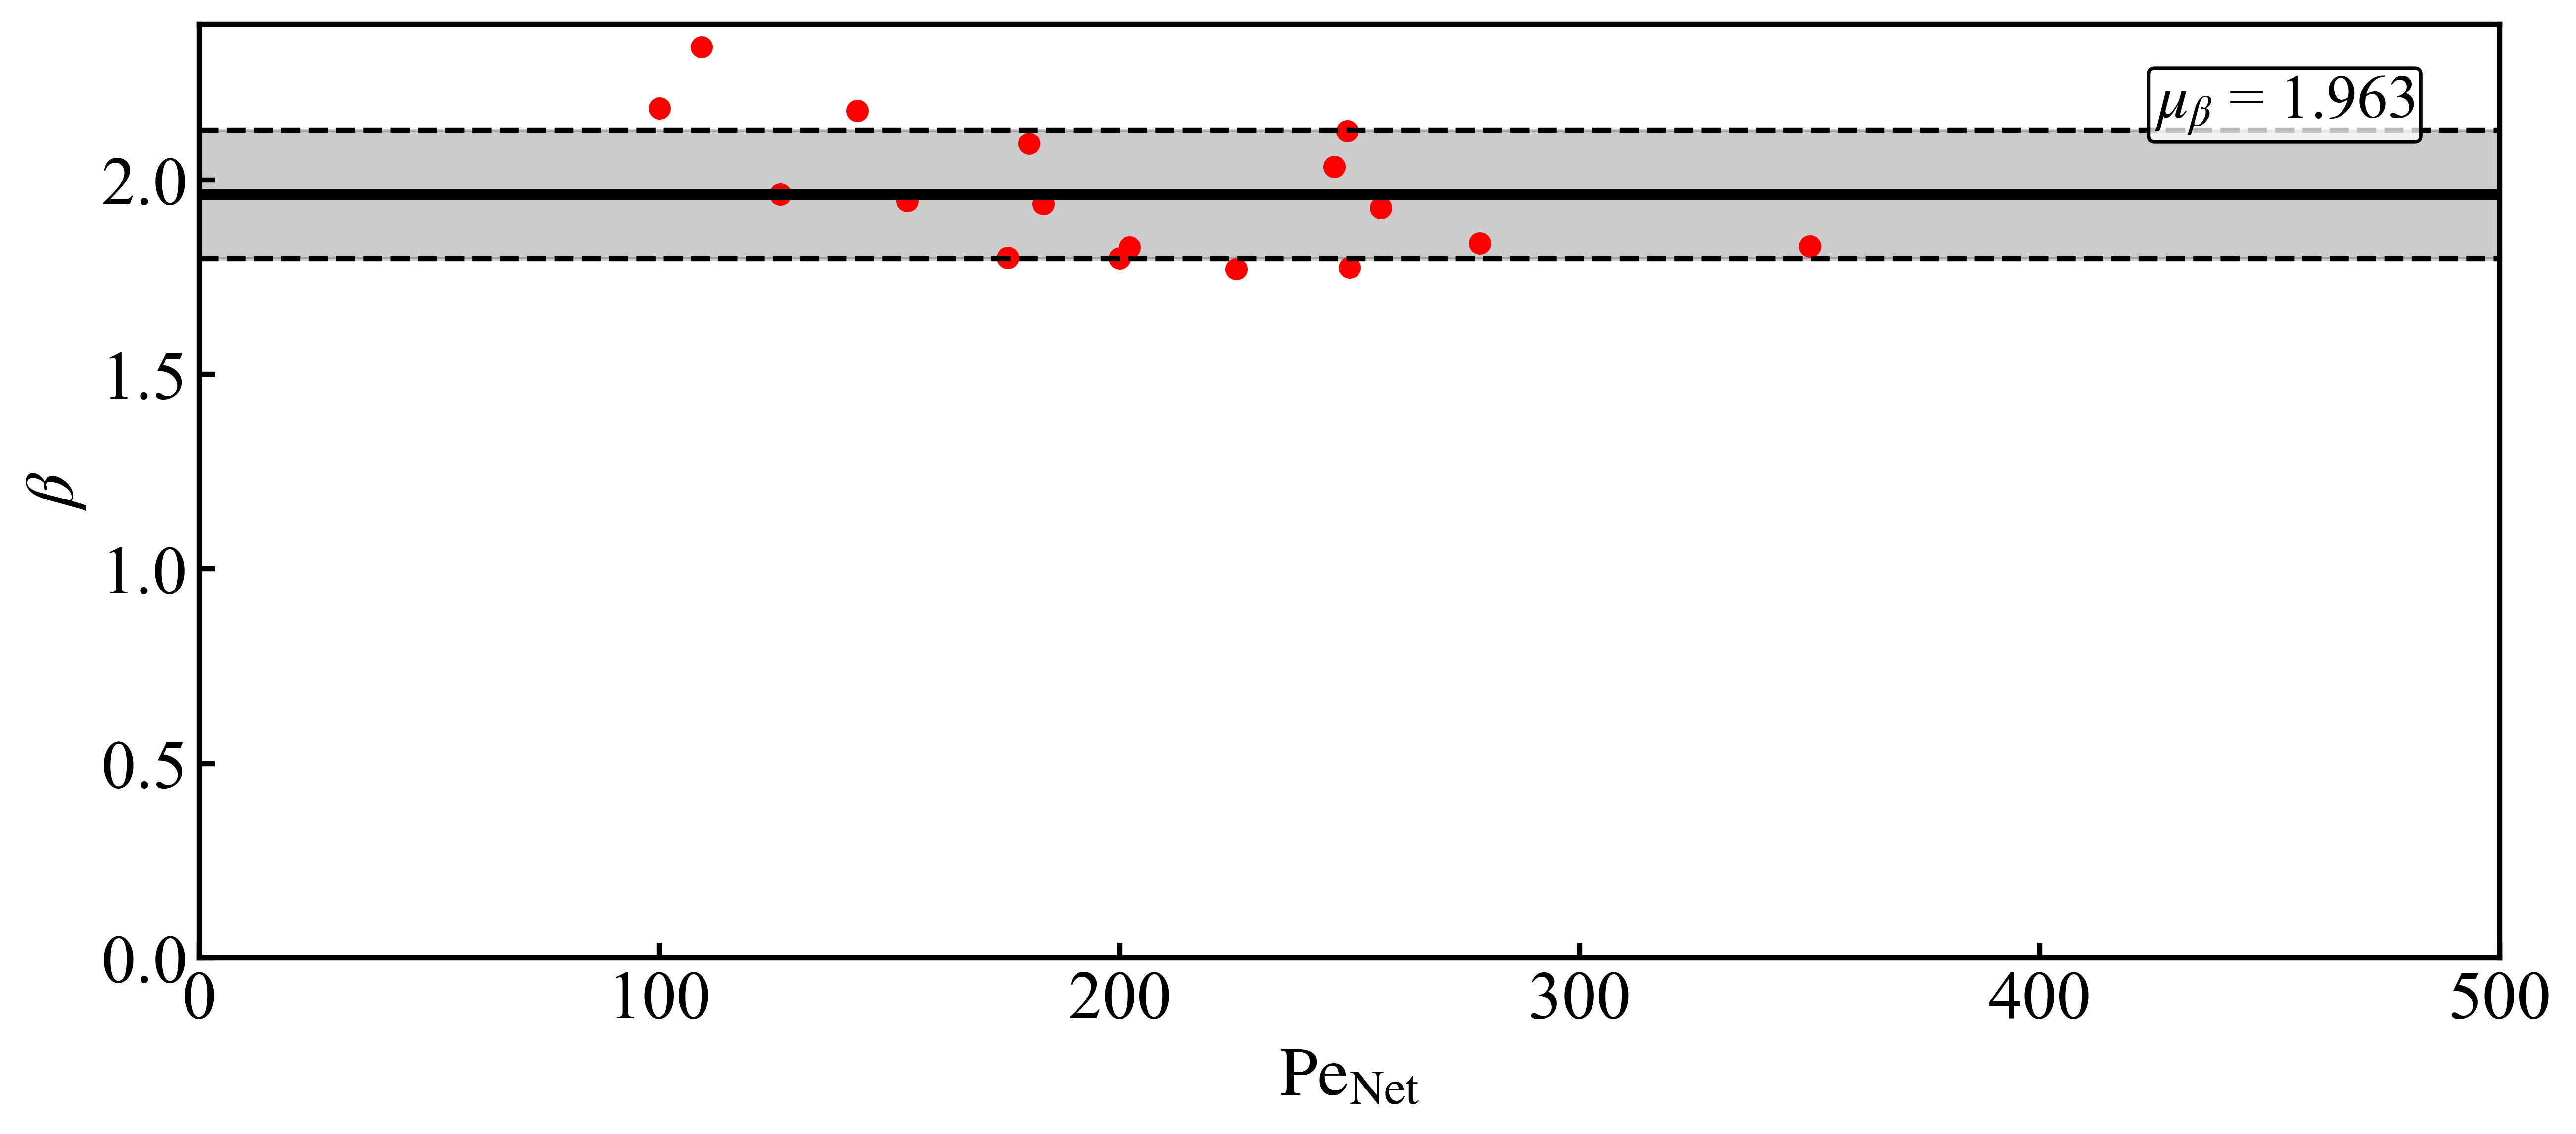

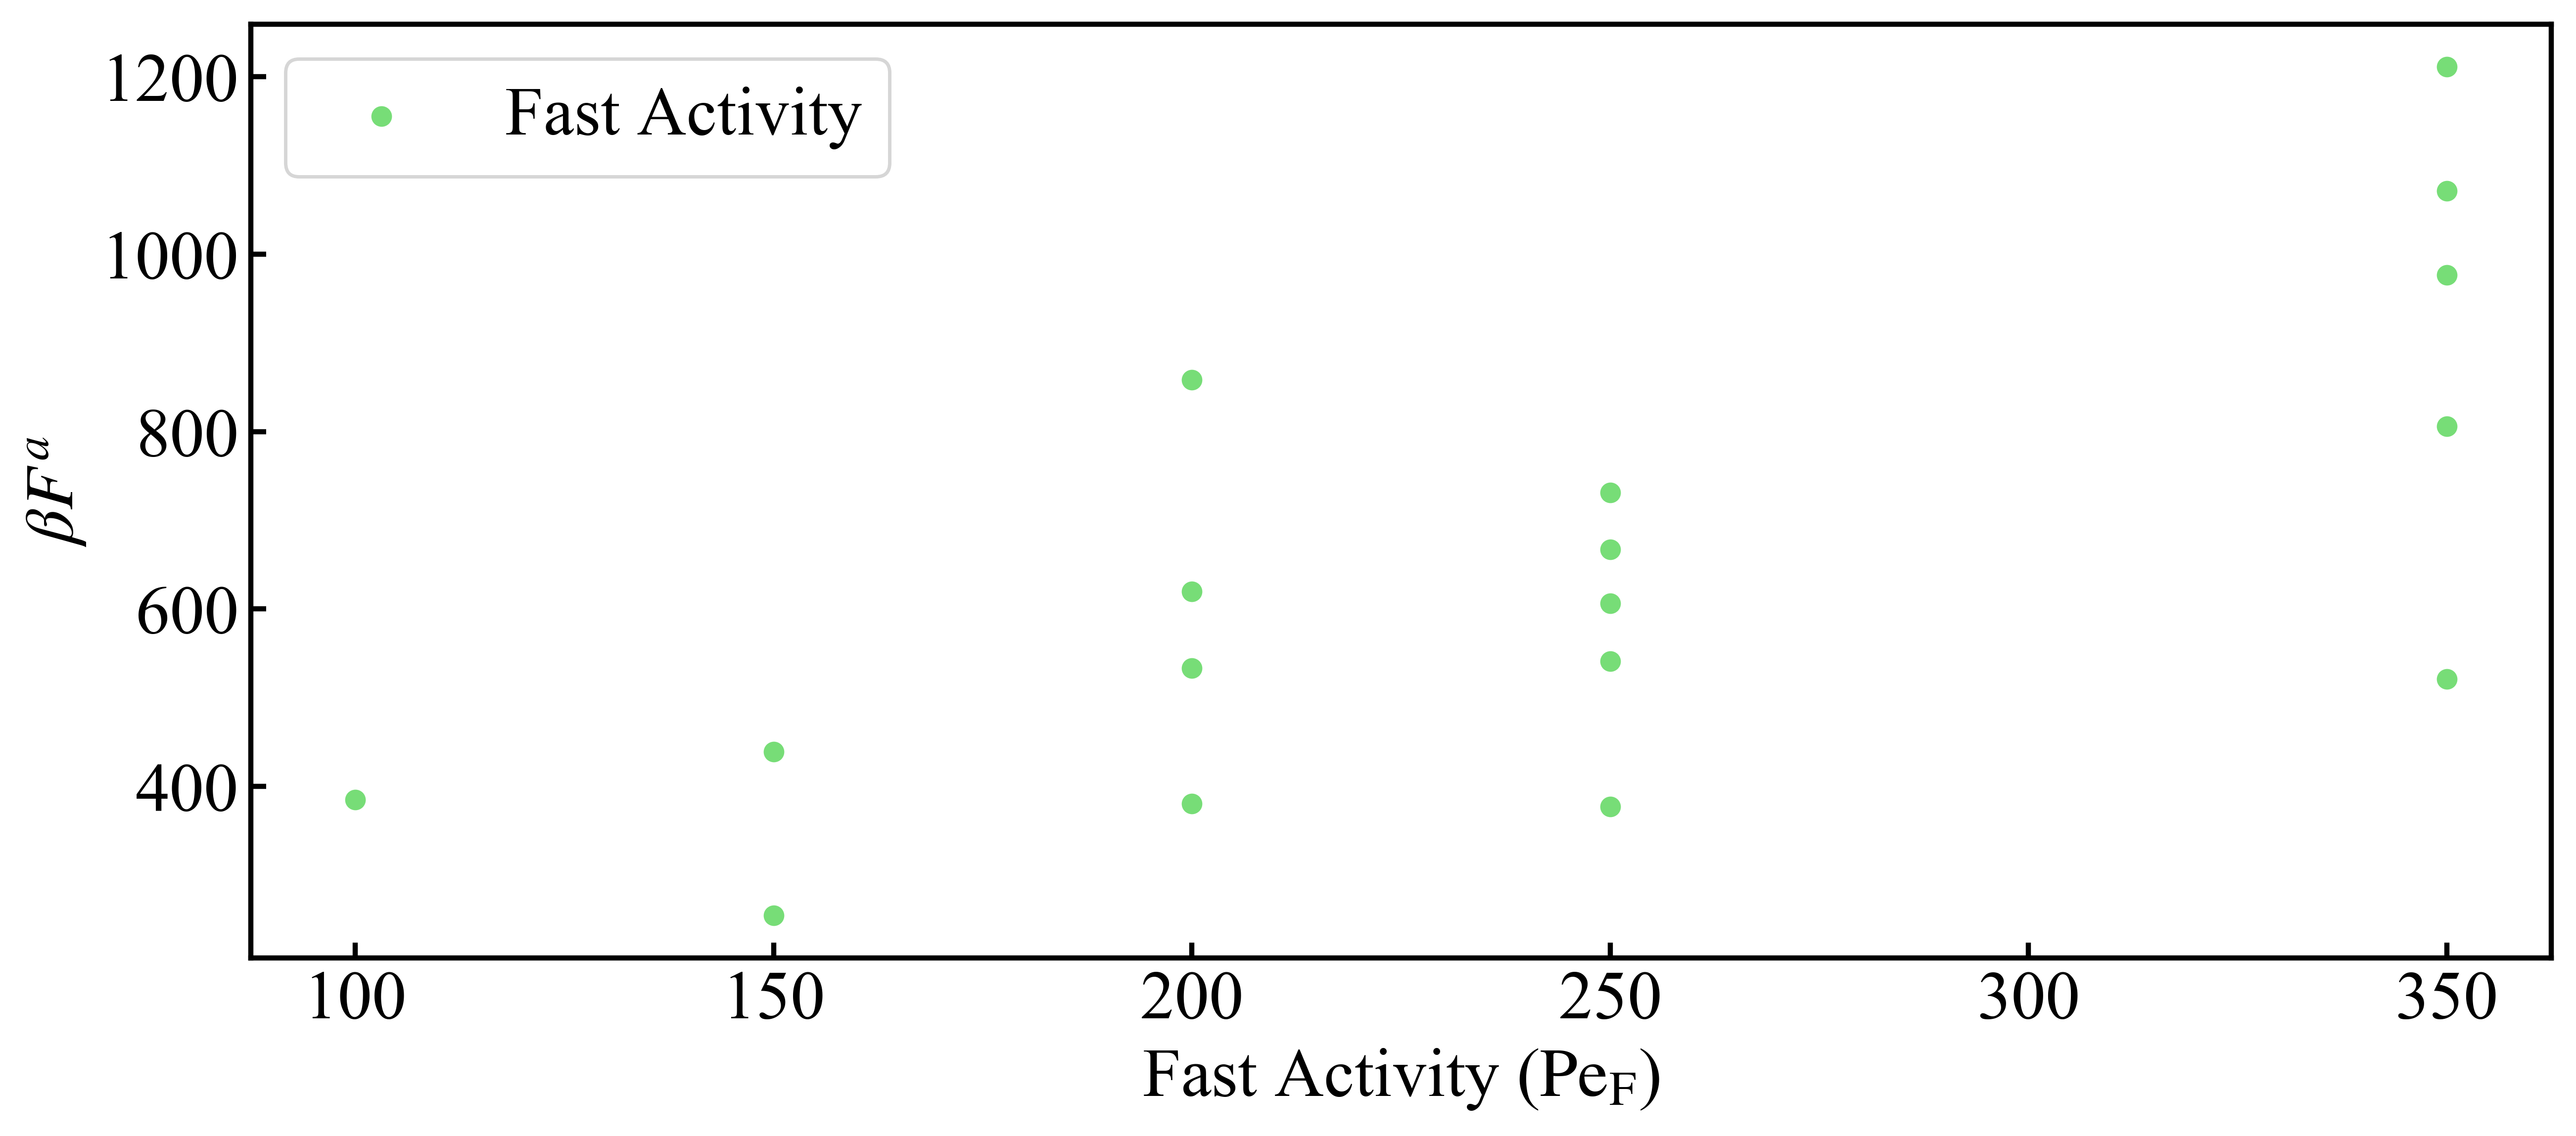

NameError: name 'stop' is not defined

In [85]:
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])


        
        
phase_peA=np.array([])
phase_peB=np.array([])
phase_peRat=np.array([])
phase_peDif=np.array([])
phase_peNet=np.array([])
phase_xA=np.array([])
phase_eps=np.array([])
phase_pnum=np.array([])
phase_phi=np.array([])
avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_arr = np.array([])
beta_peNet = np.array([])
avg_shear=np.array([])
bulk_lat_mean = np.array([])
beta_arr2 = np.array([])
int_lat_mean = np.array([])
all_lat_mean = np.array([])
beta_arr2_std = np.array([])

avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])

avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_final_arr=np.array([])
time_arr3 = np.array([])

def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.764#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
beta_test_arr = np.array([])
for n in range(0, len(all_pres_new)):
    #if params3['peA'][n]!=450:
        time_arr3 = np.array([])
        bulk_nA_arr = np.array([])
        bulk_nB_arr = np.array([])
        bulk_n_arr = np.array([])
        int_n_arr = np.array([])
        int_nA_arr = np.array([])
        int_nB_arr = np.array([])
        gas_nA_arr = np.array([])
        gas_nB_arr = np.array([])
        dense_nA_arr = np.array([])
        dense_nB_arr = np.array([])
        dense_n_arr = np.array([])

        for j in range(0, len(all_pres_new[n]['clust_size'])):
            #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                bin_size = all_pres_new[n]['sizeBin'][j]
                bin_area = bin_size**2
                time_arr3 = np.append(time_arr3, all_pres_new[n]['tauB'][j])
                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new[n]['Na_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new[n]['Nb_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new[n]['Nb_bulk'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                int_n_arr = np.append(int_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]) / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nA_arr = np.append(int_nA_arr, all_pres_new[n]['Na_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nB_arr = np.append(int_nB_arr, all_pres_new[n]['Nb_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                gas_nA_arr = np.append(gas_nA_arr, all_pres_new[n]['Na_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                gas_nB_arr = np.append(gas_nB_arr, all_pres_new[n]['Nb_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                dense_n_arr = np.append(dense_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Na_bulk'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))

        for i in range(0, len(all_pres)):
            if params3['peA'][n]==params2['peA'][i]:
                if params3['peB'][n]==params2['peB'][i]:
                    bulk_press_total = 0
                    bulk_press_total_expand = 0
                    bulk_press_vals=0
                    time_arr = np.array([])
                    press_arr = np.array([])
                    shear_press_expand=0
                    # Don't plot non-phase-separated data
                    if all_pres[i].empty:
                            continue


                    max_size = np.amax(all_pres[i]['NDense'])
                    for j in range(0, len(all_pres[i]['NDense'])):
                        #if all_pres[i]['NDense'][j]>=0.95*max_size:

                            time_arr = np.append(time_arr, all_pres[i]['Timestep'][j])
                            bulk_trace = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                            bulk_press = bulk_trace / (all_pres[i]['bulkArea'].iloc[j])

                            bulk_trace_expand = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2
                            bulk_press_expand = bulk_trace_expand / (all_pres[i]['bulkArea'].iloc[j])

                            shear_stress = (all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j])/2
                            shear_press = shear_stress / (all_pres[i]['bulkArea'].iloc[j])
                            press_arr = np.append(press_arr, bulk_press/2)

                            if bulk_press > 0:
                                shear_press_expand +=shear_press
                                bulk_press_total += bulk_press
                                bulk_press_total_expand += bulk_press_expand
                                bulk_press_vals += 1
                    if bulk_press_vals > 0:        
                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                        
                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                        interpart_peA=np.append(interpart_peA, params2['peA'][i])
                        interpart_peB=np.append(interpart_peB, params2['peB'][i])
                        interpart_peNet=np.append(interpart_peNet, params2['peB'][i] * (1-params2['xA'][i]/100) + params2['peA'][i] * (params2['xA'][i]/100))
                        interpart_xA=np.append(interpart_xA, params2['xA'][i])
                        interpart_phi=np.append(interpart_phi, params2['phi'][i])
                        interpart_eps=np.append(interpart_eps, params2['eps'][i])

                    for k in range(0, len(all_pres_new2)):

                        # Don't plot non-phase-separated data
                        if all_pres_new2[k].empty:
                                continue

                        if params4['peA'][k]==params2['peA'][i]:
                            if params4['peB'][k]==params2['peB'][i]:
                                #if params4['peA'][k]!=450:
                                    time_arr2 = np.array([])
                                    

                                    max_size = np.amax(all_pres_new2[k]['clust_size'])
                                    bulk_lat_arr = np.array([])
                                    int_lat_arr = np.array([])
                                    all_lat_arr = np.array([])

                                    for j in range(0, len(all_pres_new2[k]['clust_size'])):
                                        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                                            bin_size = all_pres_new2[k]['sizeBin'][j]
                                            bin_area = bin_size**2
                                            time_arr2 = np.append(time_arr2, all_pres_new2[k]['tauB'][j])
                                            bulk_lat_arr = np.append(bulk_lat_arr, all_pres_new2[k]['lat_mean_bulk'][j])
                                            all_lat_arr = np.append(all_lat_arr, all_pres_new2[k]['lat_mean_all'][j])
                                            int_lat_arr = np.append(int_lat_arr, all_pres_new2[k]['lat_mean_int'][j])
                                    time_ids = np.intersect1d(time_arr, time_arr2, return_indices=True)
                                    time_ids_press = time_ids[0].astype(int)
                                    time_ids_lat = time_ids[1].astype(int)
                                    
                                    '''
                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                    plt.plot(time_arr2, bulk_lat_arr/np.max(bulk_lat_arr), '-', color='blue', label='Bulk',lw=1.8*1.8)
                                    plt.plot(time_arr2, int_lat_arr/np.max(int_lat_arr), '-', color='red', label='Interface',lw=1.8*1.8)
                                    # Set all the x ticks for radial plots
                                    loc = ticker.MultipleLocator(base=10)
                                    ax1.xaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=5)
                                    ax1.xaxis.set_minor_locator(loc)
                                   # Set y ticks
                                    loc = ticker.MultipleLocator(base=0.1)
                                    ax1.yaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=0.05)
                                    ax1.yaxis.set_minor_locator(loc)


                                    ax1.tick_params(axis='x', labelsize=26)
                                    ax1.tick_params(axis='y', labelsize=26)
                                    ax1.set_xlabel(r'Time ($x=\tau$)', fontsize=32)
                                    ax1.set_ylabel(r'Number Density ($n$)', fontsize=32)
                                    #ax1.set_ylim([-0.05,1.05])
                                    props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                    #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                    #           transform=ax1.transAxes,
                                    #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                    plt.legend(loc='upper right', fontsize=28)
                                    plt.tight_layout()
                                    plt.show()
                                    '''

                                    
                                    time_ids = np.intersect1d(time_ids_press, time_arr3, return_indices=True)
                                    time_ids_pres2 = time_ids[0].astype(int)
                                    time_ids_dens = time_ids[1].astype(int)
                                    #beta_plot = press_arr[time_ids_press][time_ids_pres2]/(2*np.sqrt(3)*(((dense_nA_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peA[-1] + (dense_nB_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peB[-1])-50)/bulk_lat_arr[time_ids_lat][time_ids_pres2])
                                    if np.max(time_ids_lat[time_ids_pres2])>30:
                                        interpart_press=np.append(interpart_press, avg_press)
                                        avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                        avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                        avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
                                        avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))

                                        avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                        avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
                                        avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                        avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
                                        avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                        avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                        avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

        
                                        bulk_lat_mean = np.append(bulk_lat_mean, np.mean(bulk_lat_arr))
                                        all_lat_mean = np.append(all_lat_mean, np.mean(all_lat_arr))
                                        int_lat_mean = np.append(int_lat_mean, np.mean(int_lat_arr))
                                    
                                        phase_peA=np.append(phase_peA, params4['peA'][k])
                                        phase_peB=np.append(phase_peB, params4['peB'][k])
                                        phase_peDif=np.append(phase_peDif, params4['peB'][k]-params4['peA'][k])
                                        phase_peRat=np.append(phase_peRat, params4['peA'][k]/params4['peB'][k])

                                        phase_peNet=np.append(phase_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))
                                        phase_xA=np.append(phase_xA, params4['xA'][k])
                                        phase_phi=np.append(phase_phi, params4['phi'][k])
                                        phase_eps=np.append(phase_eps, params4['eps'][k])

                                        beta_plot = press_arr[time_ids_press][time_ids_pres2]/(2*np.sqrt(3)/bulk_lat_arr[time_ids_lat][time_ids_pres2])

                                        beta_test_arr = np.append(beta_test_arr, beta_plot[-1]) 
                                        #plt.plot(time_arr, press_arr/np.max(press_arr), '-', color='green', label='Press',lw=1.8*1.8)
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        plt.plot(time_ids_lat[time_ids_pres2], beta_plot, '-', color='green', label='Press',lw=1.8*1.8)

                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=5)
                                        ax1.xaxis.set_minor_locator(loc)
                                        # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.5)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.25)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($x=\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'Number Density ($n$)', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=28)
                                        plt.tight_layout()
                                        plt.show()
                                        '''

                                        beta2 = ((24/phase_peB[-1]) * (2*(1.0/bulk_lat_arr)**13 - (1.0/bulk_lat_arr)**7))
                                        print(np.mean(beta2))
                                        ymin = np.mean(beta2)-1
                                        ymax=np.mean(beta2)+1
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        lat_theory = np.zeros(len(time_arr3))
                                        for p in range(0, len(time_arr3)):
                                            lat_theory[p] = conForRClust((((dense_nA_arr[p]/dense_n_arr[p]) * phase_peA[-1] + (dense_nB_arr[p]/dense_n_arr[p]) * phase_peB[-1])), 1.0)
                                            #lat_theory[p] = getLat(phase_peB[-1], 1.0)
                                        #y_arr_now = np.ones(2) * lat_theory
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        plt.plot(time_arr2, bulk_lat_arr, '-', linewidth=1.8*1.8, color='blue', label='Simulation')
                                        plt.plot(time_arr3, lat_theory, '--', linewidth=1.8*1.8, color='black', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'lattice spacing ($a$)', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='lower right', fontsize=22)
                                        ax1.set_ylim([0,1.0])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        '''
                                        xy, x_ind, y_ind = np.intersect1d(time_arr2, time_arr3, return_indices=True)
                                        #x_test = (((dense_nA_arr[y_ind]/dense_n_arr[y_ind]) * phase_peA[-1] + (dense_nB_arr[y_ind]/dense_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        x_test = (((int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1])-50)/all_lat_arr[x_ind]
                                        from scipy.optimize import curve_fit
                                        def func(x, m):
                                            return   x * 2.0 * m *np.sqrt(3)

                                        xy2, x_ind2, y_ind2 = np.intersect1d(time_arr2[x_ind], time_arr, return_indices=True)

                                        popt, pcov = curve_fit(func, x_test, press_arr[y_ind2])
                                        beta_final_arr = np.append(beta_final_arr, popt[0])
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        plt.plot(time_arr, press_arr, '-', color='green', label='Simulation',lw=1.8*1.8)
                                        #plt.plot(time_arr2, beta2/np.mean(beta2), '-', color='purple', label=r'$\Pi_\mathrm{d}$',lw=1.8*1.8)
                                        plt.plot(time_arr2[x_ind], func(x_test, *popt), '-', linewidth=1.8*1.8, color='blue', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'$\Pi_\mathrm{d}$', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=22)
                                        #ax1.set_ylim([0,1.4])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        #plt.plot(time_arr2, beta2/np.mean(beta2), '-', color='purple', label=r'$\Pi_\mathrm{d}$',lw=1.8*1.8)
                                        plt.plot(time_arr2[x_ind], (((int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1])-50), '-', linewidth=1.8*1.8, color='blue', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'$\mathrm{Pe}_\mathrm{int}$', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=22)
                                        ax1.set_ylim([0,500])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        '''

                                        beta_arr = np.append(beta_arr, interpart_press[-1]/(2*np.sqrt(3)*interpart_peNet[-1]/bulk_lat_mean[-1]))
                                        beta_arr2 = np.append(beta_arr2, np.mean(beta2))
                                        std_sum = 0
                                        std_num =0
                                        for o in range(0, len(bulk_lat_arr)):
                                            std_sum +=(bulk_lat_arr[o]-bulk_lat_mean[-1])**2
                                            std_num +=1

                                        beta_arr2_std = np.append(beta_arr2_std, (std_sum/std_num)**0.5)
                                        beta_peNet=np.append(beta_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))


lat_theory_mean_int = np.zeros(len(phase_peNet))
lat_theory_mean_bulk = np.zeros(len(phase_peNet))

lat_theory_mean_dense = np.zeros(len(phase_peNet))

dense_pe_net = np.zeros(len(phase_peNet))
bulk_pe_net = np.zeros(len(phase_peNet))
int_pe_net = np.zeros(len(phase_peNet))

beta_theory = np.zeros(len(phase_peNet))
beta_theory2 = np.zeros(len(phase_peNet))

beta_theory3 = np.zeros(len(phase_peNet))
beta_theory4 = np.zeros(len(phase_peNet))
press_theory = np.zeros(len(phase_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
for p in range(0, len(phase_peNet)):
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * phase_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * phase_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * phase_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * phase_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * phase_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * phase_peB[p]))

    beta_theory[p] = dU[p]/phase_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/phase_peNet[p]
    lat_theory_mean_int[p] = conForRClust((((avg_int_nA[p]/avg_int_n[p]) * phase_peA[-1] + (avg_int_nB[p]/avg_int_n[p]) * phase_peB[-1]))-50, 1.0)
    lat_theory_mean_bulk[p] = conForRClust((((avg_bulk_nA[p]/avg_bulk_n[p]) * phase_peA[-1] + (avg_bulk_nB[p]/avg_bulk_n[p]) * phase_peB[-1])), 1.0)

    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int[p]

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(int_pe_net, press_theory, color='blue', s=25.0, label='Theory')
plt.scatter(int_pe_net, interpart_press, color='red', s=25.0, label='Simulation')
ax1.set_xlim([0.0,500.0])
plt.ylabel(r'$\Pi_\mathrm{d}$')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper left')

plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(int_pe_net, ((interpart_press-press_theory)/press_theory)*100, color='blue', s=25.0)
ax1.set_xlim([0.0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Percent Error $\Pi_\mathrm{d}$')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.show()

#Define colors for plots    
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
std = 0
for k in range(0, len(beta_final_arr)):
    std += (beta_final_arr[k]-np.mean(beta_final_arr))**2
std_beta = (std/len(beta_final_arr))**0.5
fig, ax1 = plt.subplots(figsize=(12,5))
y_arr = np.ones(2) * np.mean(beta_final_arr)
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
ax1.plot(x_arr, y_arr, linewidth = 1.8*1.8, color='black')
ax1.plot(x_arr, y_arr_min, linewidth = 1.5, color='black', linestyle='--')
ax1.plot(x_arr, y_arr_max, linewidth = 1.5, color='black', linestyle='--')

ax1.fill_between(x_arr, y_arr_min, y_arr_max, color='black', alpha=0.2)
ax1.scatter(int_pe_net, beta_final_arr, color='red', s=30.0)

plt.text(0.85, 0.9, s=r'$\mu_\beta$' + ' = ' + '{:.3f}'.format(np.mean(beta_final_arr)),
                fontsize=18, transform = ax1.transAxes,
                bbox=dict(facecolor=(1,1,1,0.75), edgecolor=(0,0,0,1), boxstyle='round, pad=0.1'))
ax1.set_xlim([0, 500])
ax1.set_ylim([0.0,2.4])
ax1.set_ylabel(r'$\beta$')
ax1.set_xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')

plt.show()



fig, ax1 = plt.subplots(figsize=(12,5))
#plt.scatter(phase_peNet, beta_test_arr, color=purple, s=25.0, label='total')
#plt.scatter((((avg_dense_nA/avg_dense_n) * phase_peA + (avg_dense_nB/avg_dense_n) * phase_peB)), beta_test_arr, color=red, s=25.0, label='dense')
#plt.scatter((((avg_int_nA/avg_int_n) * phase_peA + (avg_int_nB/avg_int_n) * phase_peB)), beta_test_arr, color=yellow, s=25.0, label='int')
#plt.scatter(phase_peA, beta_test_arr, color=red, s=25.0, label='Slow')
plt.scatter(phase_peB, beta_test_arr, color=green, s=25.0, label='Fast Activity')
plt.ylabel(r'$\beta F^a$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
#plt.scatter((((avg_bulk_nA/avg_bulk_n) * phase_peA + (avg_bulk_nB/avg_bulk_n) * phase_peB)), beta_test_arr, color=green, s=25.0, label='bulk')
plt.legend(loc='upper left')
#ax1.set_ylim([0.0,1.0])
plt.show()
stop
    
    
    
fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(dense_pe_net, bulk_lat_mean, color='blue', s=25.0)
#plt.scatter(phase_peNet, lat_theory_mean, color='red', s=25.0)
ax1.set_ylim([0.0,1.0])
plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(phase_peA, beta_theory, color='blue', s=25.0)
plt.ylabel(r'$\beta$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
plt.ylim([0,4.0])

plt.show()
'''
fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory2, color='green', s=25.0)
plt.ylim([0,4.0])

plt.show()
fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory3, color='red', s=25.0)
plt.ylim([0,4.0])
plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory4, color='red', s=25.0)
plt.ylim([0,4.0])

plt.show()
#plt.scatter(phase_peNet, lat_theory_mean, color='red', s=25.0)
#ax1.set_ylim([0.0,1.0])
'''

1.9572923144379406
50
200


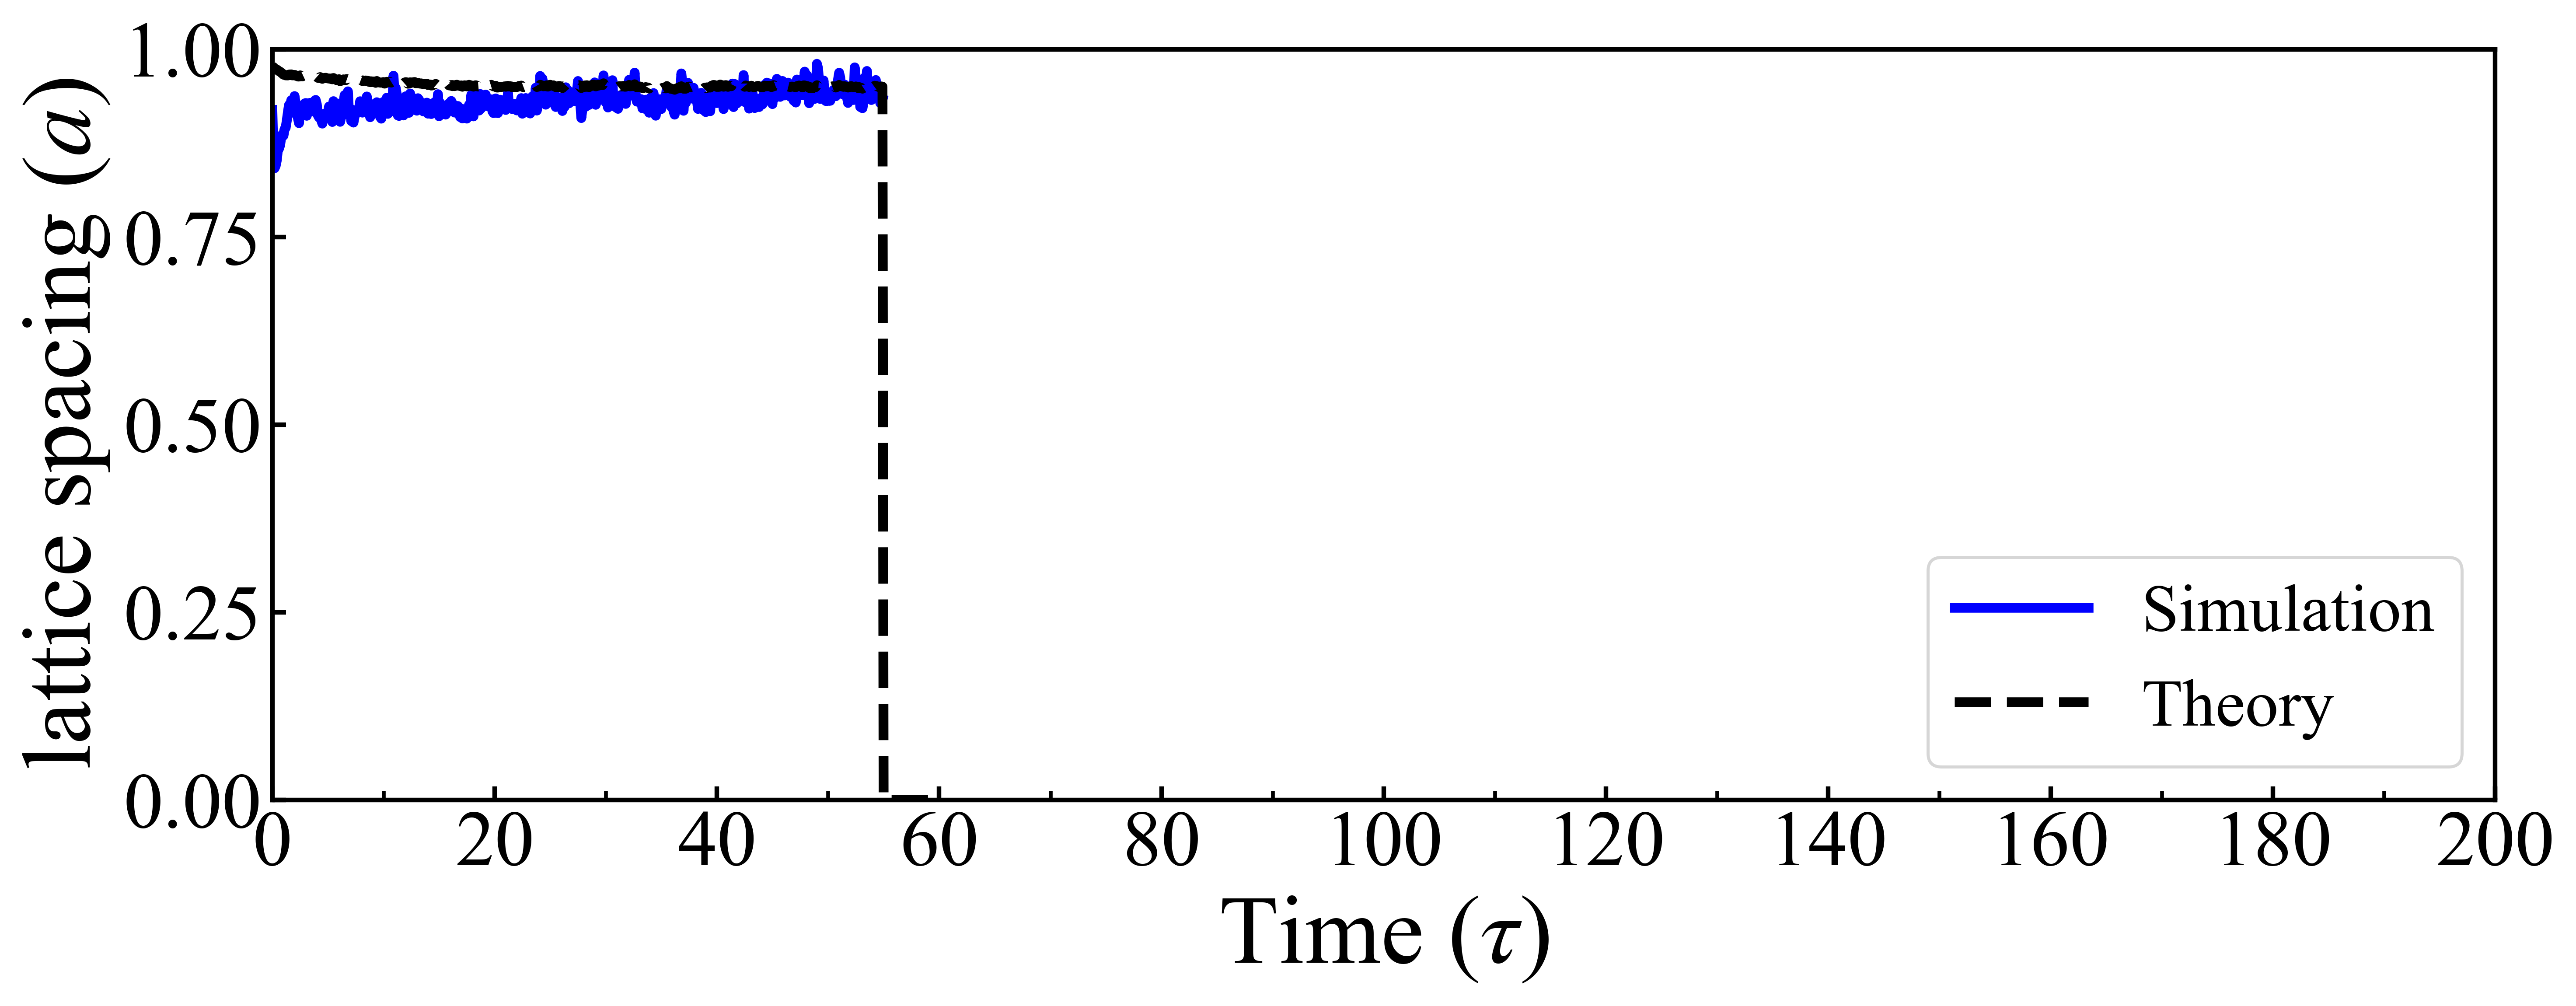

2.170672352850999
50
250


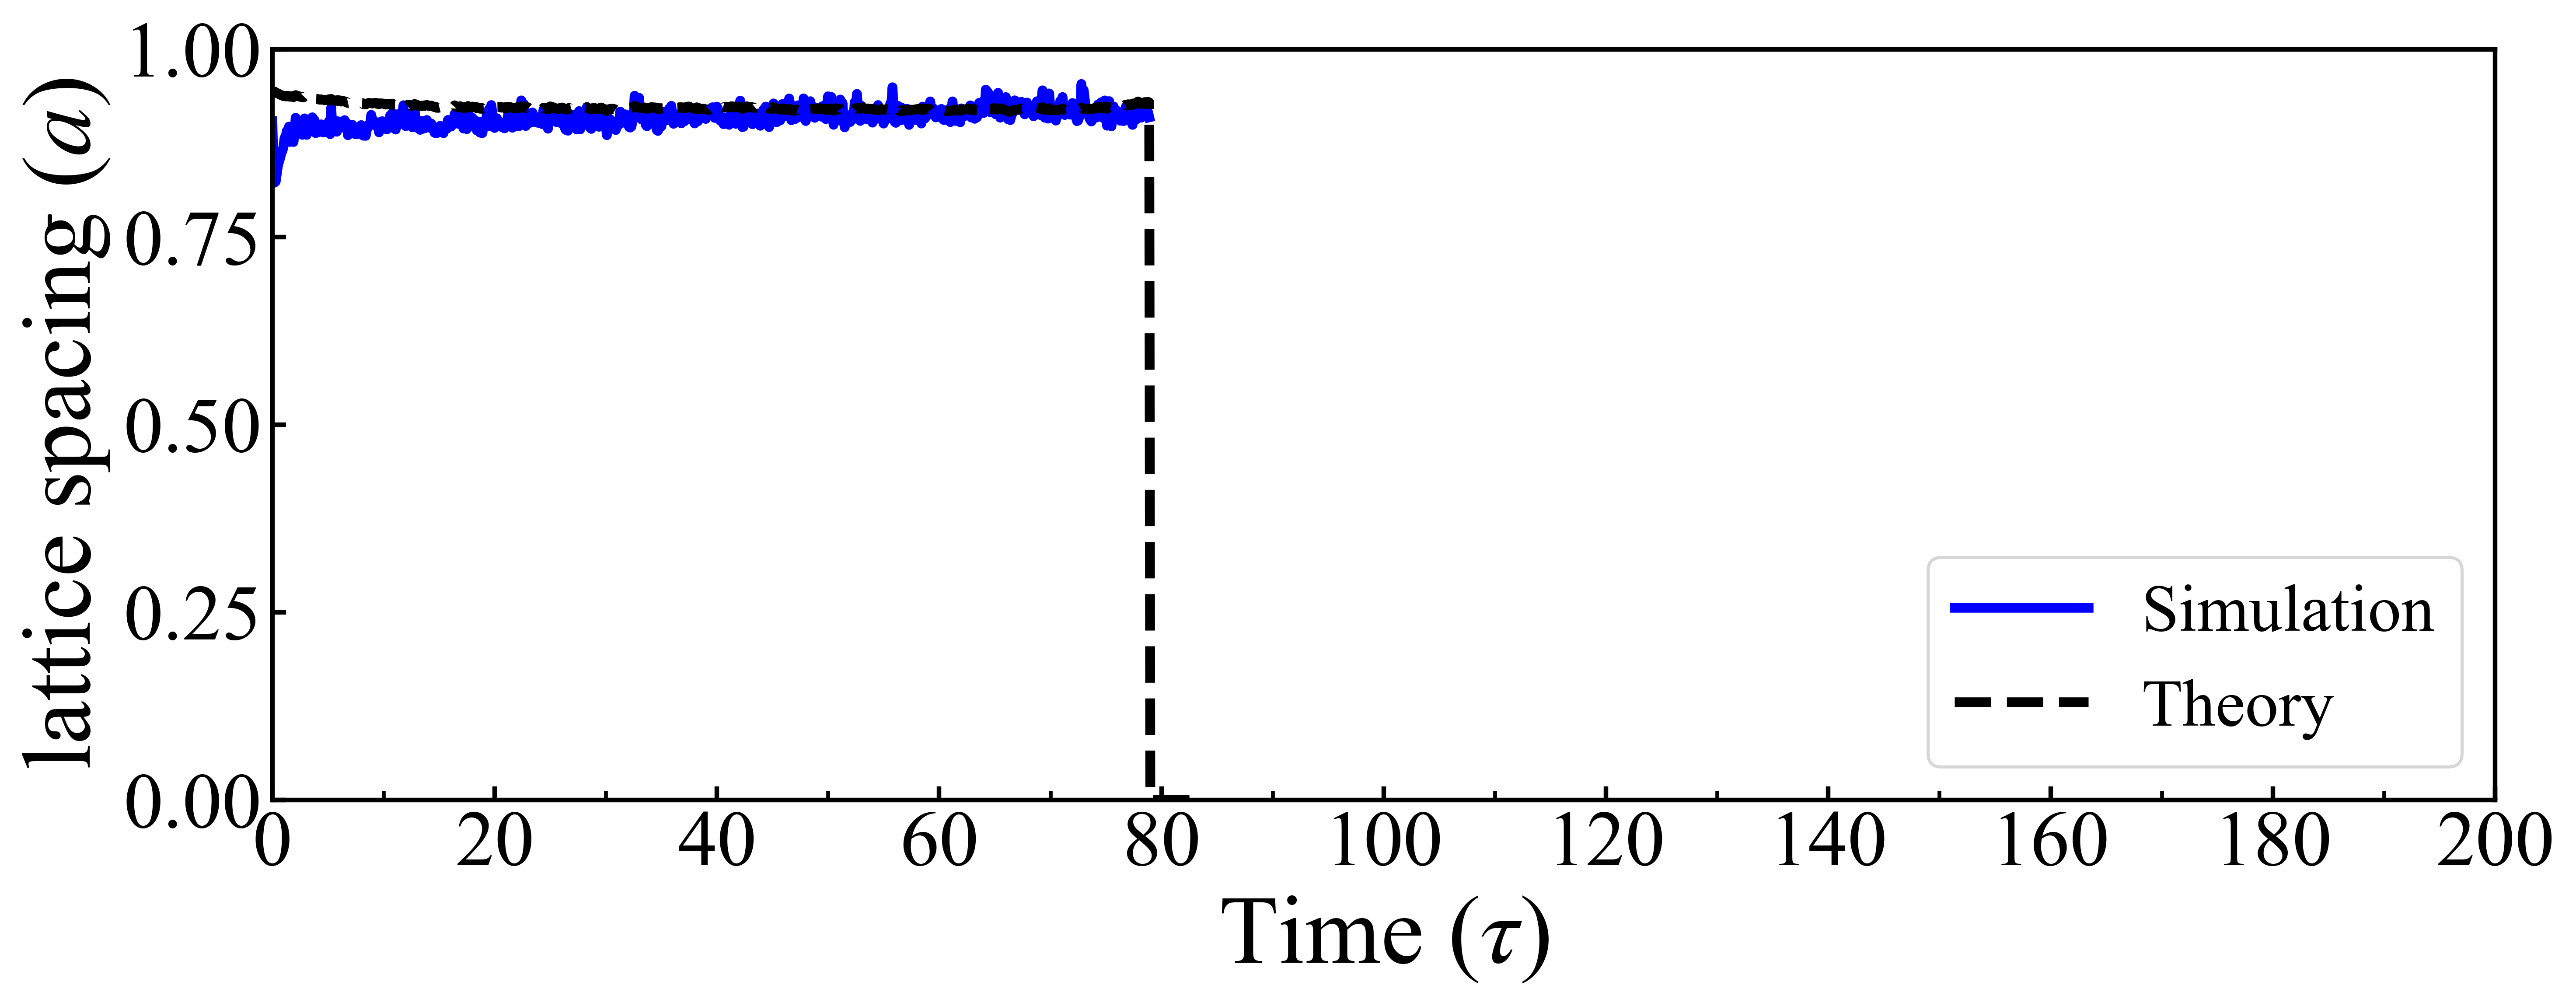

/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide


1.6886254889024315
50
150


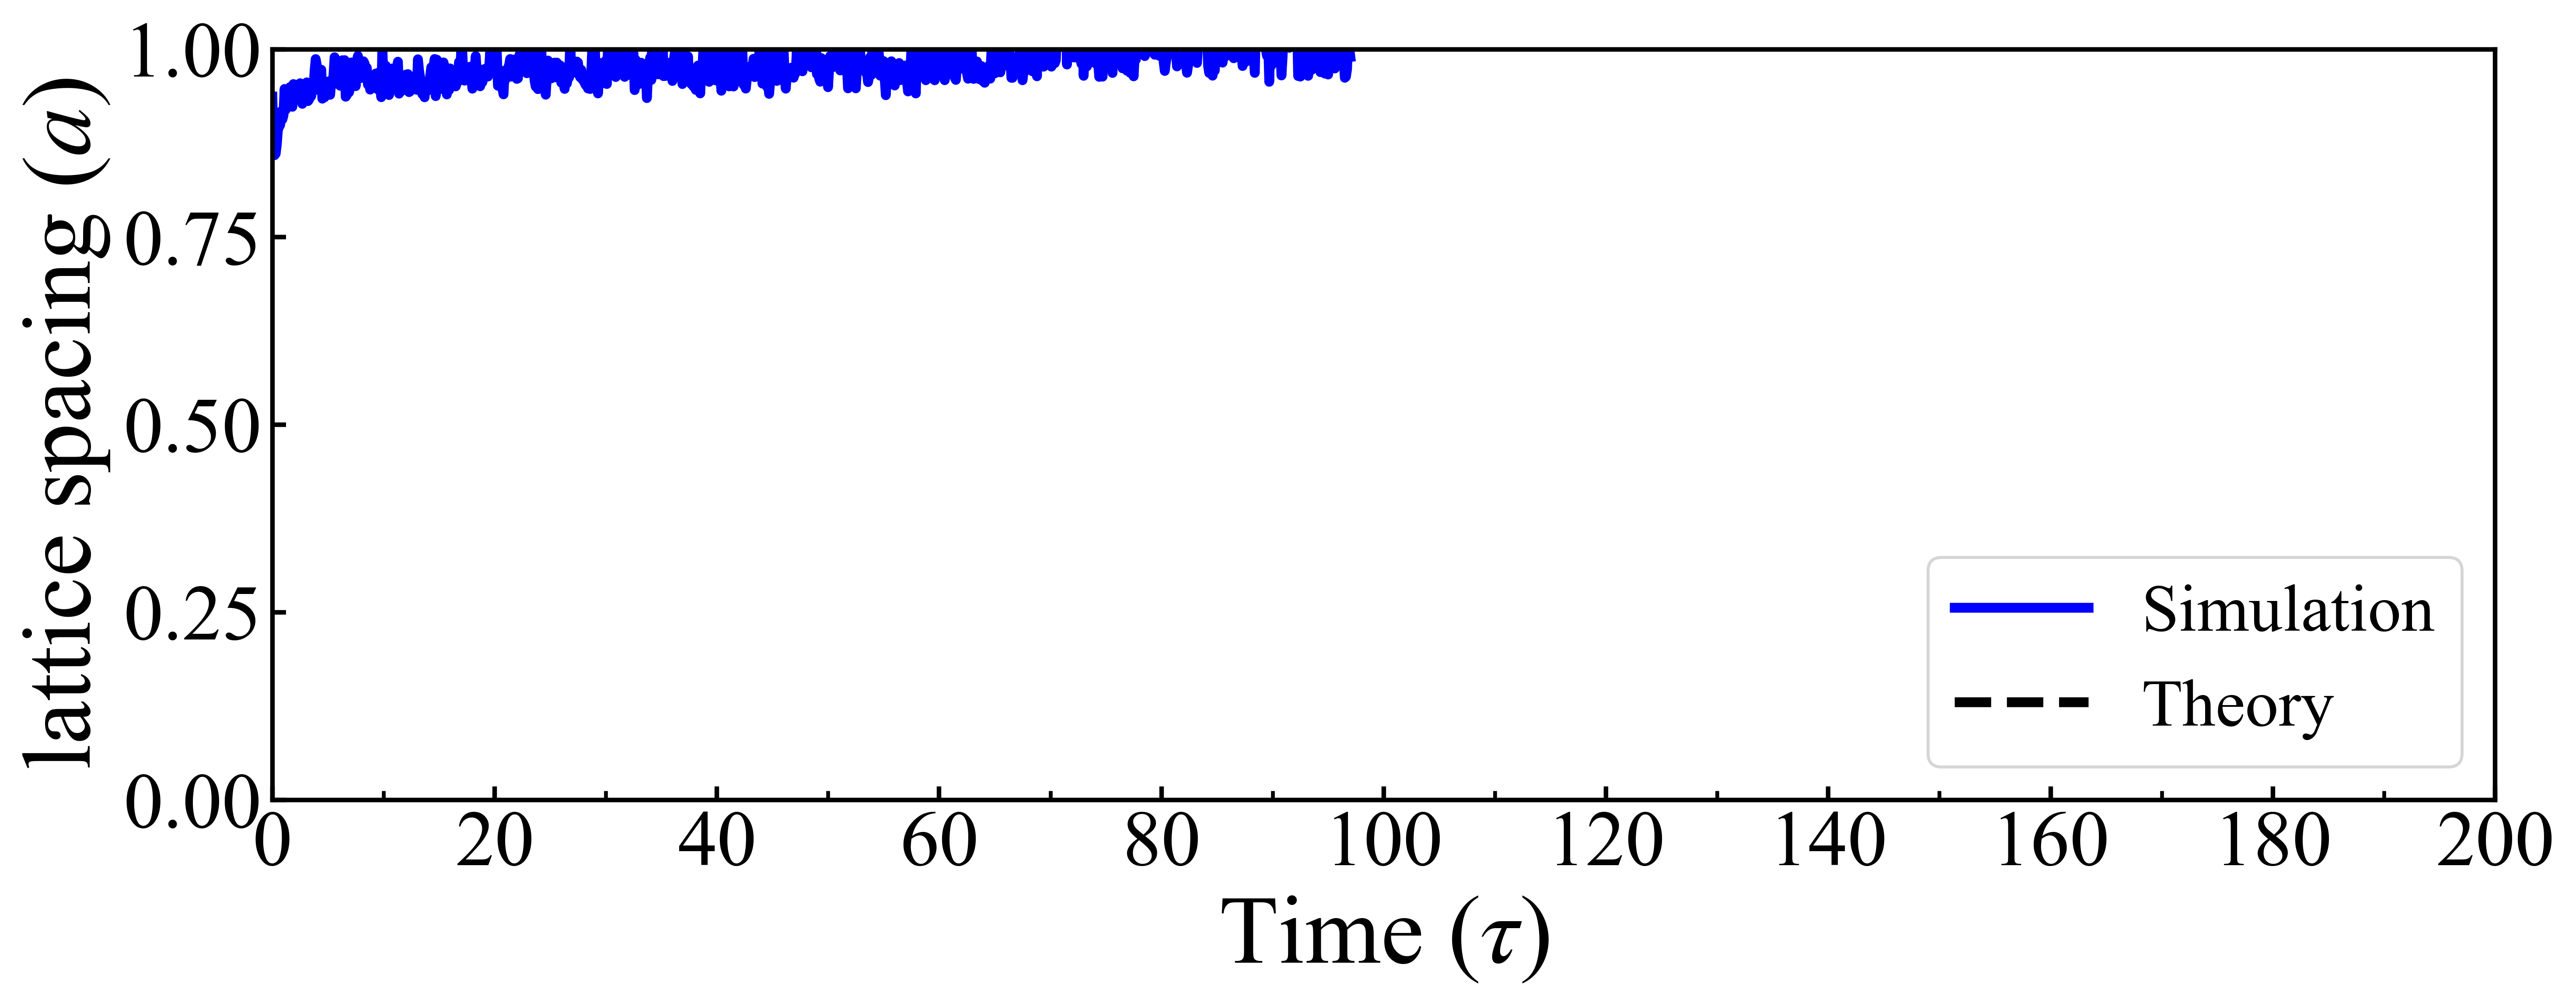

2.481132978812659
50
350


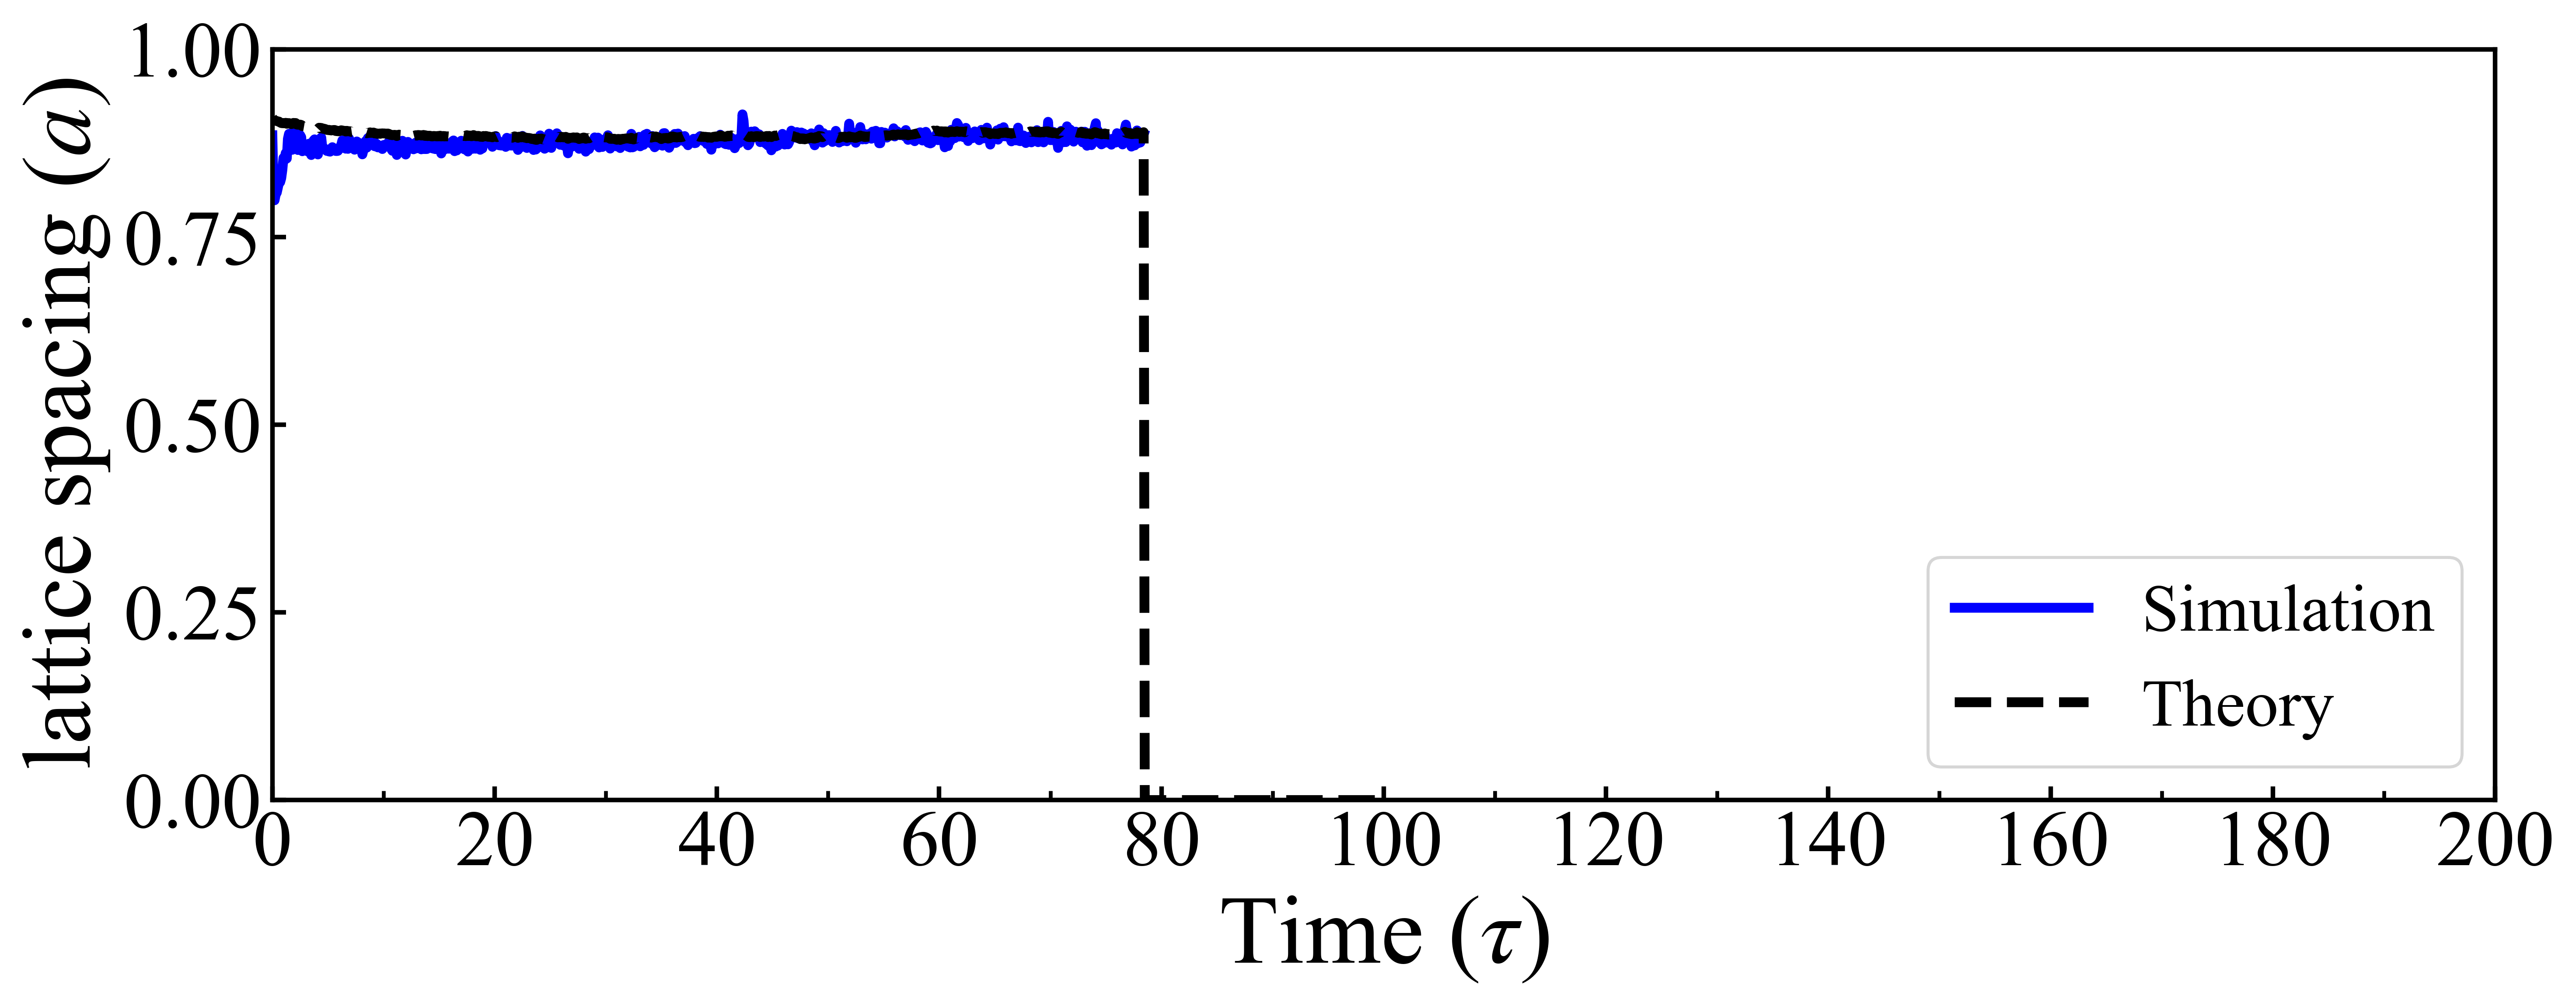

1.7671953053229785
100
100


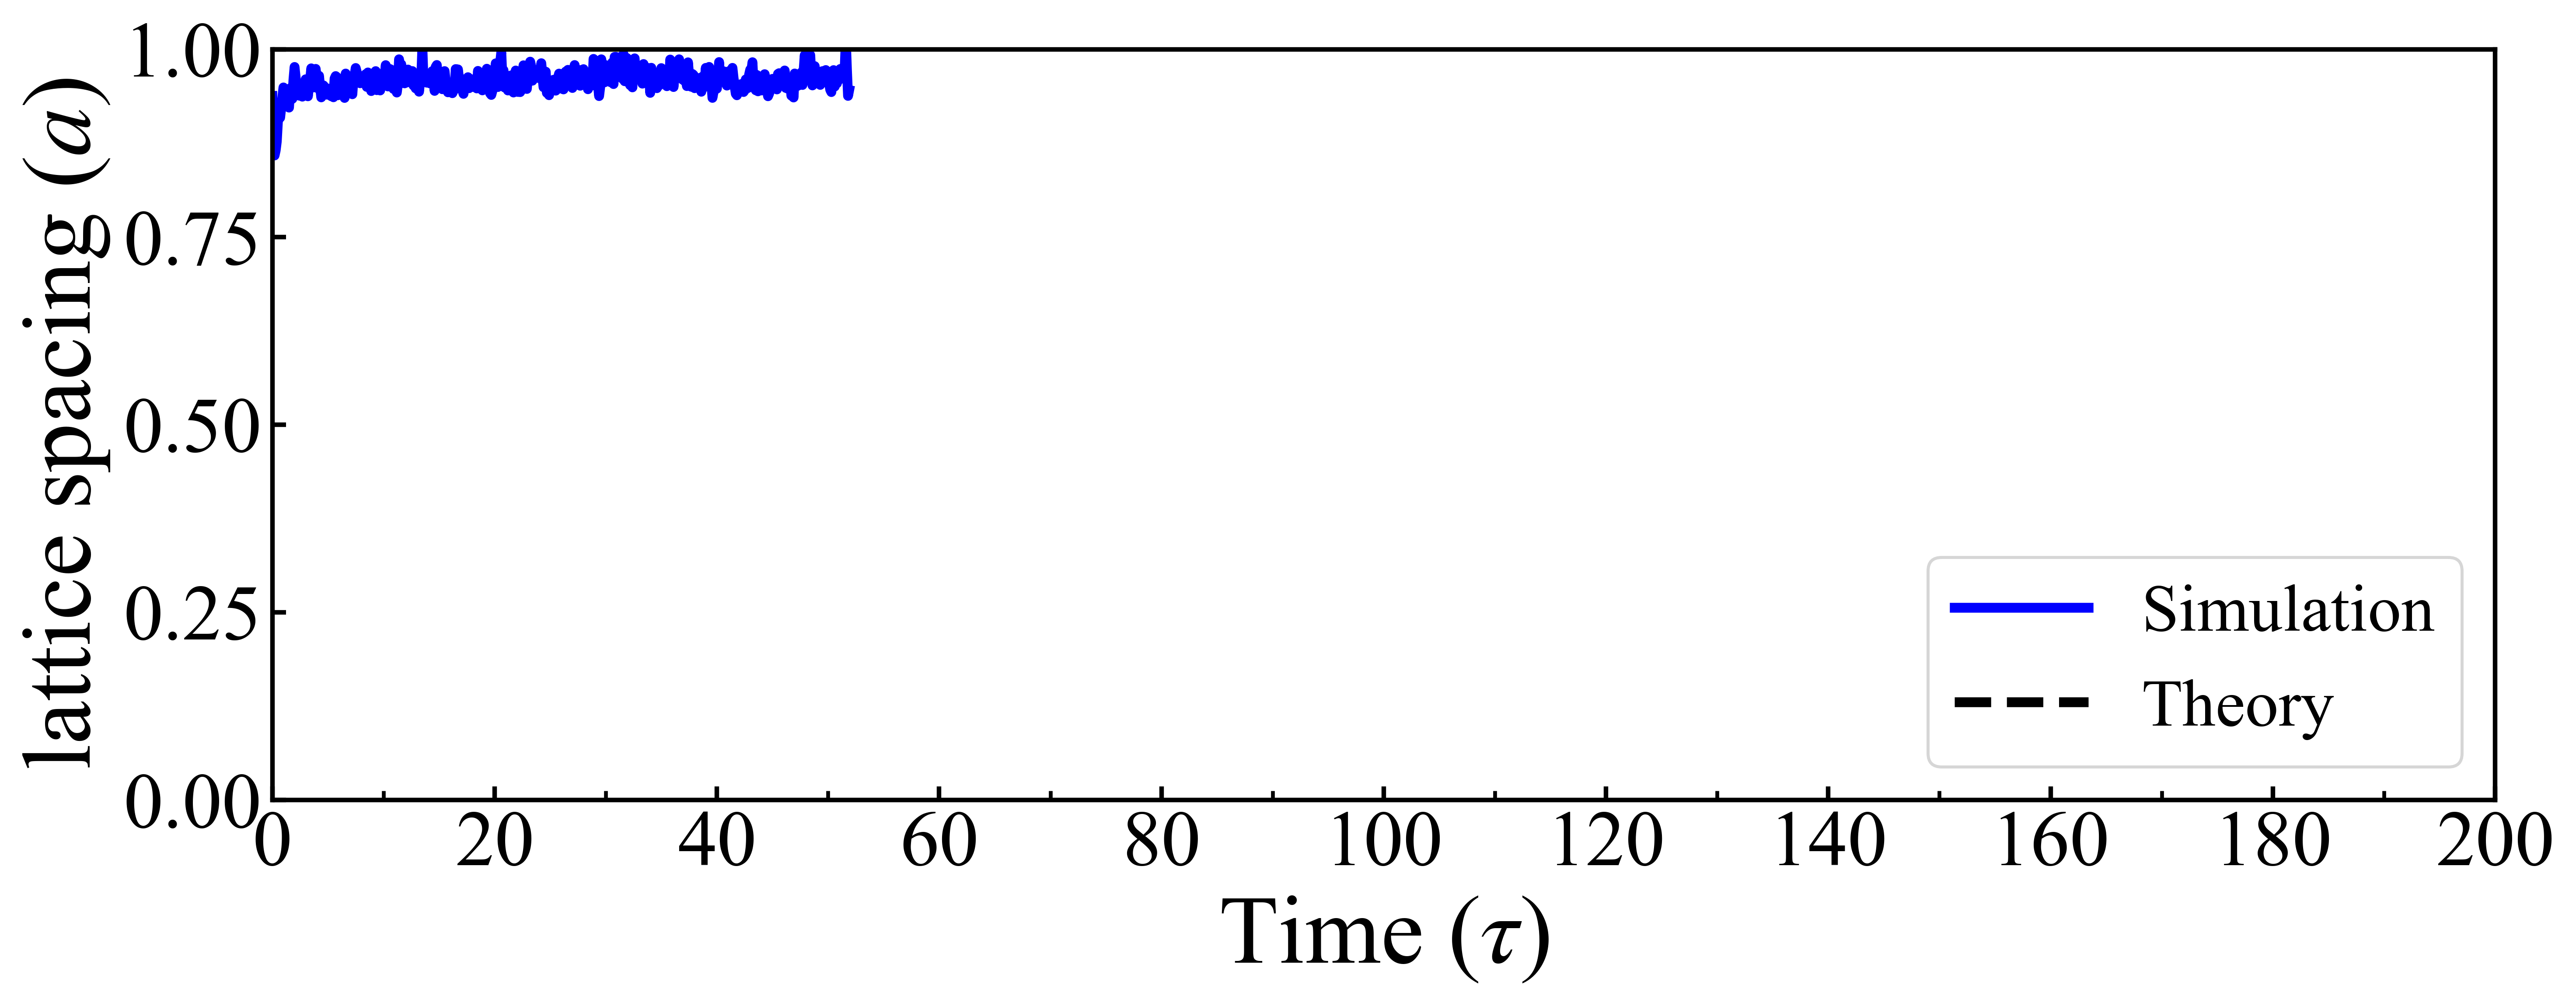

1.7225096007209282
100
150


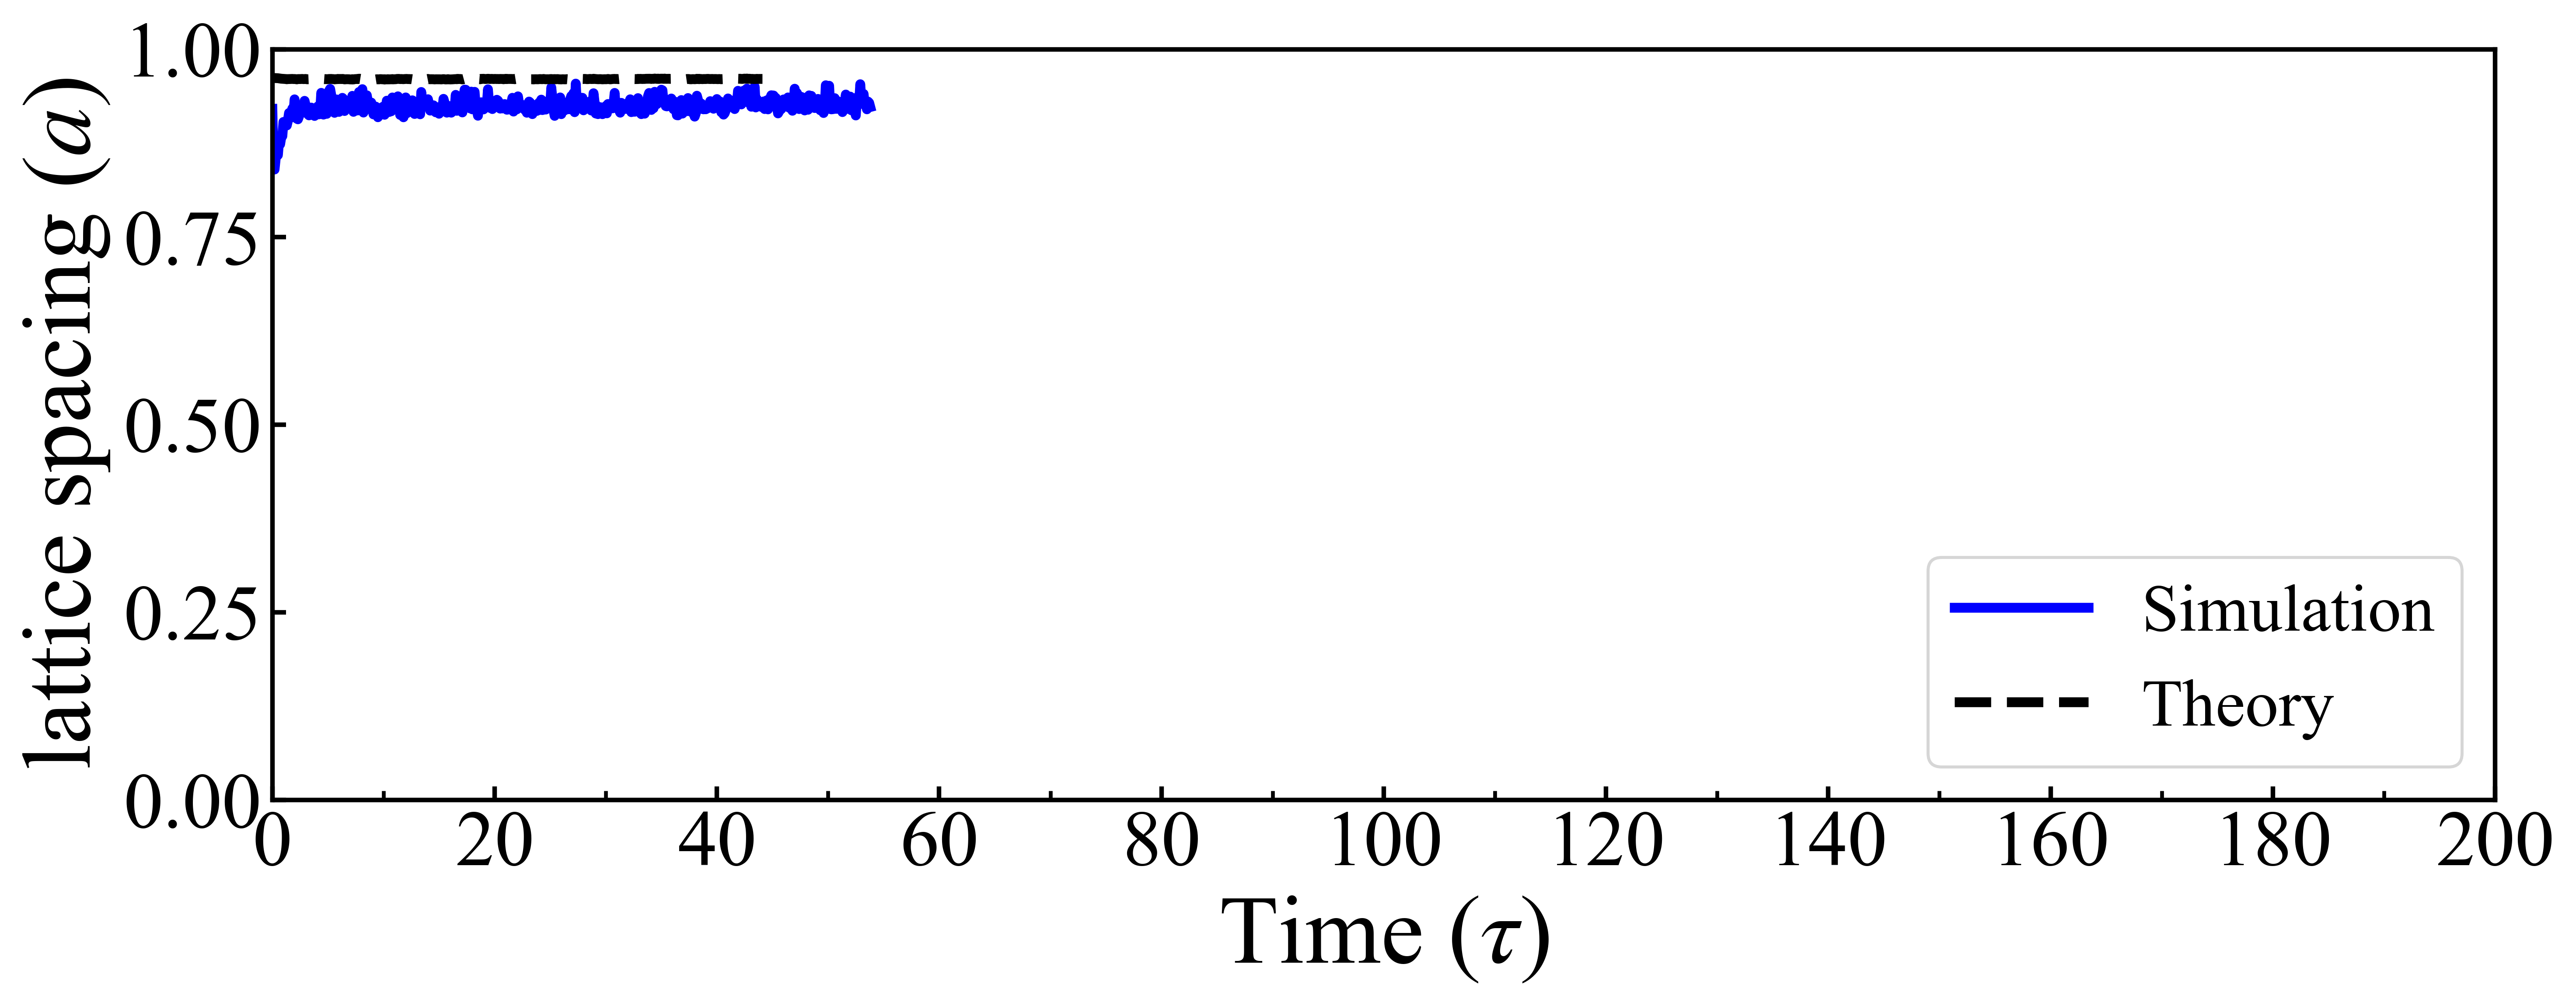

1.8544445176656683
100
200


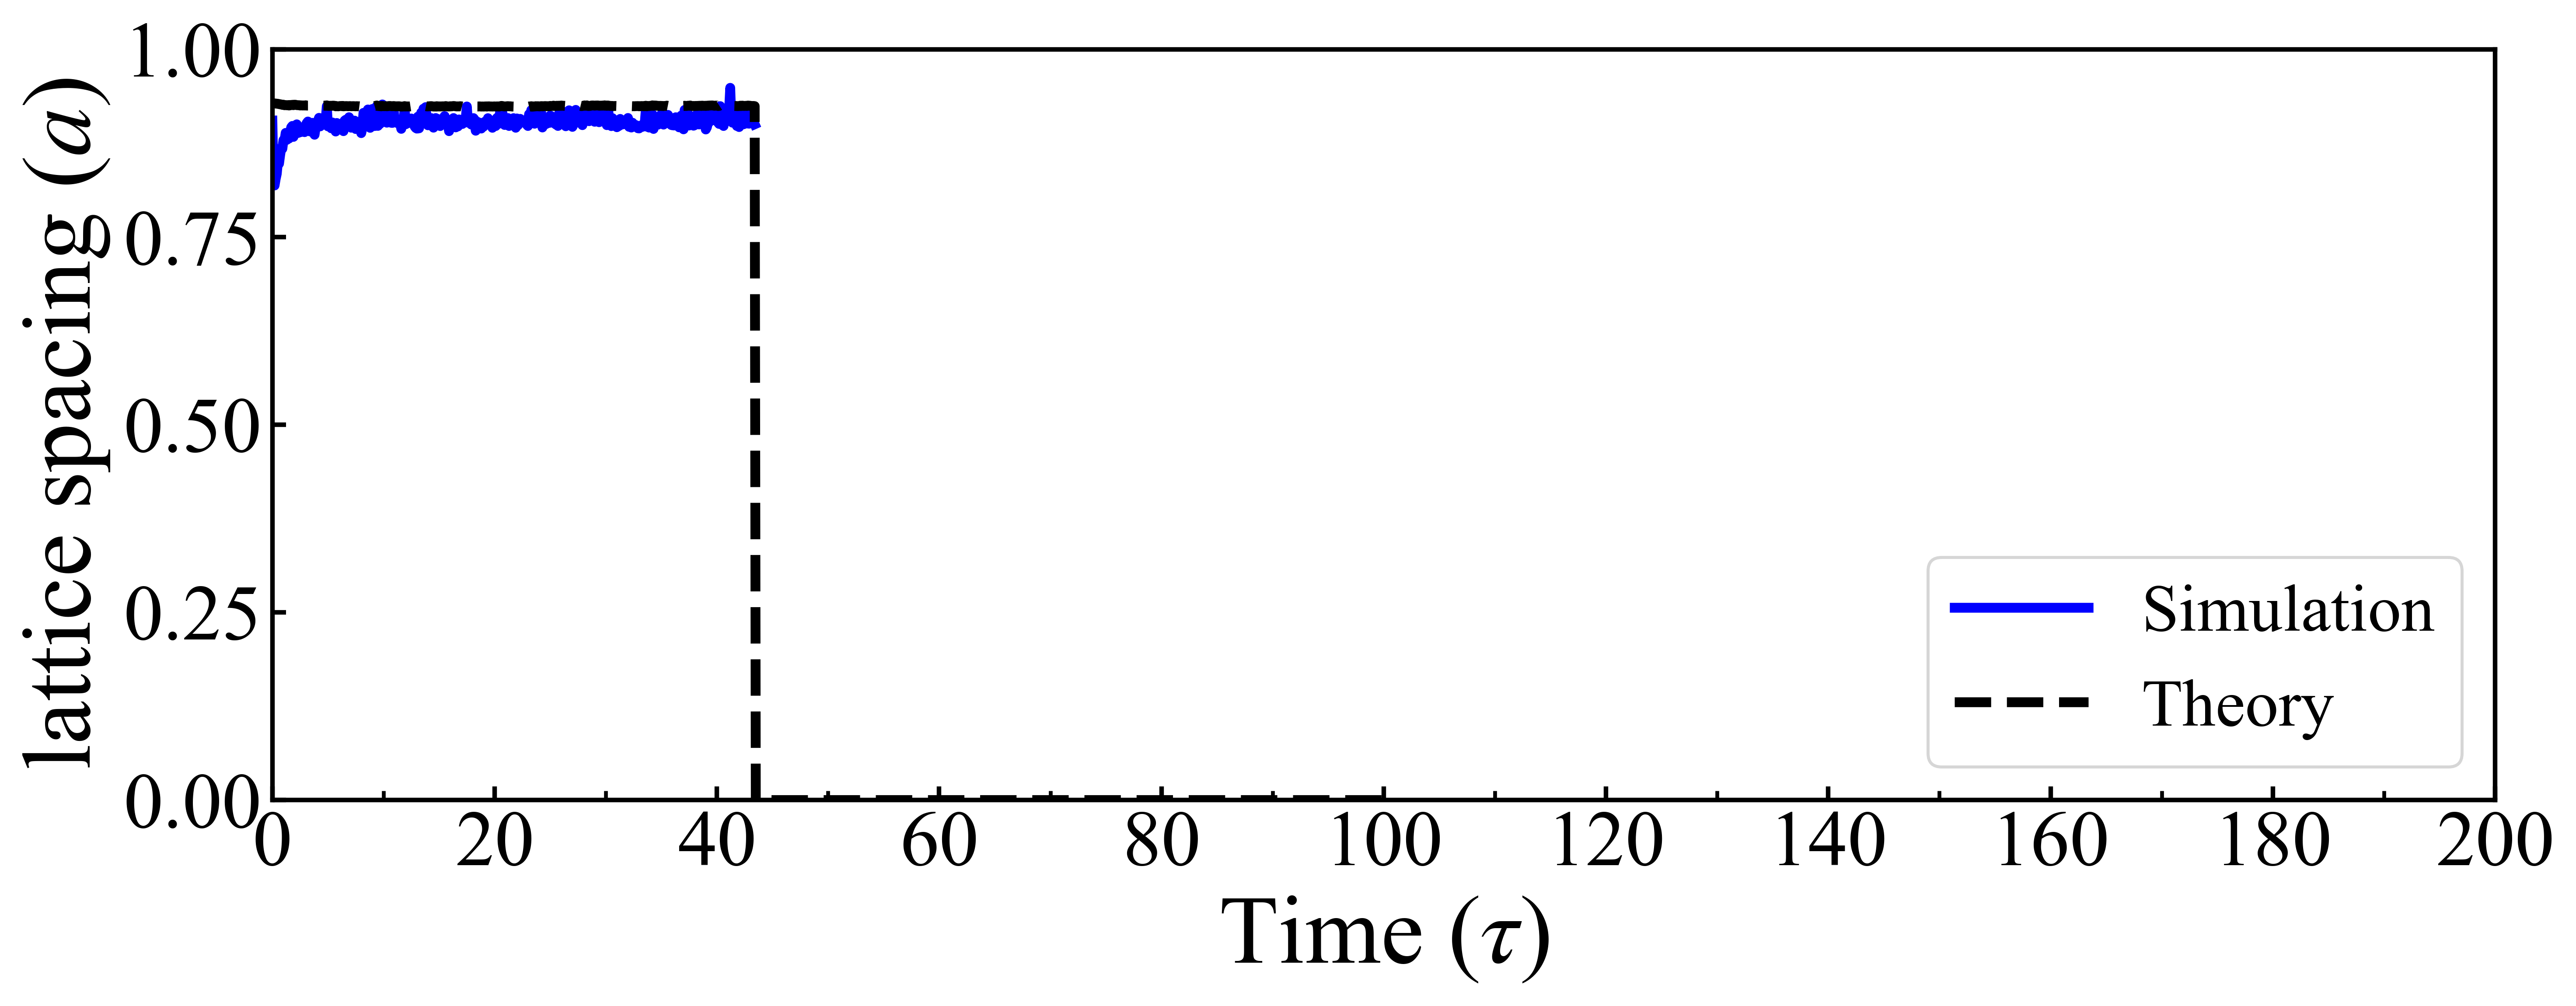

2.284779534332567
100
350


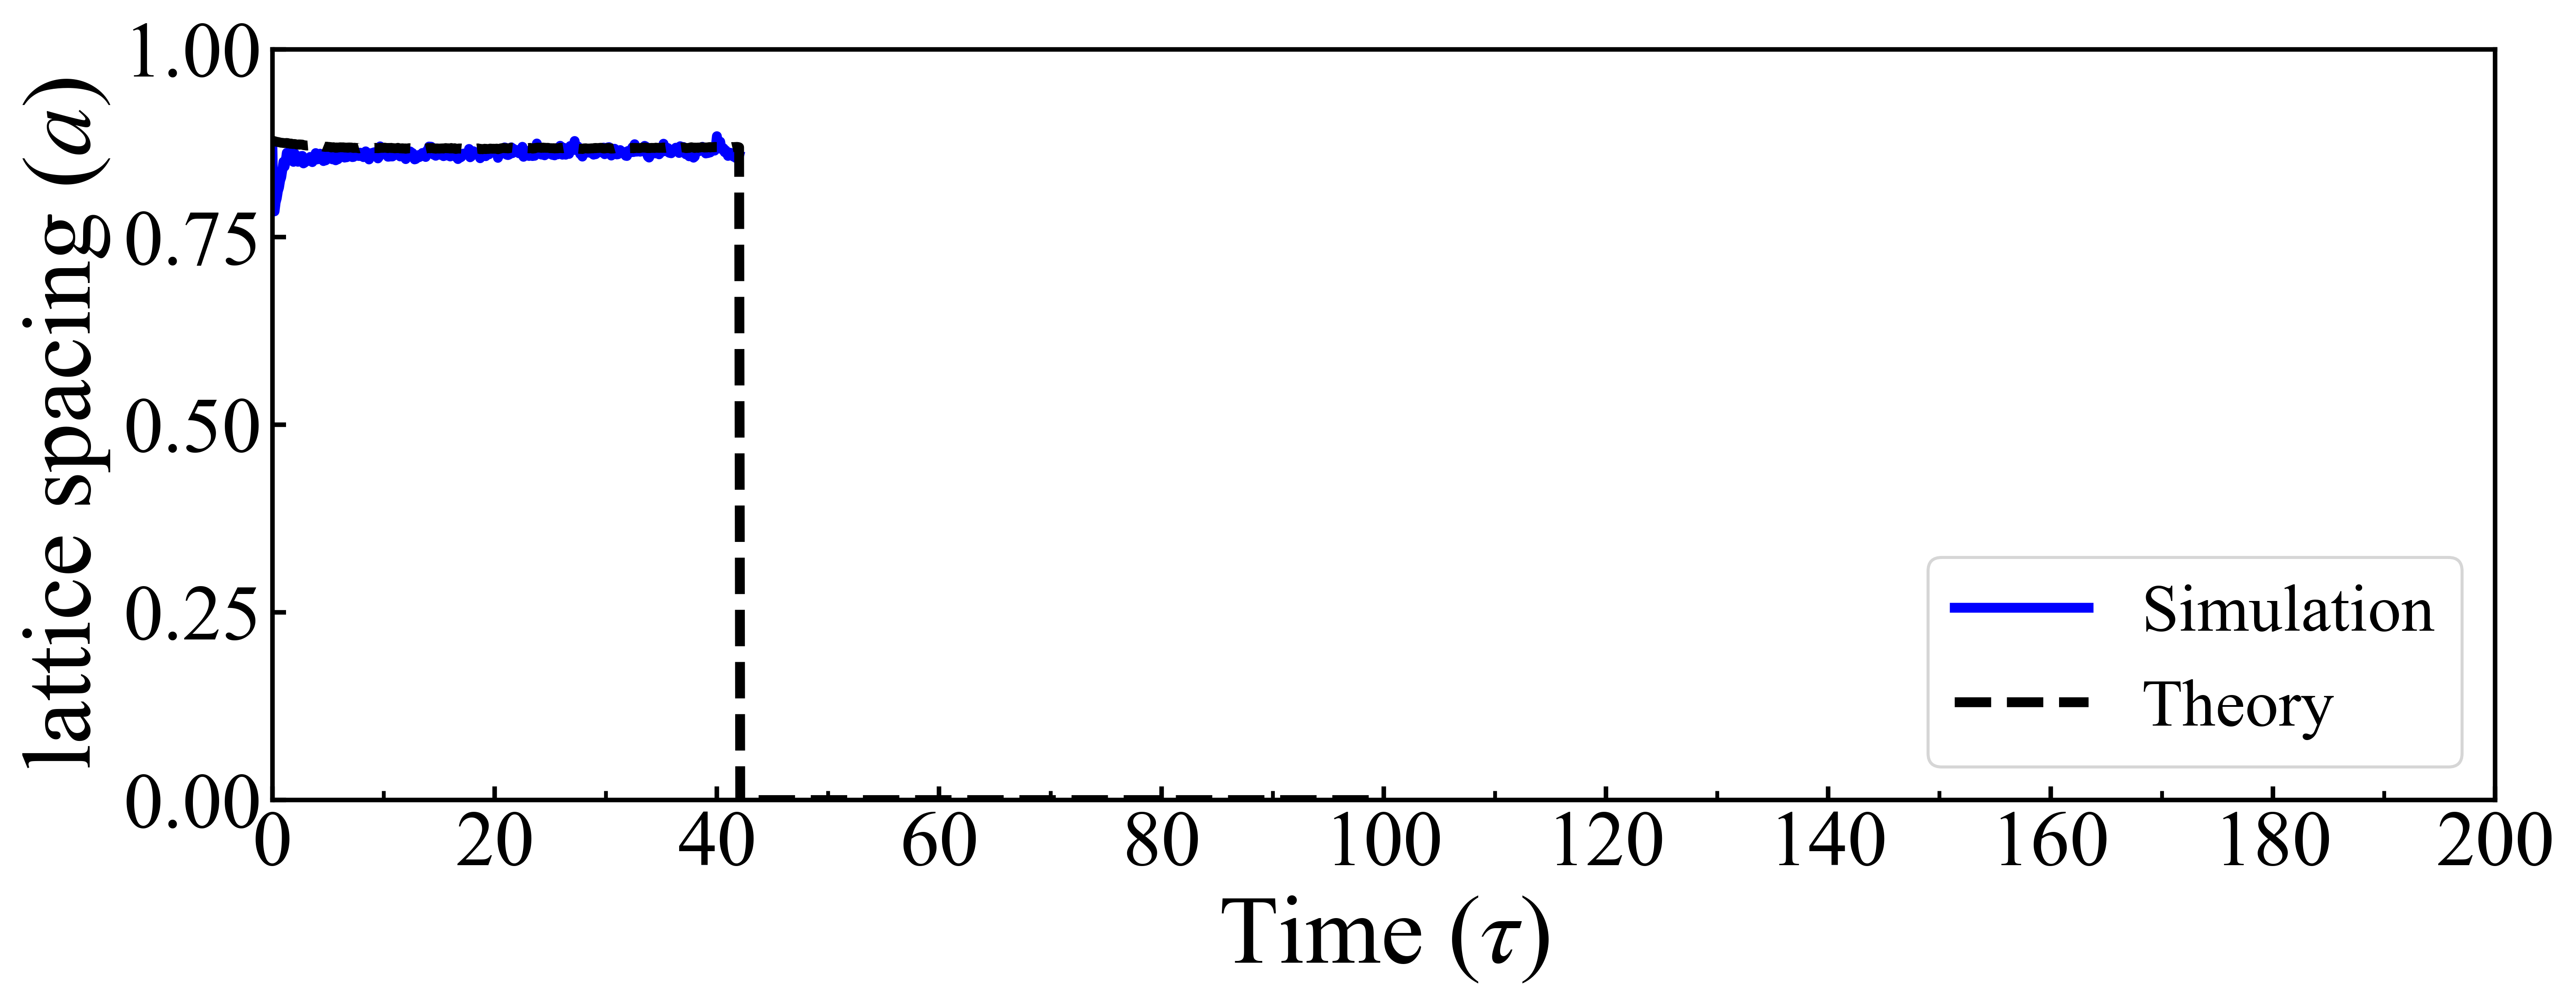

1.9508290751619903
100
250


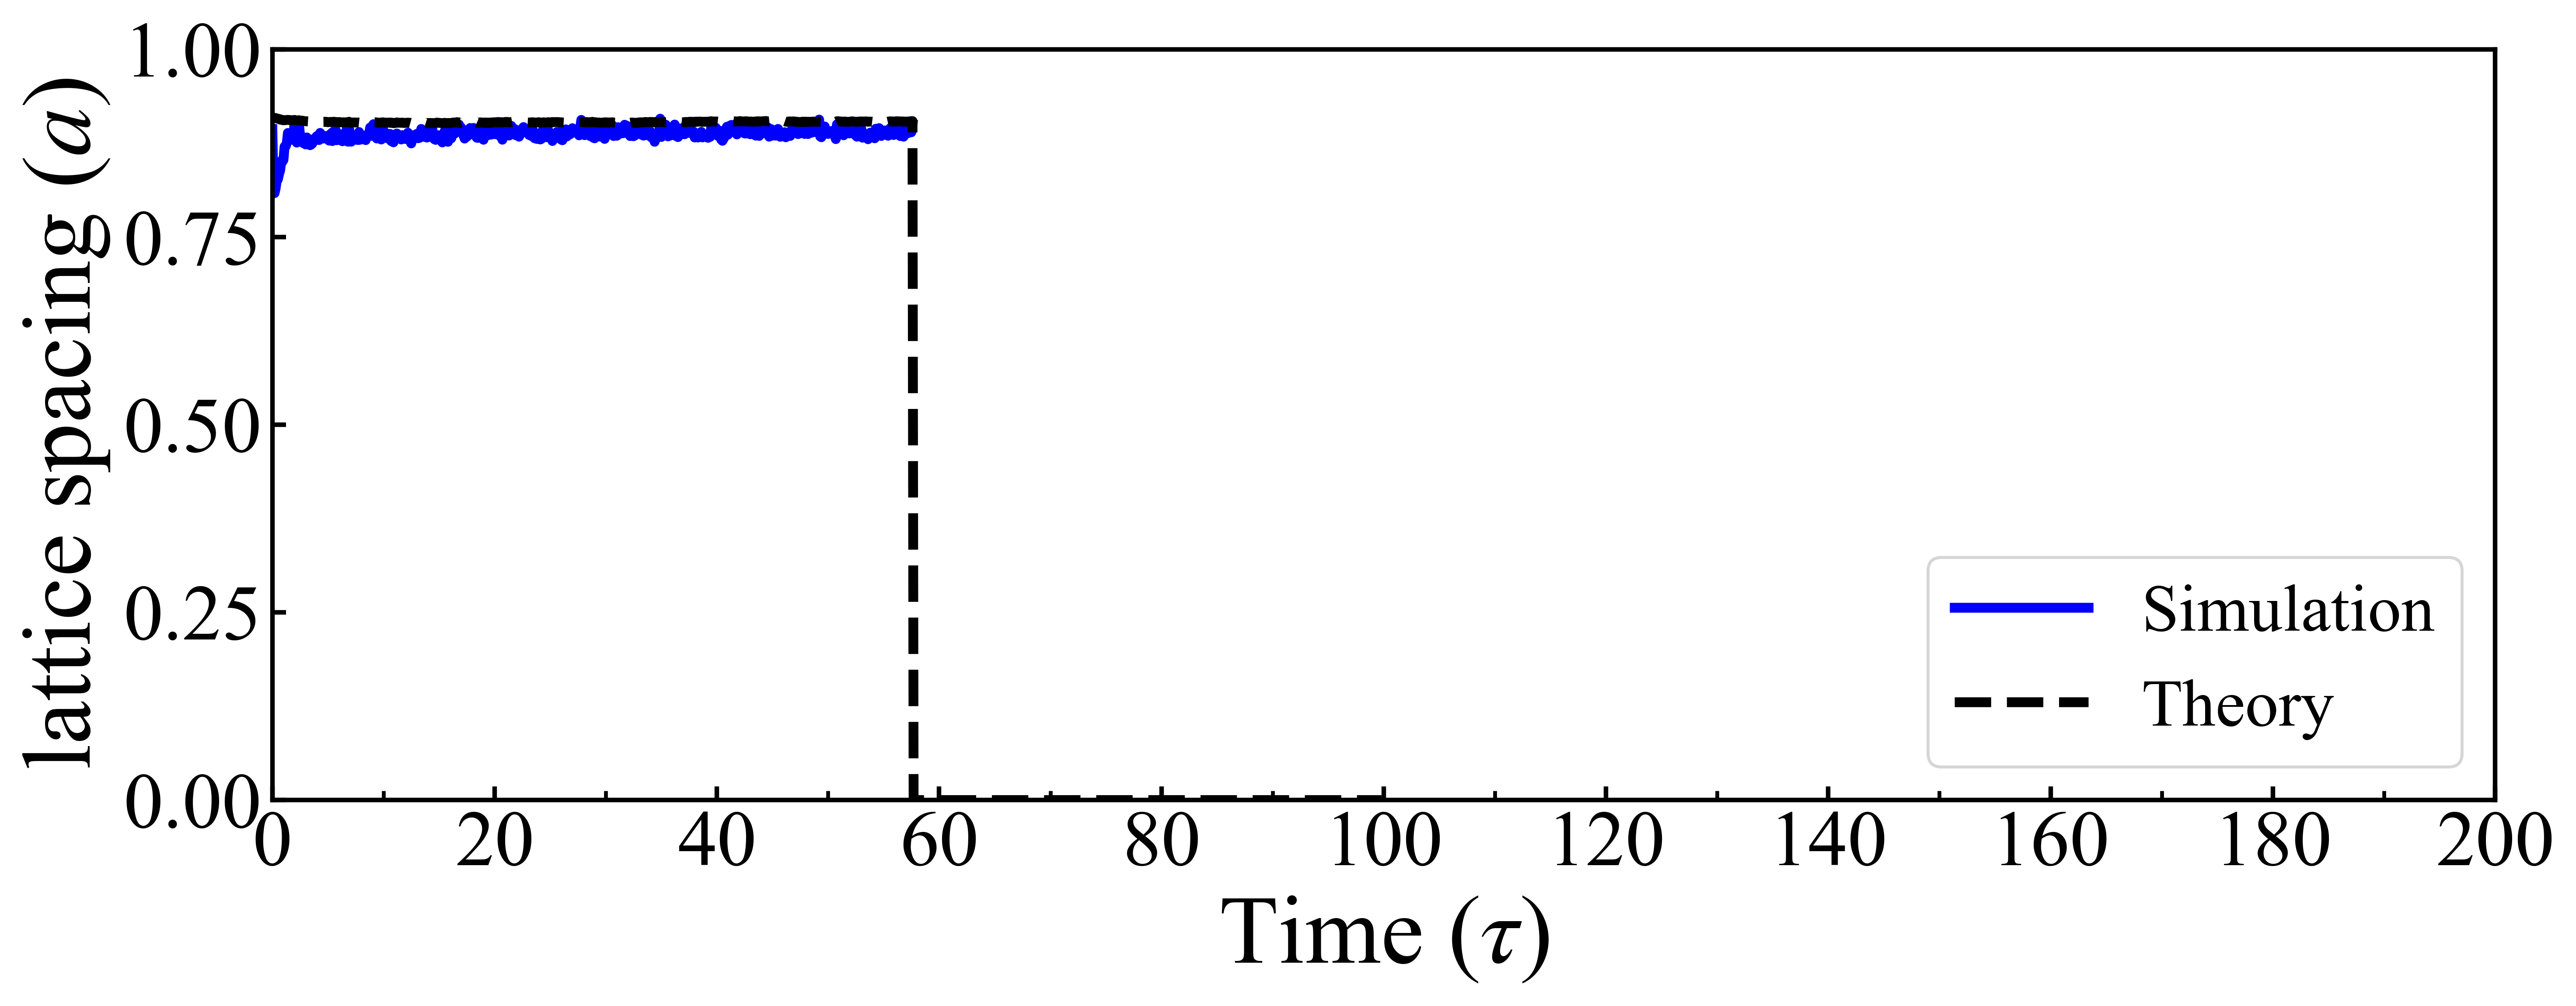

2.2242455501891247
150
350


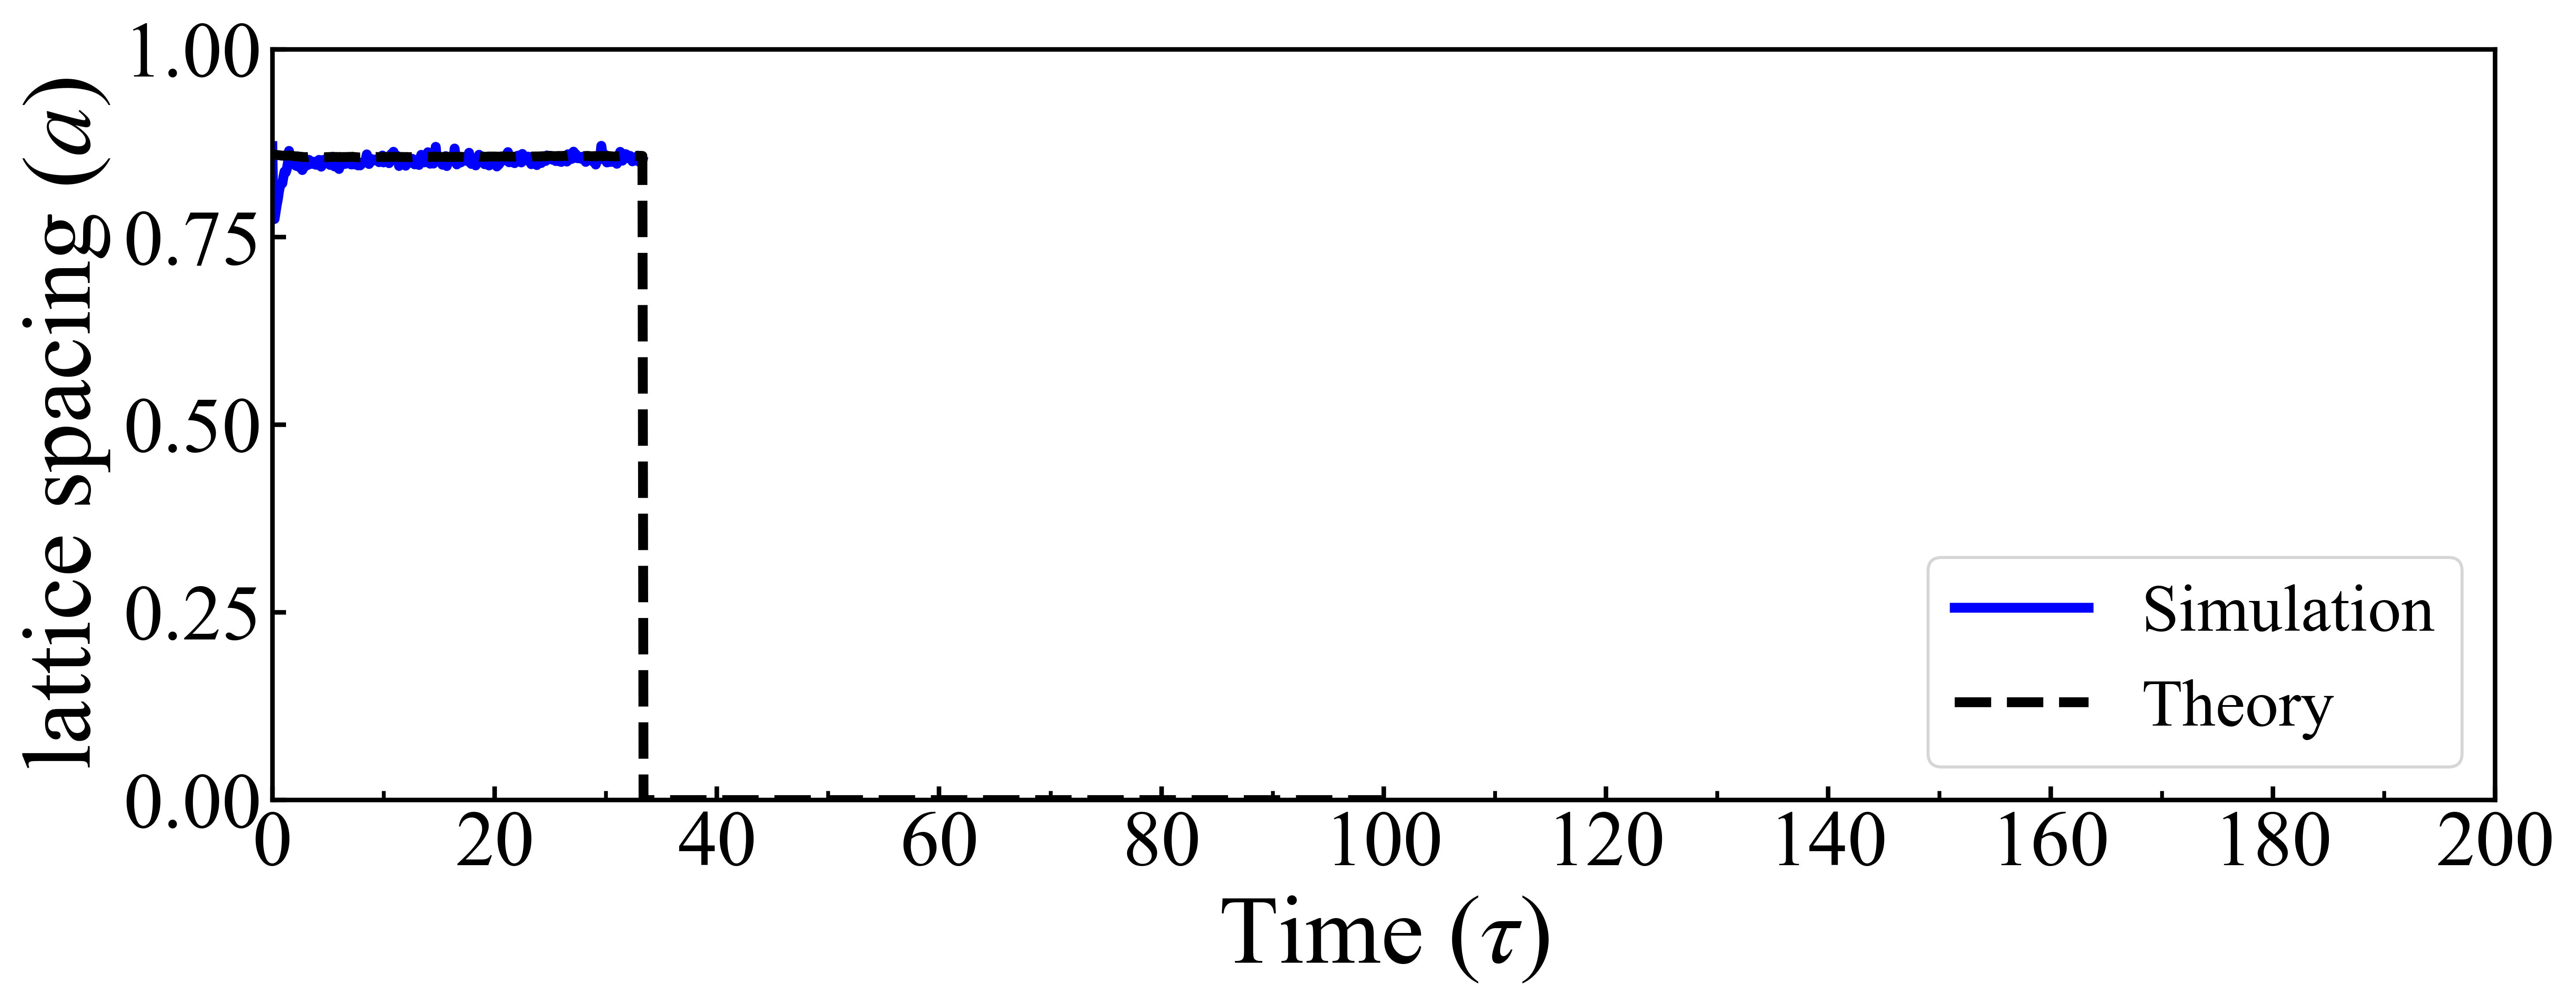

2.0493803693051653
150
200


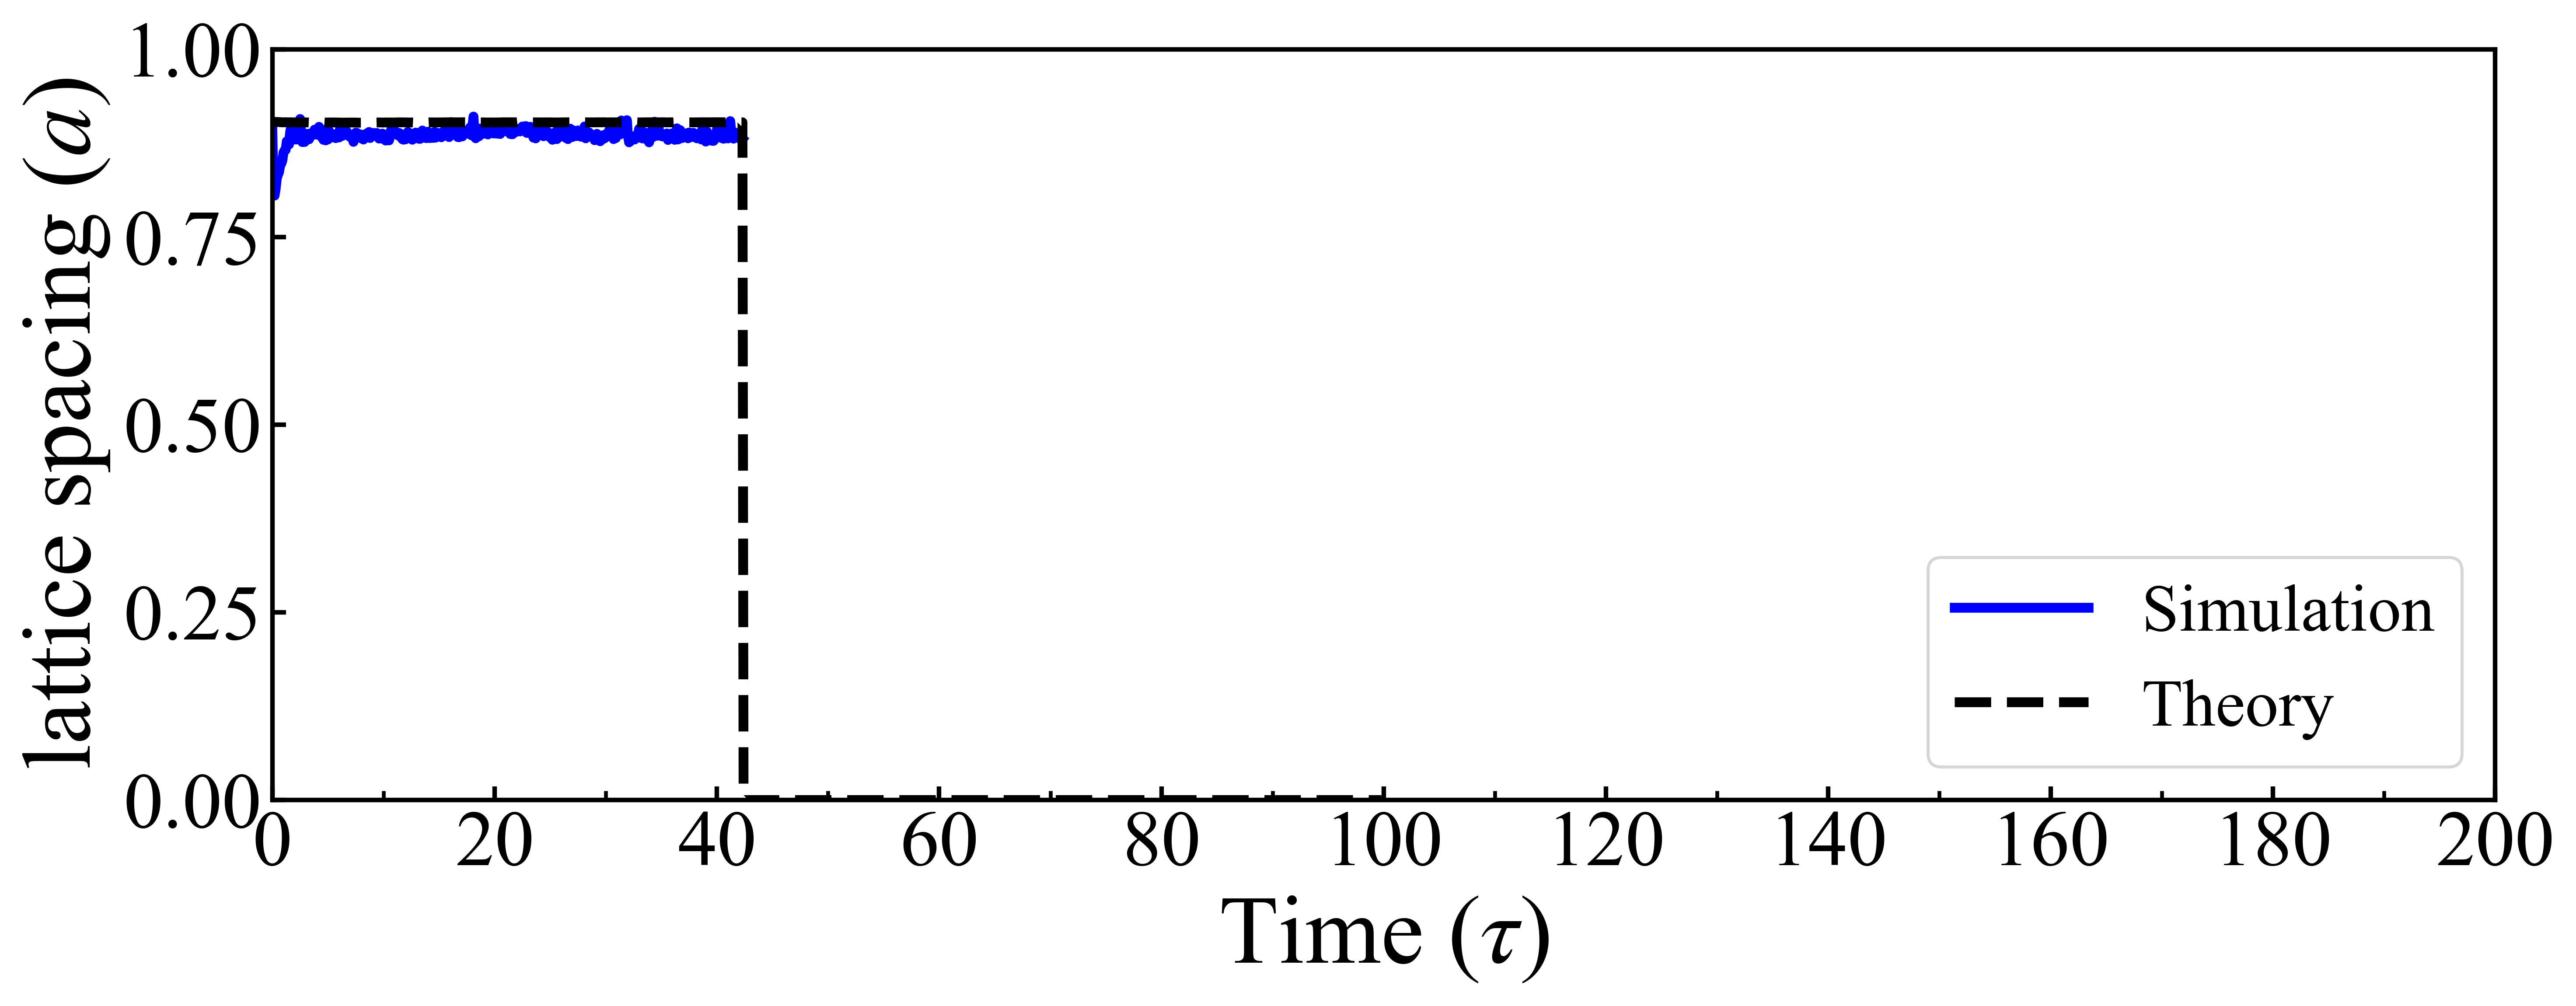

2.066429311956096
150
250


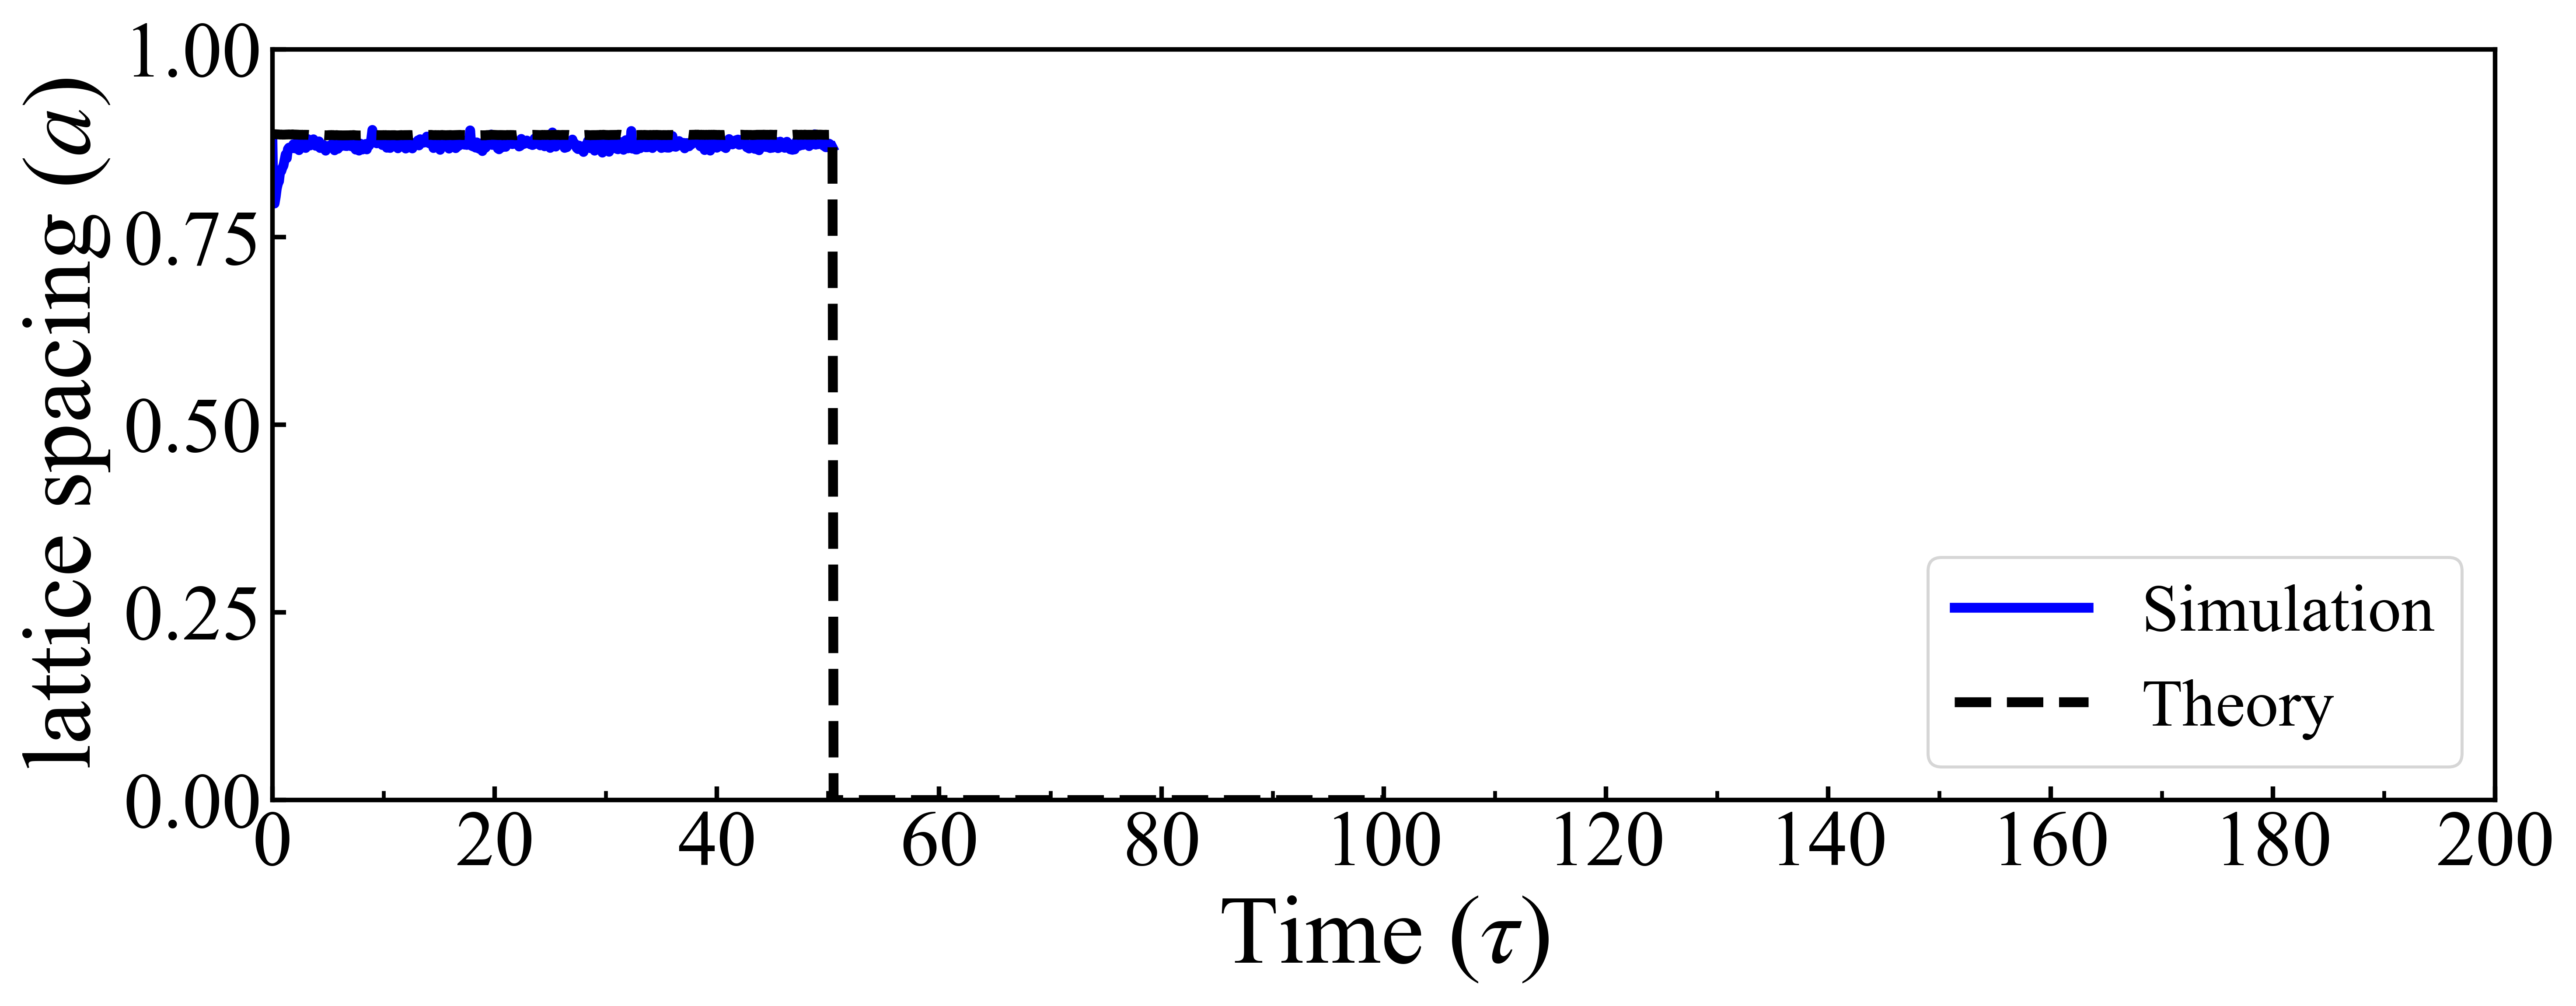

2.306157419090788
200
250


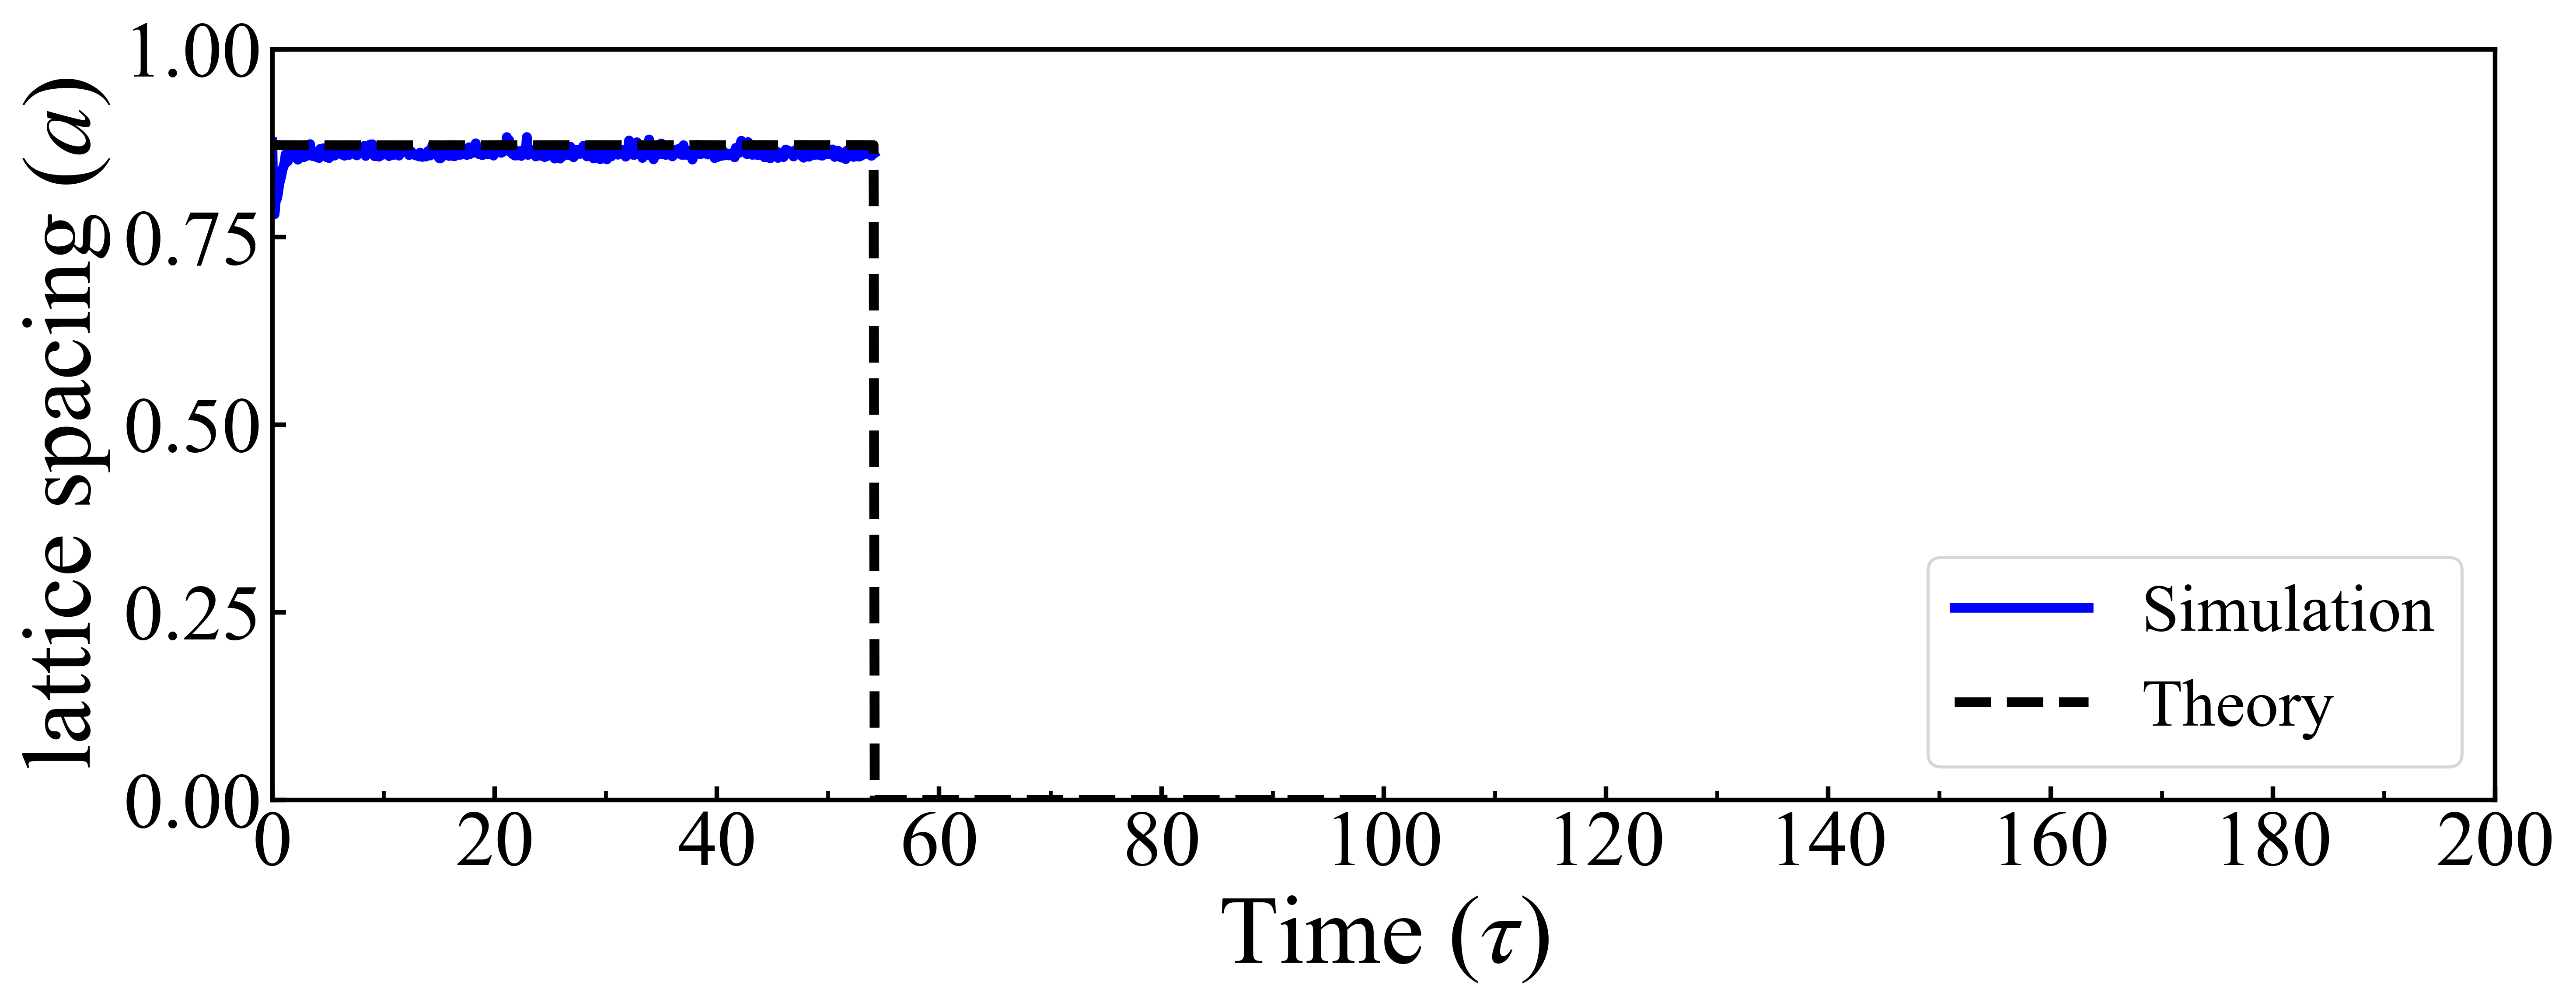

2.4774644383674436
200
200


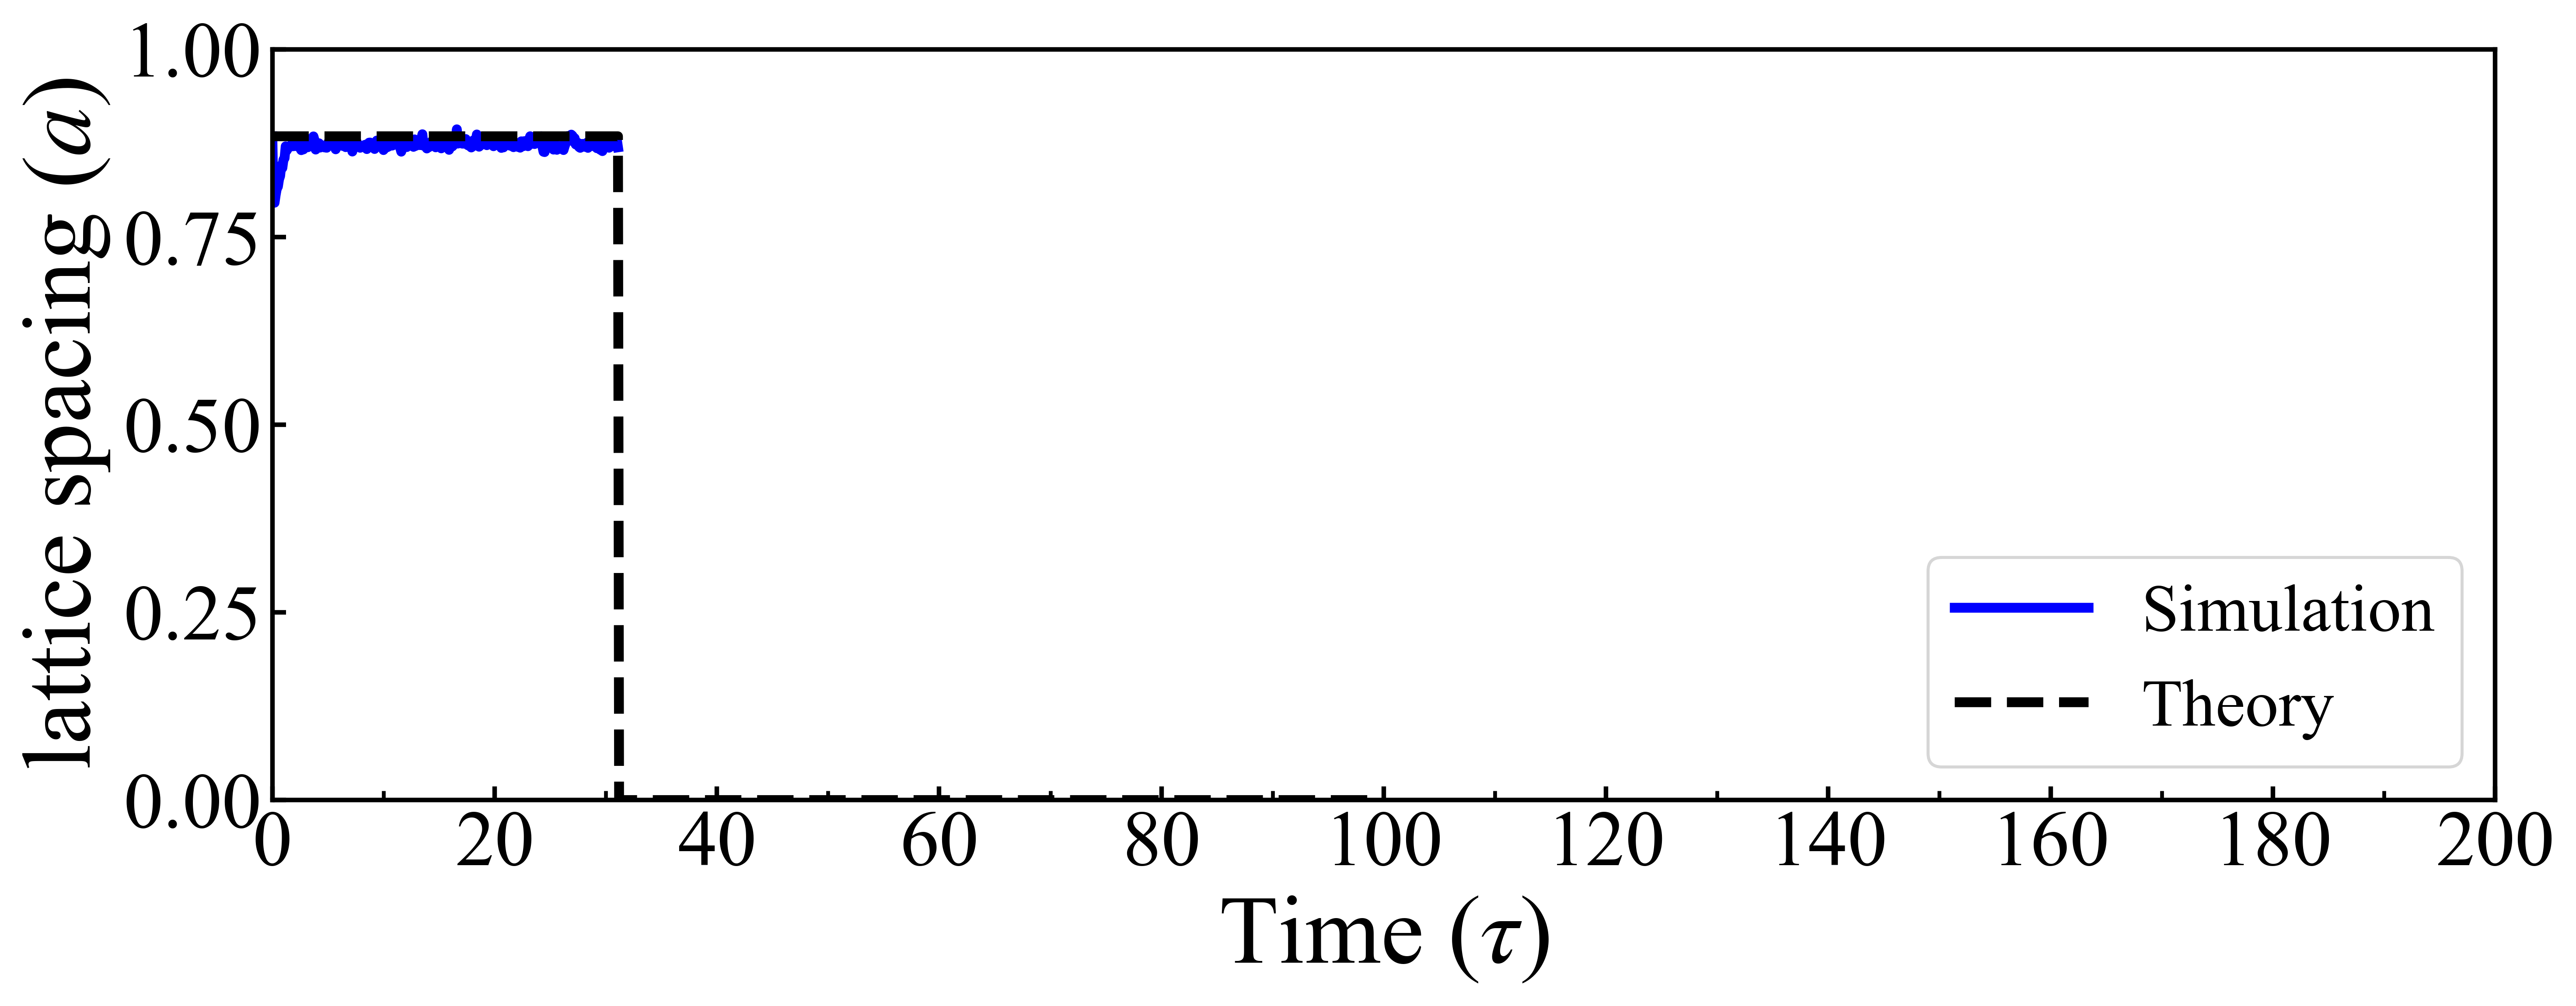

2.289469119883209
200
350


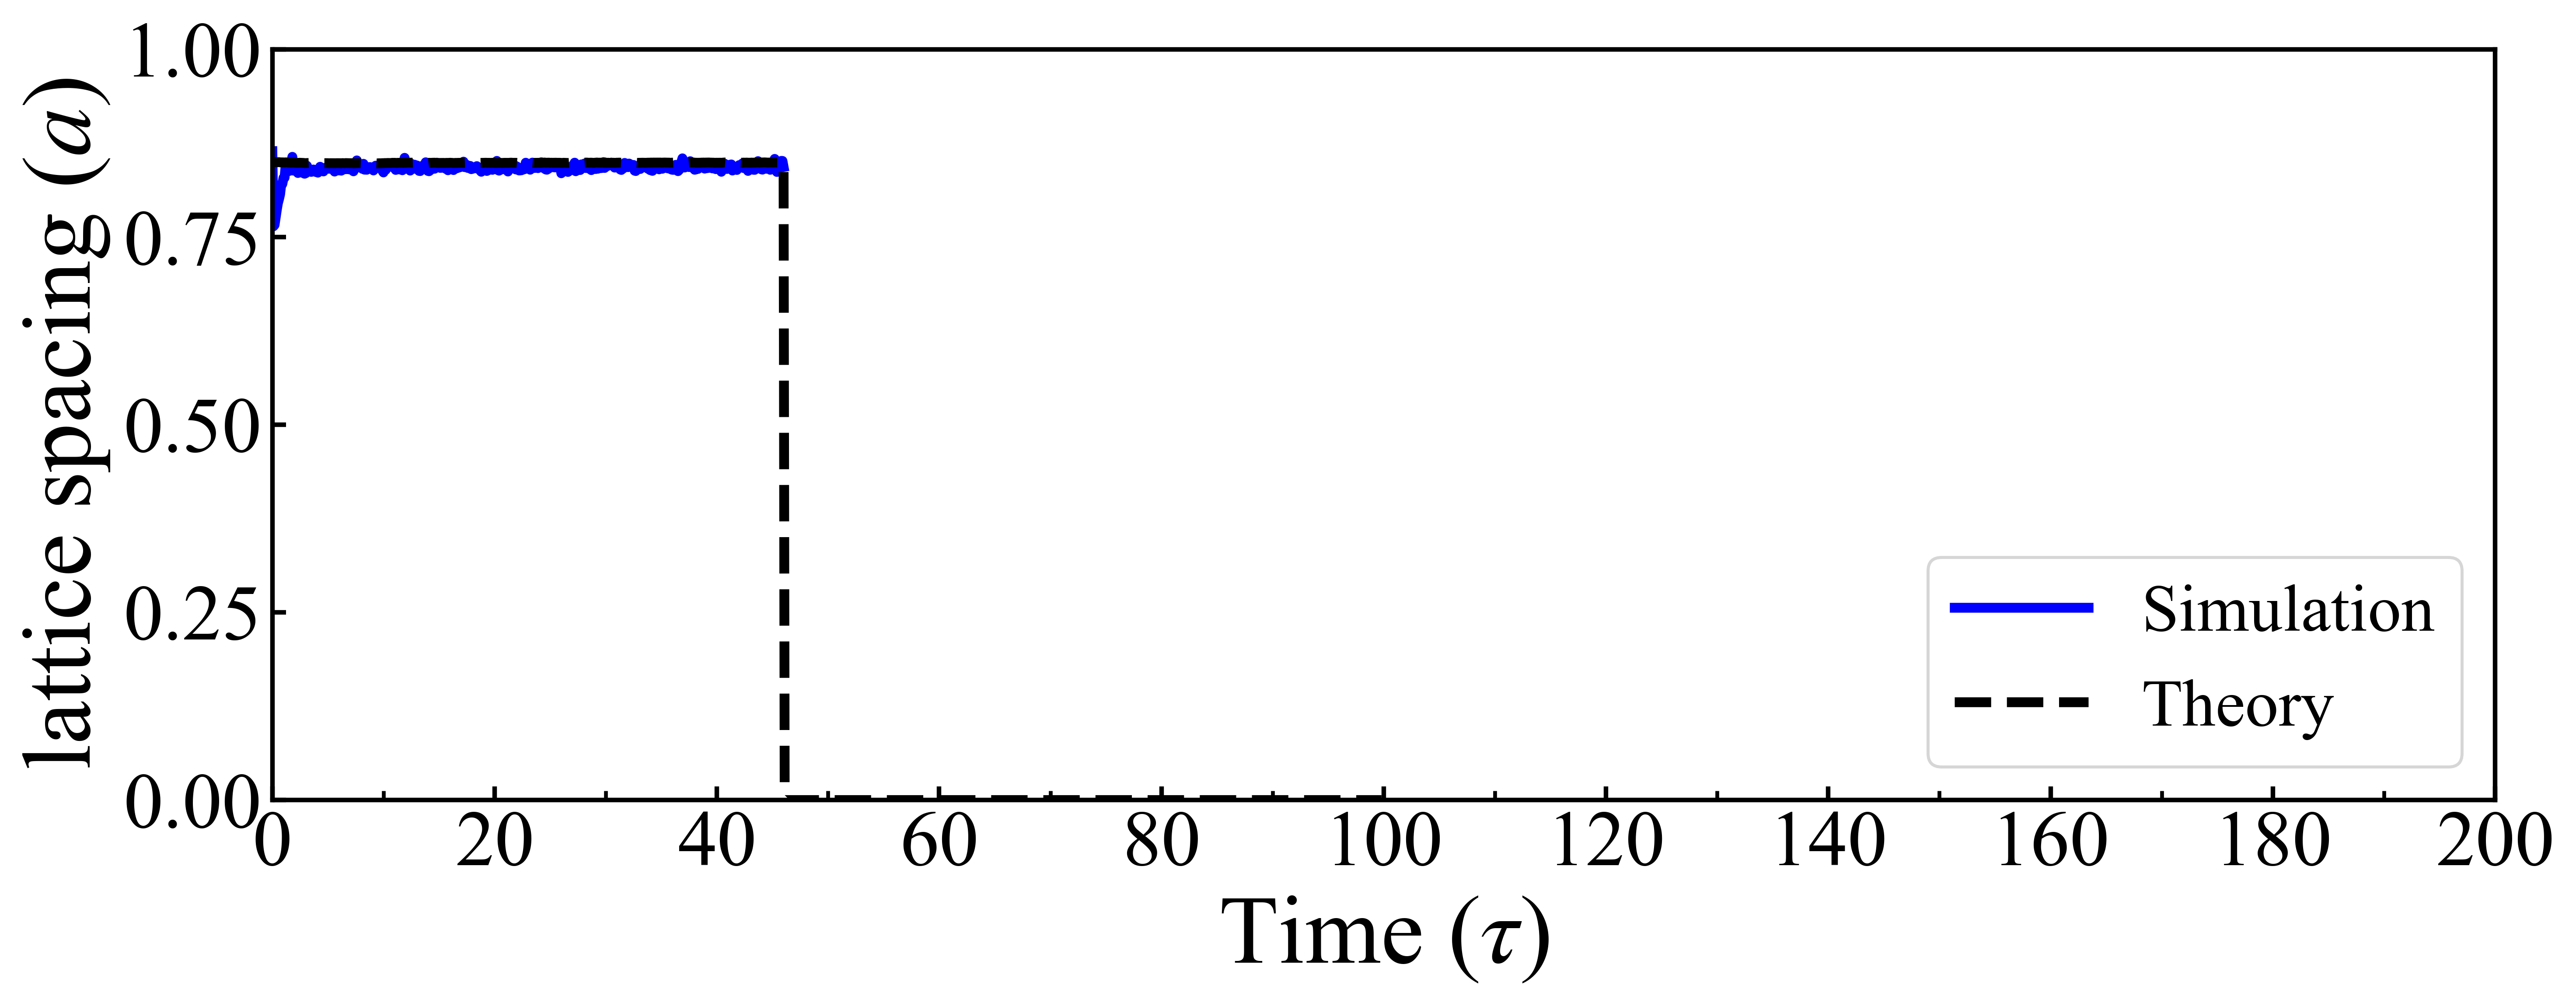

2.6644681836594573
250
250


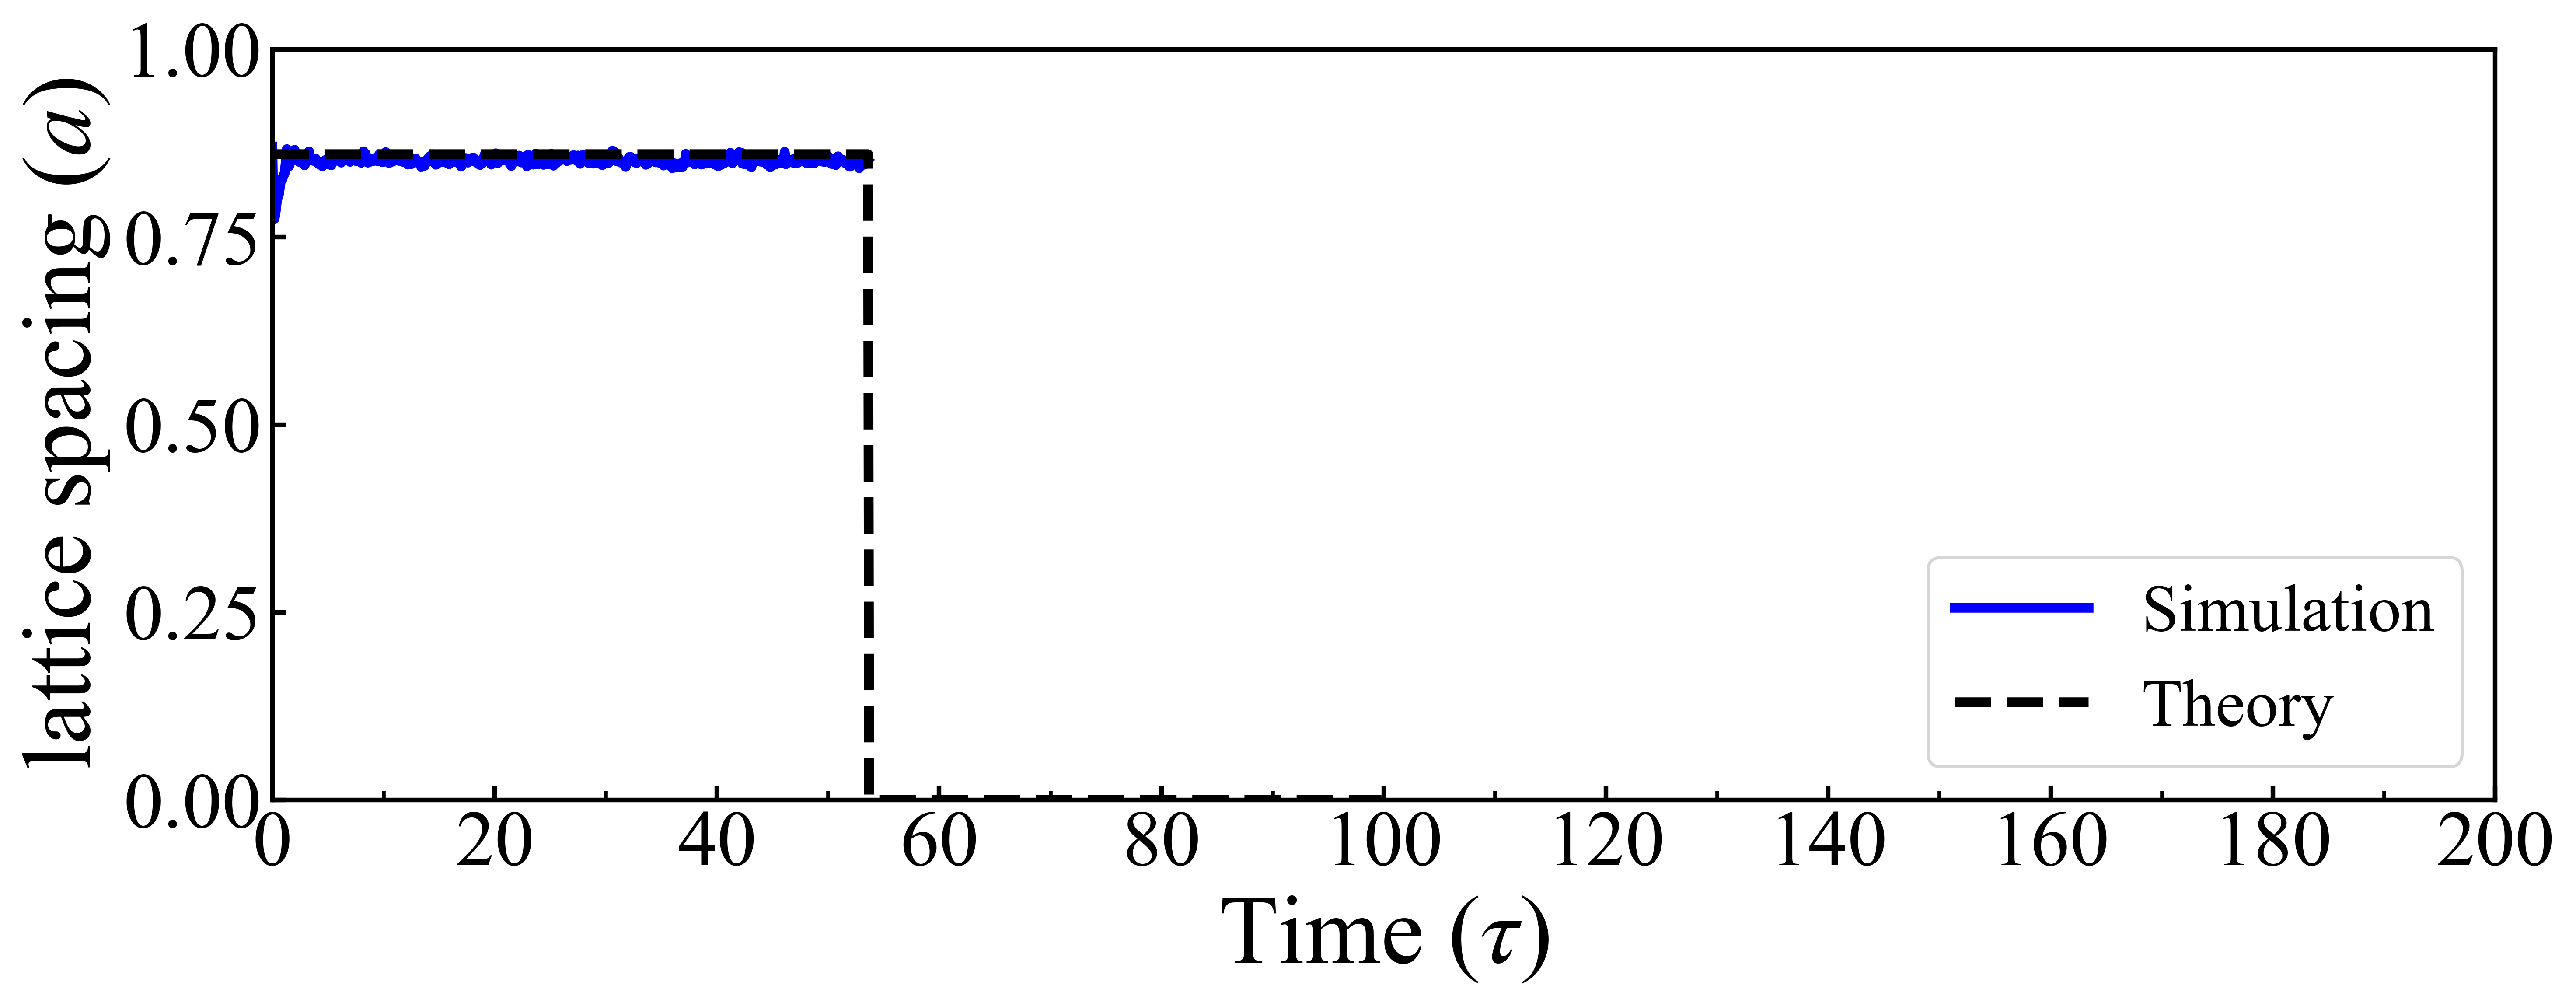

3.0262476356184456
350
350


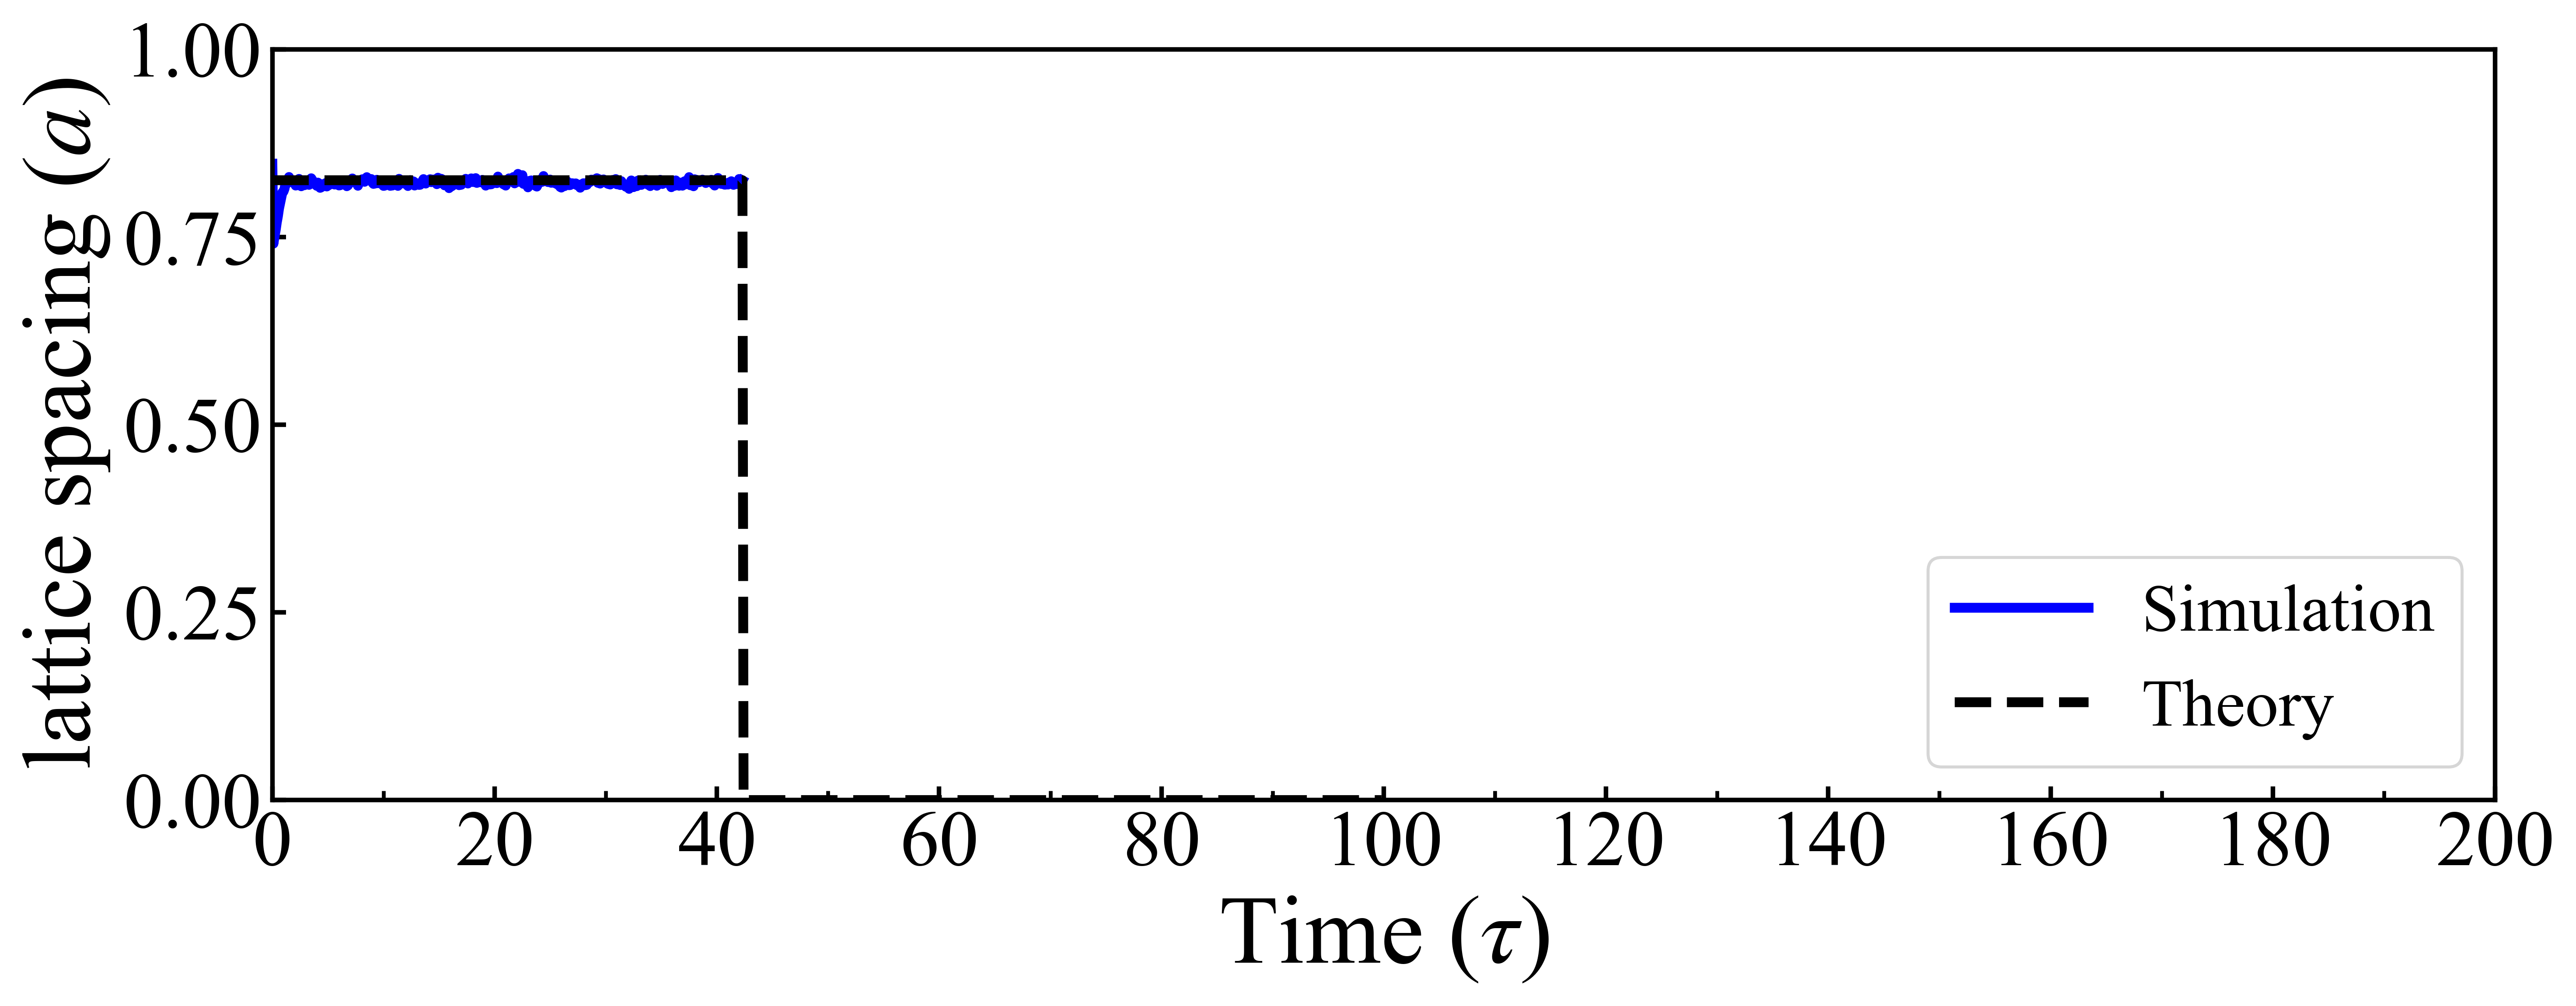

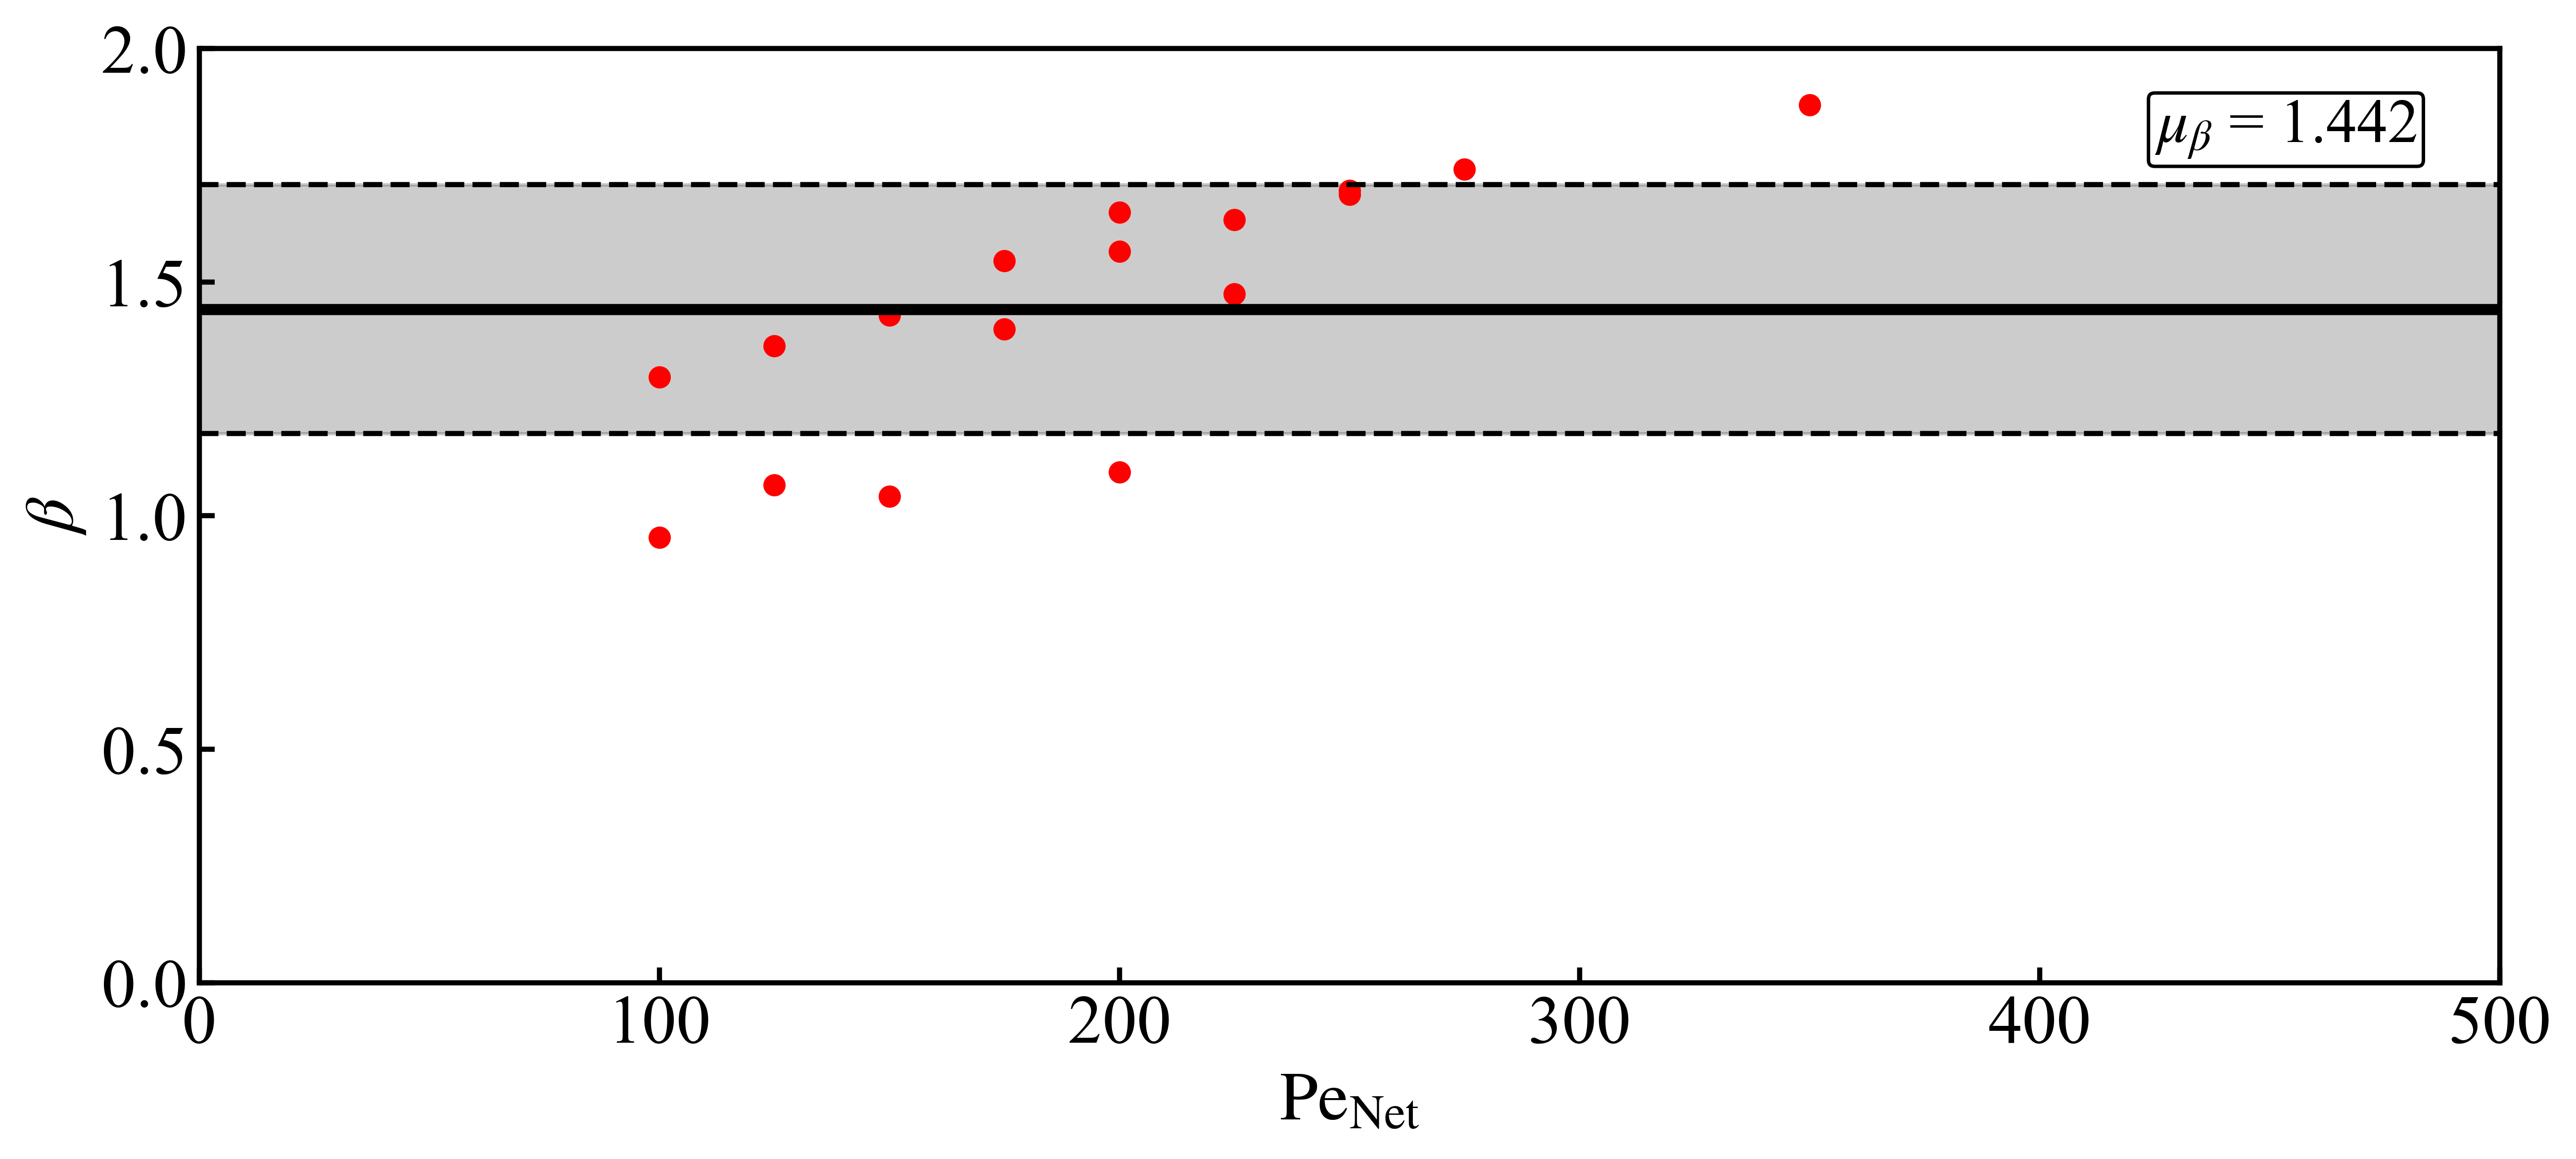

NameError: name 'stop' is not defined

In [47]:
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])


        
        
phase_peA=np.array([])
phase_peB=np.array([])
phase_peRat=np.array([])
phase_peDif=np.array([])
phase_peNet=np.array([])
phase_xA=np.array([])
phase_eps=np.array([])
phase_pnum=np.array([])
phase_phi=np.array([])
avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_arr = np.array([])
beta_peNet = np.array([])
avg_shear=np.array([])
bulk_lat_mean = np.array([])
beta_arr2 = np.array([])
int_lat_mean = np.array([])
all_lat_mean = np.array([])
beta_arr2_std = np.array([])

avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])

avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_final_arr=np.array([])
time_arr3 = np.array([])


beta_test_arr = np.array([])
for n in range(0, len(all_pres_new)):
    if params3['peA'][n]!=450:
        time_arr3 = np.array([])
        bulk_nA_arr = np.array([])
        bulk_nB_arr = np.array([])
        bulk_n_arr = np.array([])
        int_n_arr = np.array([])
        int_nA_arr = np.array([])
        int_nB_arr = np.array([])
        gas_nA_arr = np.array([])
        gas_nB_arr = np.array([])
        dense_nA_arr = np.array([])
        dense_nB_arr = np.array([])
        dense_n_arr = np.array([])

        for j in range(0, len(all_pres_new[n]['clust_size'])):
            #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                bin_size = all_pres_new[n]['sizeBin'][j]
                bin_area = bin_size**2
                time_arr3 = np.append(time_arr3, all_pres_new[n]['tauB'][j])
                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new[n]['Na_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new[n]['Nb_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new[n]['Nb_bulk'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                int_n_arr = np.append(int_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]) / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nA_arr = np.append(int_nA_arr, all_pres_new[n]['Na_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nB_arr = np.append(int_nB_arr, all_pres_new[n]['Nb_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                gas_nA_arr = np.append(gas_nA_arr, all_pres_new[n]['Na_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                gas_nB_arr = np.append(gas_nB_arr, all_pres_new[n]['Nb_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                dense_n_arr = np.append(dense_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Na_bulk'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))

        for i in range(0, len(all_pres)):
            if params3['peA'][n]==params2['peA'][i]:
                if params3['peB'][n]==params2['peB'][i]:
                    bulk_press_total = 0
                    bulk_press_total_expand = 0
                    bulk_press_vals=0
                    time_arr = np.array([])
                    press_arr = np.array([])
                    shear_press_expand=0
                    # Don't plot non-phase-separated data
                    if all_pres[i].empty:
                            continue


                    max_size = np.amax(all_pres[i]['NDense'])
                    for j in range(0, len(all_pres[i]['NDense'])):
                        #if all_pres[i]['NDense'][j]>=0.95*max_size:

                            time_arr = np.append(time_arr, all_pres[i]['Timestep'][j])
                            bulk_trace = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                            bulk_press = bulk_trace / (all_pres[i]['bulkArea'].iloc[j])

                            bulk_trace_expand = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2
                            bulk_press_expand = bulk_trace_expand / (all_pres[i]['bulkArea'].iloc[j])

                            shear_stress = (all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j])/2
                            shear_press = shear_stress / (all_pres[i]['bulkArea'].iloc[j])
                            press_arr = np.append(press_arr, bulk_press/2)

                            if bulk_press > 0:
                                shear_press_expand +=shear_press
                                bulk_press_total += bulk_press
                                bulk_press_total_expand += bulk_press_expand
                                bulk_press_vals += 1
                    if bulk_press_vals > 0:        
                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                        interpart_press=np.append(interpart_press, avg_press)
                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                        interpart_peA=np.append(interpart_peA, params2['peA'][i])
                        interpart_peB=np.append(interpart_peB, params2['peB'][i])
                        interpart_peNet=np.append(interpart_peNet, params2['peB'][i] * (1-params2['xA'][i]/100) + params2['peA'][i] * (params2['xA'][i]/100))
                        interpart_xA=np.append(interpart_xA, params2['xA'][i])
                        interpart_phi=np.append(interpart_phi, params2['phi'][i])
                        interpart_eps=np.append(interpart_eps, params2['eps'][i])

                    for k in range(0, len(all_pres_new2)):

                        # Don't plot non-phase-separated data
                        if all_pres_new2[k].empty:
                                continue

                        if params4['peA'][k]==params2['peA'][i]:
                            if params4['peB'][k]==params2['peB'][i]:
                                if params4['peA'][k]!=450:
                                    time_arr2 = np.array([])
                                    

                                    max_size = np.amax(all_pres_new2[k]['clust_size'])
                                    bulk_lat_arr = np.array([])
                                    int_lat_arr = np.array([])
                                    all_lat_arr = np.array([])

                                    for j in range(0, len(all_pres_new2[k]['clust_size'])):
                                        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                                            bin_size = all_pres_new2[k]['sizeBin'][j]
                                            bin_area = bin_size**2
                                            time_arr2 = np.append(time_arr2, all_pres_new2[k]['tauB'][j])
                                            bulk_lat_arr = np.append(bulk_lat_arr, all_pres_new2[k]['lat_mean_bulk'][j])
                                            all_lat_arr = np.append(all_lat_arr, all_pres_new2[k]['lat_mean_all'][j])
                                            int_lat_arr = np.append(int_lat_arr, all_pres_new2[k]['lat_mean_int'][j])
                                    time_ids = np.intersect1d(time_arr, time_arr2, return_indices=True)
                                    time_ids_press = time_ids[0].astype(int)
                                    time_ids_lat = time_ids[1].astype(int)
                                    

                                    
                                    time_ids = np.intersect1d(time_ids_press, time_arr3, return_indices=True)
                                    time_ids_pres2 = time_ids[0].astype(int)
                                    time_ids_dens = time_ids[1].astype(int)
                                    #beta_plot = press_arr[time_ids_press][time_ids_pres2]/(2*np.sqrt(3)*(((dense_nA_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peA[-1] + (dense_nB_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peB[-1])-50)/bulk_lat_arr[time_ids_lat][time_ids_pres2])
                                    if np.max(time_ids_lat[time_ids_pres2])>30:
                                        
                                        avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                        avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                        avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
                                        avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))

                                        avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                        avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
                                        avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                        avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
                                        avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                        avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                        avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

        
                                        bulk_lat_mean = np.append(bulk_lat_mean, np.mean(bulk_lat_arr))
                                        all_lat_mean = np.append(all_lat_mean, np.mean(all_lat_arr))
                                        int_lat_mean = np.append(int_lat_mean, np.mean(int_lat_arr))
                                    
                                        phase_peA=np.append(phase_peA, params4['peA'][k])
                                        phase_peB=np.append(phase_peB, params4['peB'][k])
                                        phase_peDif=np.append(phase_peDif, params4['peB'][k]-params4['peA'][k])
                                        phase_peRat=np.append(phase_peRat, params4['peA'][k]/params4['peB'][k])

                                        phase_peNet=np.append(phase_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))
                                        phase_xA=np.append(phase_xA, params4['xA'][k])
                                        phase_phi=np.append(phase_phi, params4['phi'][k])
                                        phase_eps=np.append(phase_eps, params4['eps'][k])

                                        beta_plot = press_arr[time_ids_press][time_ids_pres2]

                                        beta_test_arr = np.append(beta_test_arr, beta_plot[-1]) 
                                        #plt.plot(time_arr, press_arr/np.max(press_arr), '-', color='green', label='Press',lw=1.8*1.8)
                                        

                                        beta2 = ((24/phase_peB[-1]) * (2*(1.0/bulk_lat_arr)**13 - (1.0/bulk_lat_arr)**7))
                                        print(np.mean(beta2))
                                        ymin = np.mean(beta2)-1
                                        ymax=np.mean(beta2)+1
                                        
                                        xy, x_ind, y_ind = np.intersect1d(time_arr2, time_arr3, return_indices=True)
                                        #x_test = (((dense_nA_arr[y_ind]/dense_n_arr[y_ind]) * phase_peA[-1] + (dense_nB_arr[y_ind]/dense_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        div=(1/all_lat_arr[x_ind])
                                        x_test = (24.) * ((2*(div**13)) - (div)**7)
                                        y_test = (int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1]
                                        #y_test = np.ones(len(int_nA_arr[y_ind]))
                                        from scipy.optimize import curve_fit
                                        def func(x, m):
                                            return x/m

                                        xy2, x_ind2, y_ind2 = np.intersect1d(time_arr2[x_ind], time_arr, return_indices=True)

                                        popt, pcov = curve_fit(func, x_test, y_test-50)
                                        beta_final_arr = np.append(beta_final_arr, popt[0])
                                        
                                        def ljForce(r, eps, sigma=1.):
                                            div = (sigma/r)
                                            dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
                                            return dU

                                        def avgCollisionForce(pe, coeff2, power=1.):
                                            '''Computed from the integral of possible angles'''
                                            peCritical = 40.
                                            if pe < peCritical:
                                                pe = 0
                                            else:
                                                pe -= peCritical
                                            magnitude = 6.
                                            # A vector sum of the six nearest neighbors
                                            magnitude = np.sqrt(28)
                                        #     return (magnitude * (pe**power)) / (np.pi)
                                        #     return (pe * (1. + (8./(np.pi**2.))))
                                            coeff = coeff2#1.764#3.0#1.92#2.03#3.5#2.03
                                            #coeff= 0.4053
                                            return (pe * coeff)

                                        def conForRClust(pe, eps, coeff2):
                                            out = []
                                            r = 1.112
                                            skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
                                            for j in skip:
                                                while ljForce(r, eps) < avgCollisionForce(pe, coeff2):
                                                    r -= j
                                                r += j
                                            out = r
                                            return out

                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        lat_theory = np.zeros(len(time_arr3))
                                        for p in range(0, len(time_arr3[y_ind])):
                                            lat_theory[p] = conForRClust(y_test[p]-50, 1.0, beta_final_arr[-1])
                                            #lat_theory[p] = getLat(phase_peB[-1], 1.0)
                                        #y_arr_now = np.ones(2) * lat_theory
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        
                                        plt.plot(time_arr2, all_lat_arr, '-', linewidth=1.8*1.8, color='blue', label='Simulation')
                                        plt.plot(time_arr3, lat_theory, '--', linewidth=1.8*1.8, color='black', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'lattice spacing ($a$)', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='lower right', fontsize=22)
                                        ax1.set_ylim([0,1.0])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        
                                        xy, x_ind, y_ind = np.intersect1d(time_arr2, time_arr3, return_indices=True)
                                        #x_test = (((dense_nA_arr[y_ind]/dense_n_arr[y_ind]) * phase_peA[-1] + (dense_nB_arr[y_ind]/dense_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        x_test = (((int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        from scipy.optimize import curve_fit
                                        def func(x, m):
                                            return   x * 2.0 * m *np.sqrt(3)

                                        xy2, x_ind2, y_ind2 = np.intersect1d(time_arr2[x_ind], time_arr, return_indices=True)

                                        popt, pcov = curve_fit(func, x_test, press_arr[y_ind2])
                                        #beta_final_arr = np.append(beta_final_arr, popt[0])
                                        

                                        beta_arr = np.append(beta_arr, interpart_press[-1]/(2*np.sqrt(3)*interpart_peNet[-1]/bulk_lat_mean[-1]))
                                        beta_arr2 = np.append(beta_arr2, np.mean(beta2))
                                        std_sum = 0
                                        std_num =0
                                        for o in range(0, len(bulk_lat_arr)):
                                            std_sum +=(bulk_lat_arr[o]-bulk_lat_mean[-1])**2
                                            std_num +=1

                                        beta_arr2_std = np.append(beta_arr2_std, (std_sum/std_num)**0.5)
                                        beta_peNet=np.append(beta_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))

#Define colors for plots    
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
std = 0
for k in range(0, len(beta_final_arr)):
    std += (beta_final_arr[k]-np.mean(beta_final_arr))**2
std_beta = (std/len(beta_final_arr))**0.5
fig, ax1 = plt.subplots(figsize=(12,5))
y_arr = np.ones(2) * np.mean(beta_final_arr)
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
ax1.plot(x_arr, y_arr, linewidth = 1.8*1.8, color='black')
ax1.plot(x_arr, y_arr_min, linewidth = 1.5, color='black', linestyle='--')
ax1.plot(x_arr, y_arr_max, linewidth = 1.5, color='black', linestyle='--')

ax1.fill_between(x_arr, y_arr_min, y_arr_max, color='black', alpha=0.2)
ax1.scatter(phase_peNet, beta_final_arr, color='red', s=30.0)

plt.text(0.85, 0.9, s=r'$\mu_\beta$' + ' = ' + '{:.3f}'.format(np.mean(beta_final_arr)),
                fontsize=18, transform = ax1.transAxes,
                bbox=dict(facecolor=(1,1,1,0.75), edgecolor=(0,0,0,1), boxstyle='round, pad=0.1'))
ax1.set_xlim([0, 500])
ax1.set_ylim([0.0,2])
ax1.set_ylabel(r'$\beta$')
ax1.set_xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')

plt.show()
stop




fig, ax1 = plt.subplots(figsize=(12,5))
#plt.scatter(phase_peNet, beta_test_arr, color=purple, s=25.0, label='total')
#plt.scatter((((avg_dense_nA/avg_dense_n) * phase_peA + (avg_dense_nB/avg_dense_n) * phase_peB)), beta_test_arr, color=red, s=25.0, label='dense')
#plt.scatter((((avg_int_nA/avg_int_n) * phase_peA + (avg_int_nB/avg_int_n) * phase_peB)), beta_test_arr, color=yellow, s=25.0, label='int')
#plt.scatter(phase_peA, beta_test_arr, color=red, s=25.0, label='Slow')
plt.scatter(phase_peB, beta_test_arr, color=green, s=25.0, label='Fast Activity')
plt.ylabel(r'$\beta F^a$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
#plt.scatter((((avg_bulk_nA/avg_bulk_n) * phase_peA + (avg_bulk_nB/avg_bulk_n) * phase_peB)), beta_test_arr, color=green, s=25.0, label='bulk')
plt.legend(loc='upper left')
#ax1.set_ylim([0.0,1.0])
plt.show()
lat_theory_mean_int = np.zeros(len(phase_peNet))
lat_theory_mean_bulk = np.zeros(len(phase_peNet))

lat_theory_mean_dense = np.zeros(len(phase_peNet))

dense_pe_net = np.zeros(len(phase_peNet))
bulk_pe_net = np.zeros(len(phase_peNet))
int_pe_net = np.zeros(len(phase_peNet))

beta_theory = np.zeros(len(phase_peNet))
beta_theory2 = np.zeros(len(phase_peNet))

beta_theory3 = np.zeros(len(phase_peNet))
beta_theory4 = np.zeros(len(phase_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
for p in range(0, len(phase_peNet)):
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * phase_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * phase_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * phase_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * phase_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * phase_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * phase_peB[p]))

    beta_theory[p] = dU[p]/phase_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/phase_peNet[p]
    lat_theory_mean_int[p] = conForRClust(bulk_pe_net[p], 1.0)
    lat_theory_mean_bulk[p] = conForRClust((((avg_bulk_nA[p]/avg_bulk_n[p]) * phase_peA[-1] + (avg_bulk_nB[p]/avg_bulk_n[p]) * phase_peB[-1])), 1.0)
    lat_theory_mean_dense[p] = conForRClust((((avg_dense_nA[p]/avg_dense_n[p]) * phase_peA[-1] + (avg_dense_nB[p]/avg_dense_n[p]) * phase_peB[-1])), 1.0)
fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(dense_pe_net, bulk_lat_mean, color='blue', s=25.0)
plt.scatter(phase_peNet, lat_theory_mean_int, color='red', s=25.0)
ax1.set_xlim([0, 500])
ax1.set_ylim([0.0,1.0])
ax1.set_ylabel(r'$a$')
ax1.set_xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(phase_peA, beta_theory, color='blue', s=25.0)
plt.ylabel(r'$\beta$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
plt.ylim([0,4.0])

plt.show()
'''
fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory2, color='green', s=25.0)
plt.ylim([0,4.0])

plt.show()
fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory3, color='red', s=25.0)
plt.ylim([0,4.0])
plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))

plt.scatter(phase_peNet, beta_theory4, color='red', s=25.0)
plt.ylim([0,4.0])

plt.show()
#plt.scatter(phase_peNet, lat_theory_mean, color='red', s=25.0)
#ax1.set_ylim([0.0,1.0])
'''

2.4117511378333045
2.512161202455867
2.897493691663362
2.350510755683512
2.87911121869695
2.5004397808758023
2.7182000397502937
2.720444641824121
2.2843752843436897
2.438723722995138
2.0508068042633627
2.5980698250175505
2.708754748139766
2.240026221533947
2.3569592826684547
2.691091091621439
2.599692291122635
2.6430081852041125
2.576758117114002
2.7017951908353313
2.9415436647808617
2.8735502192380475


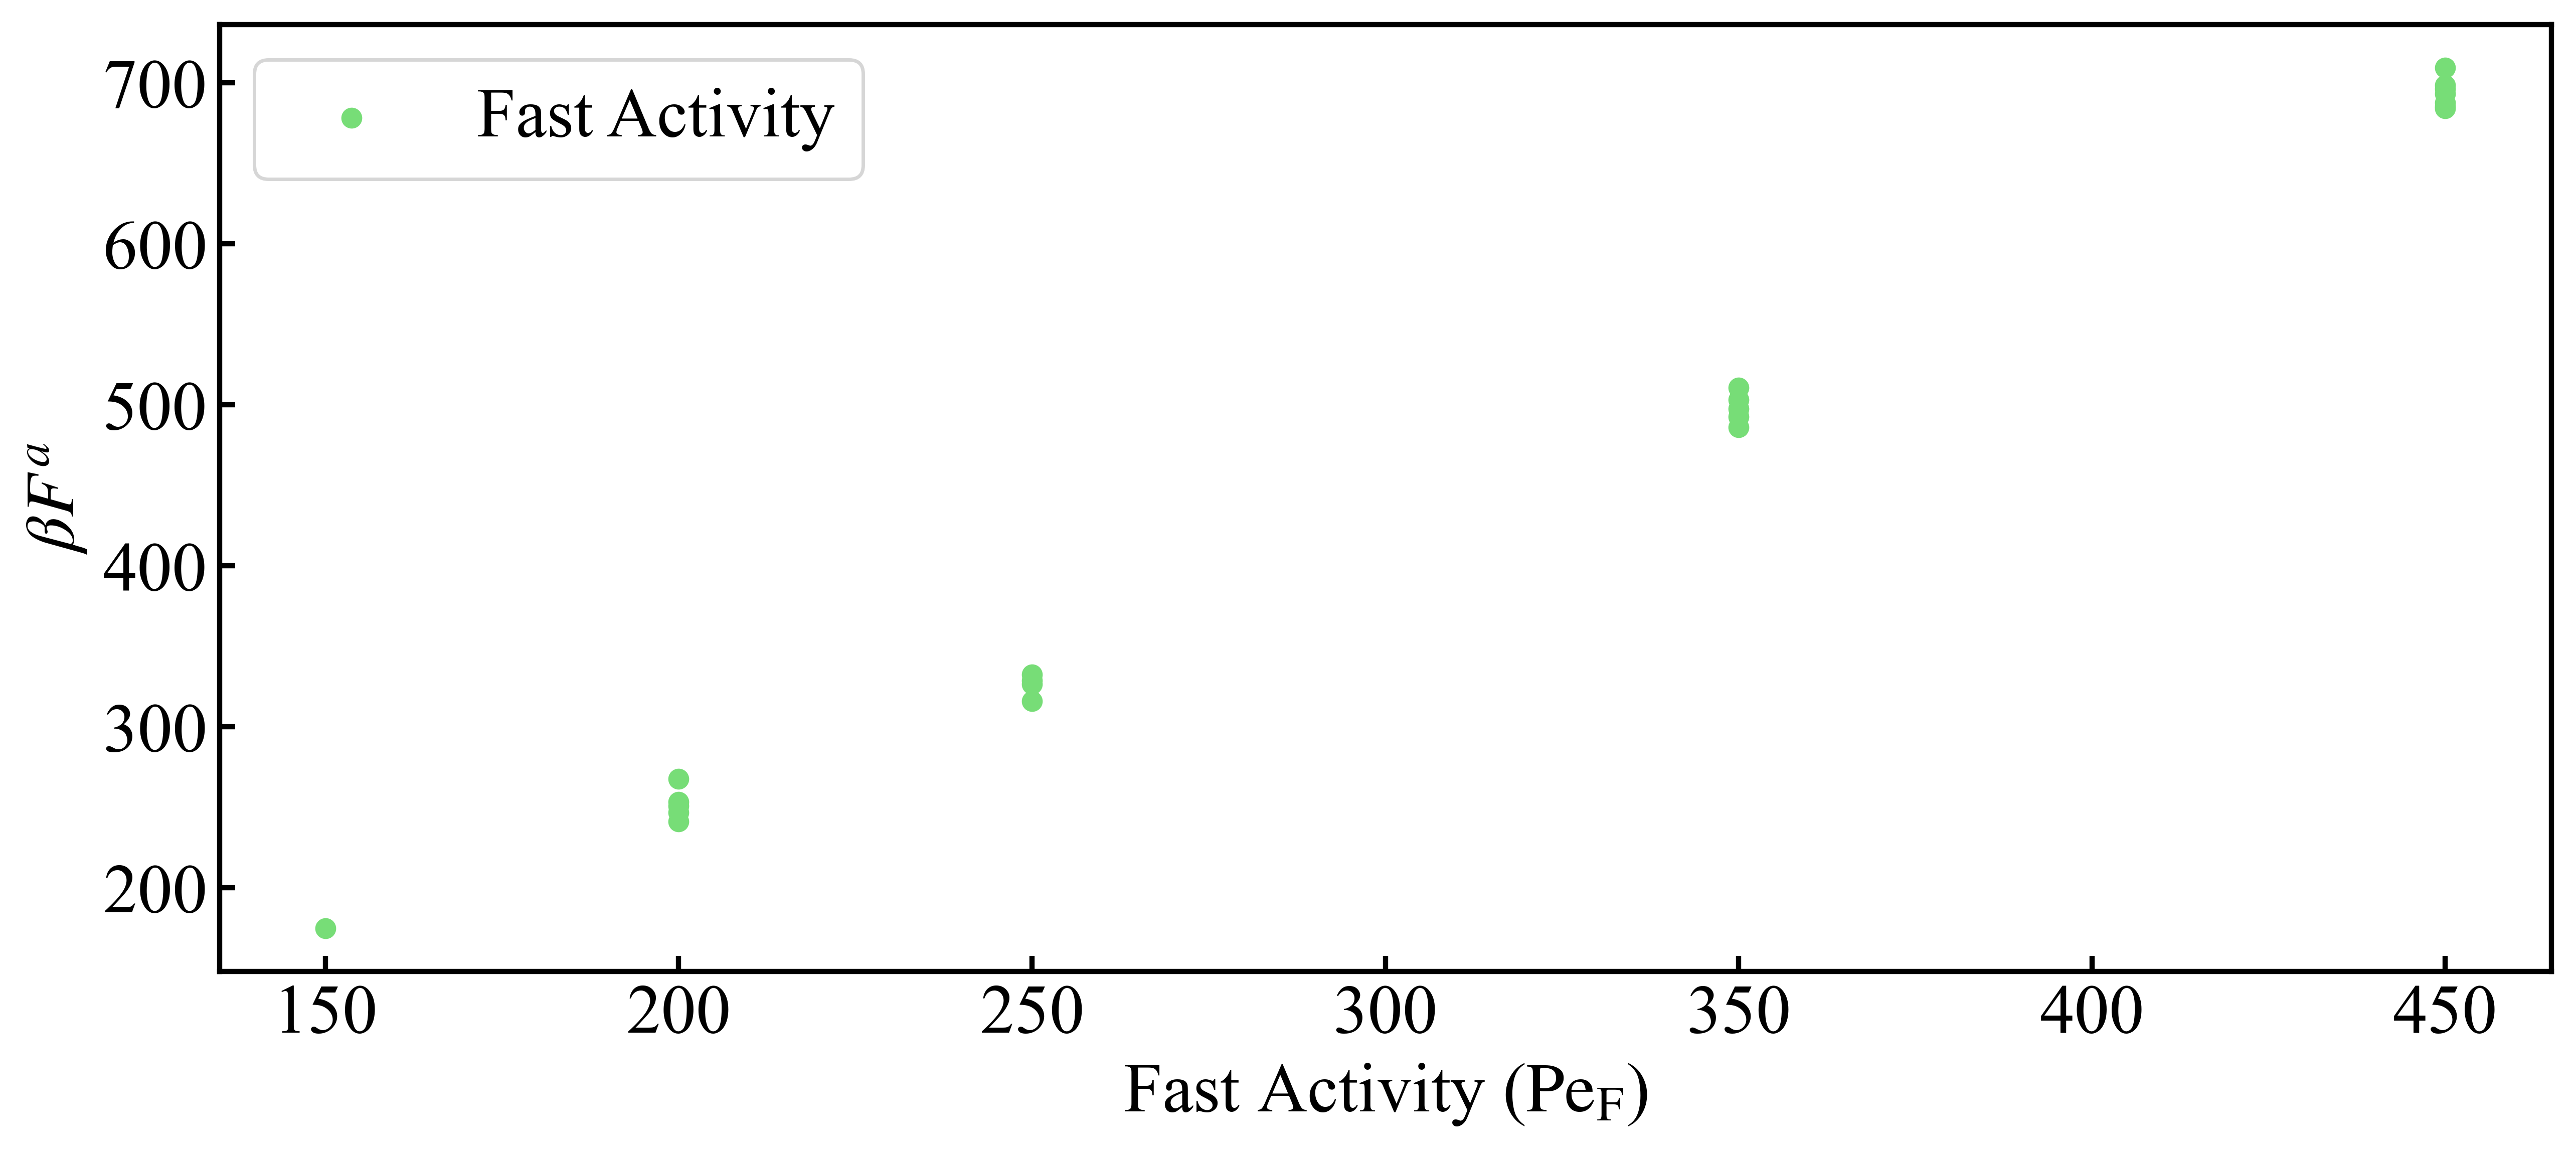

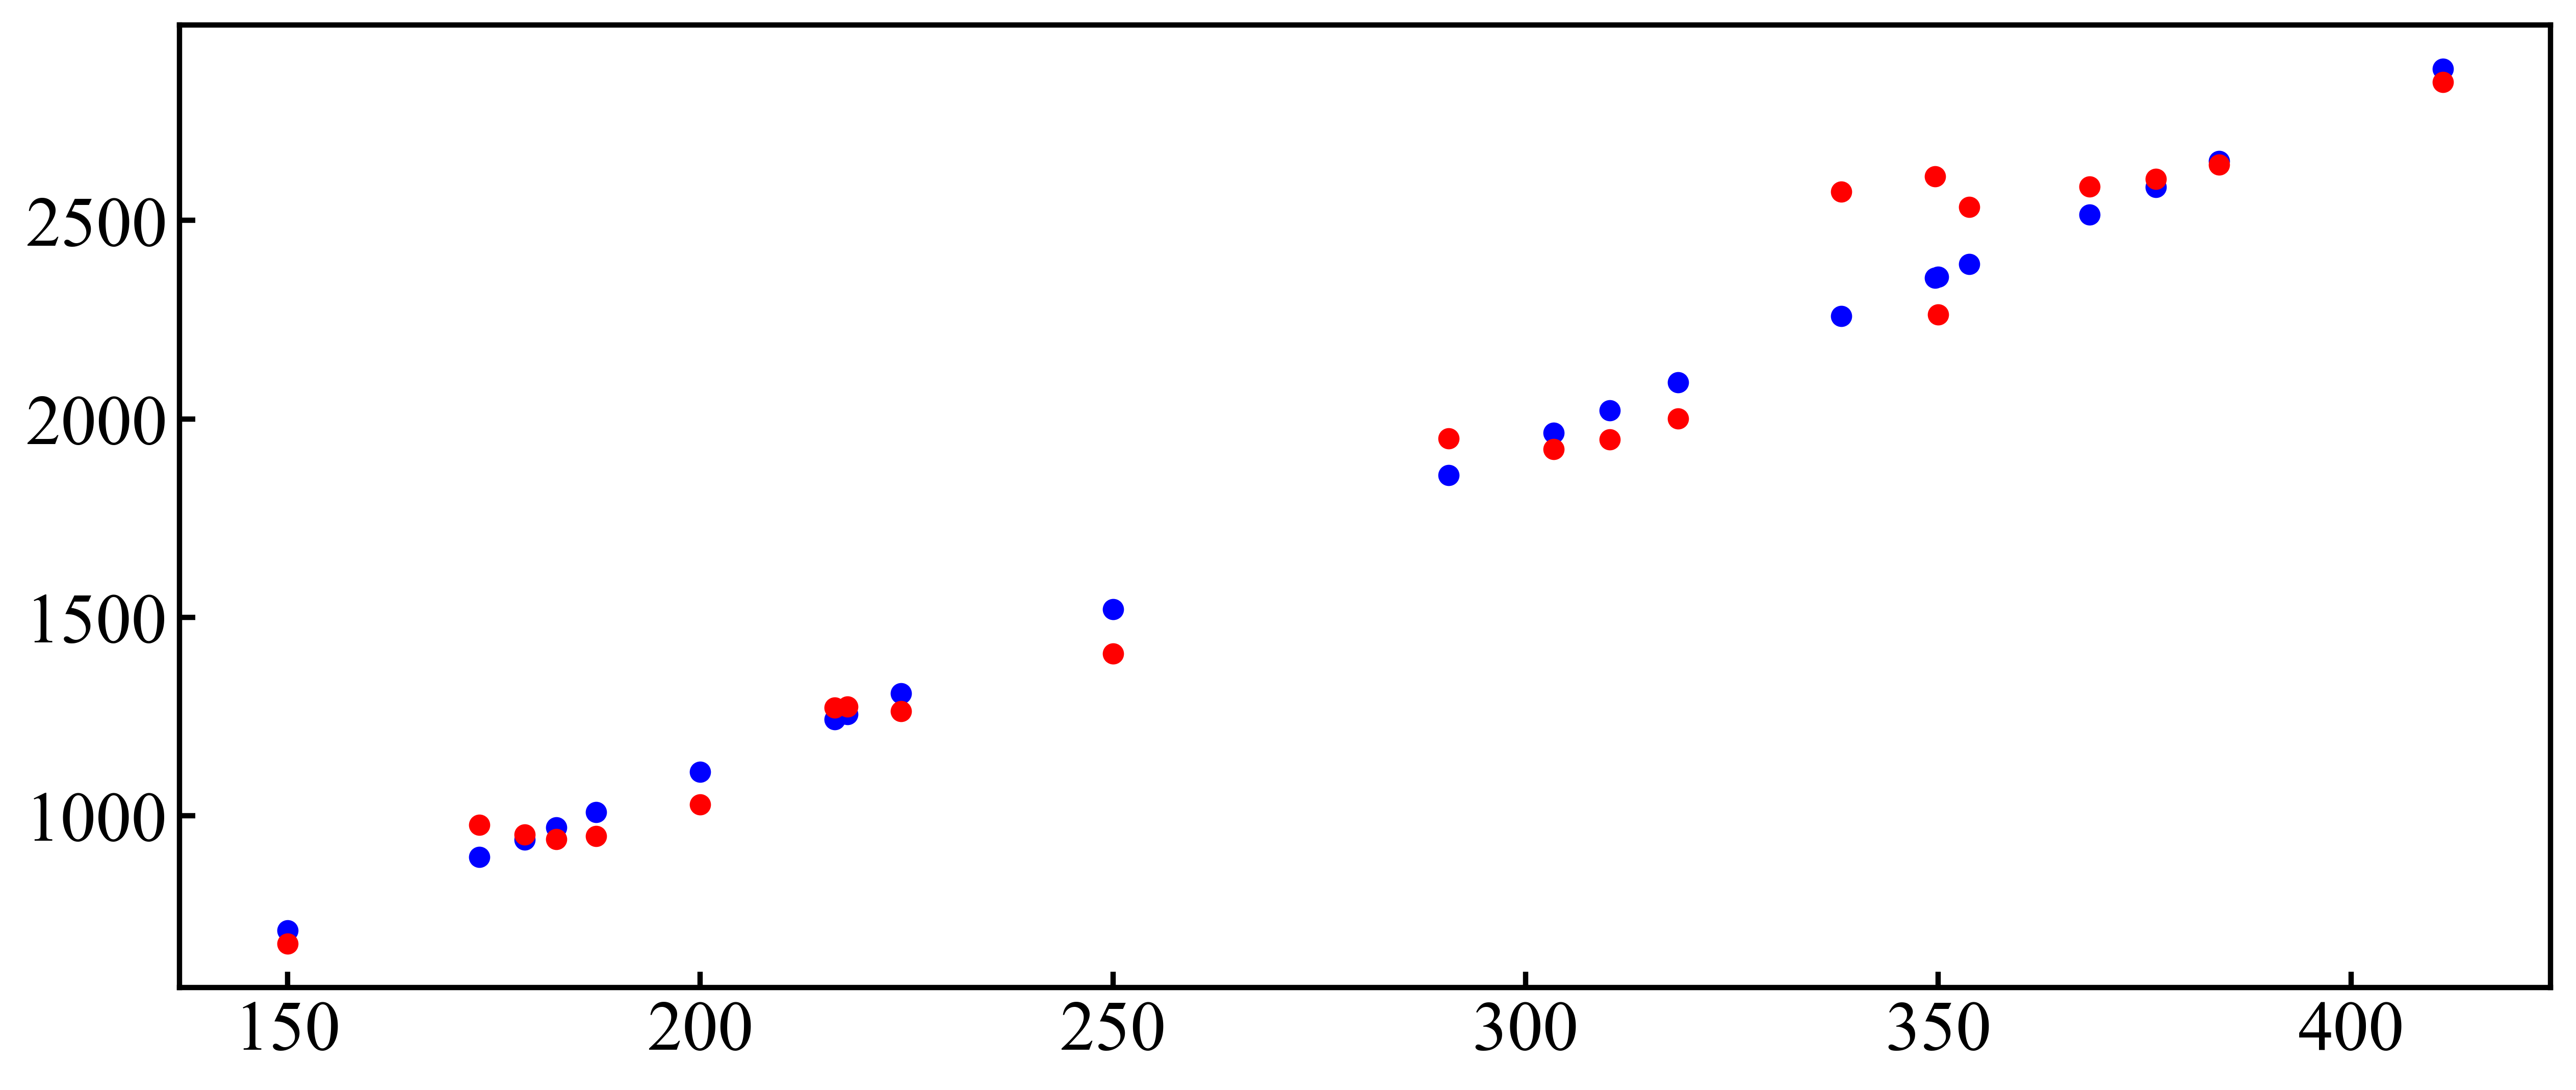

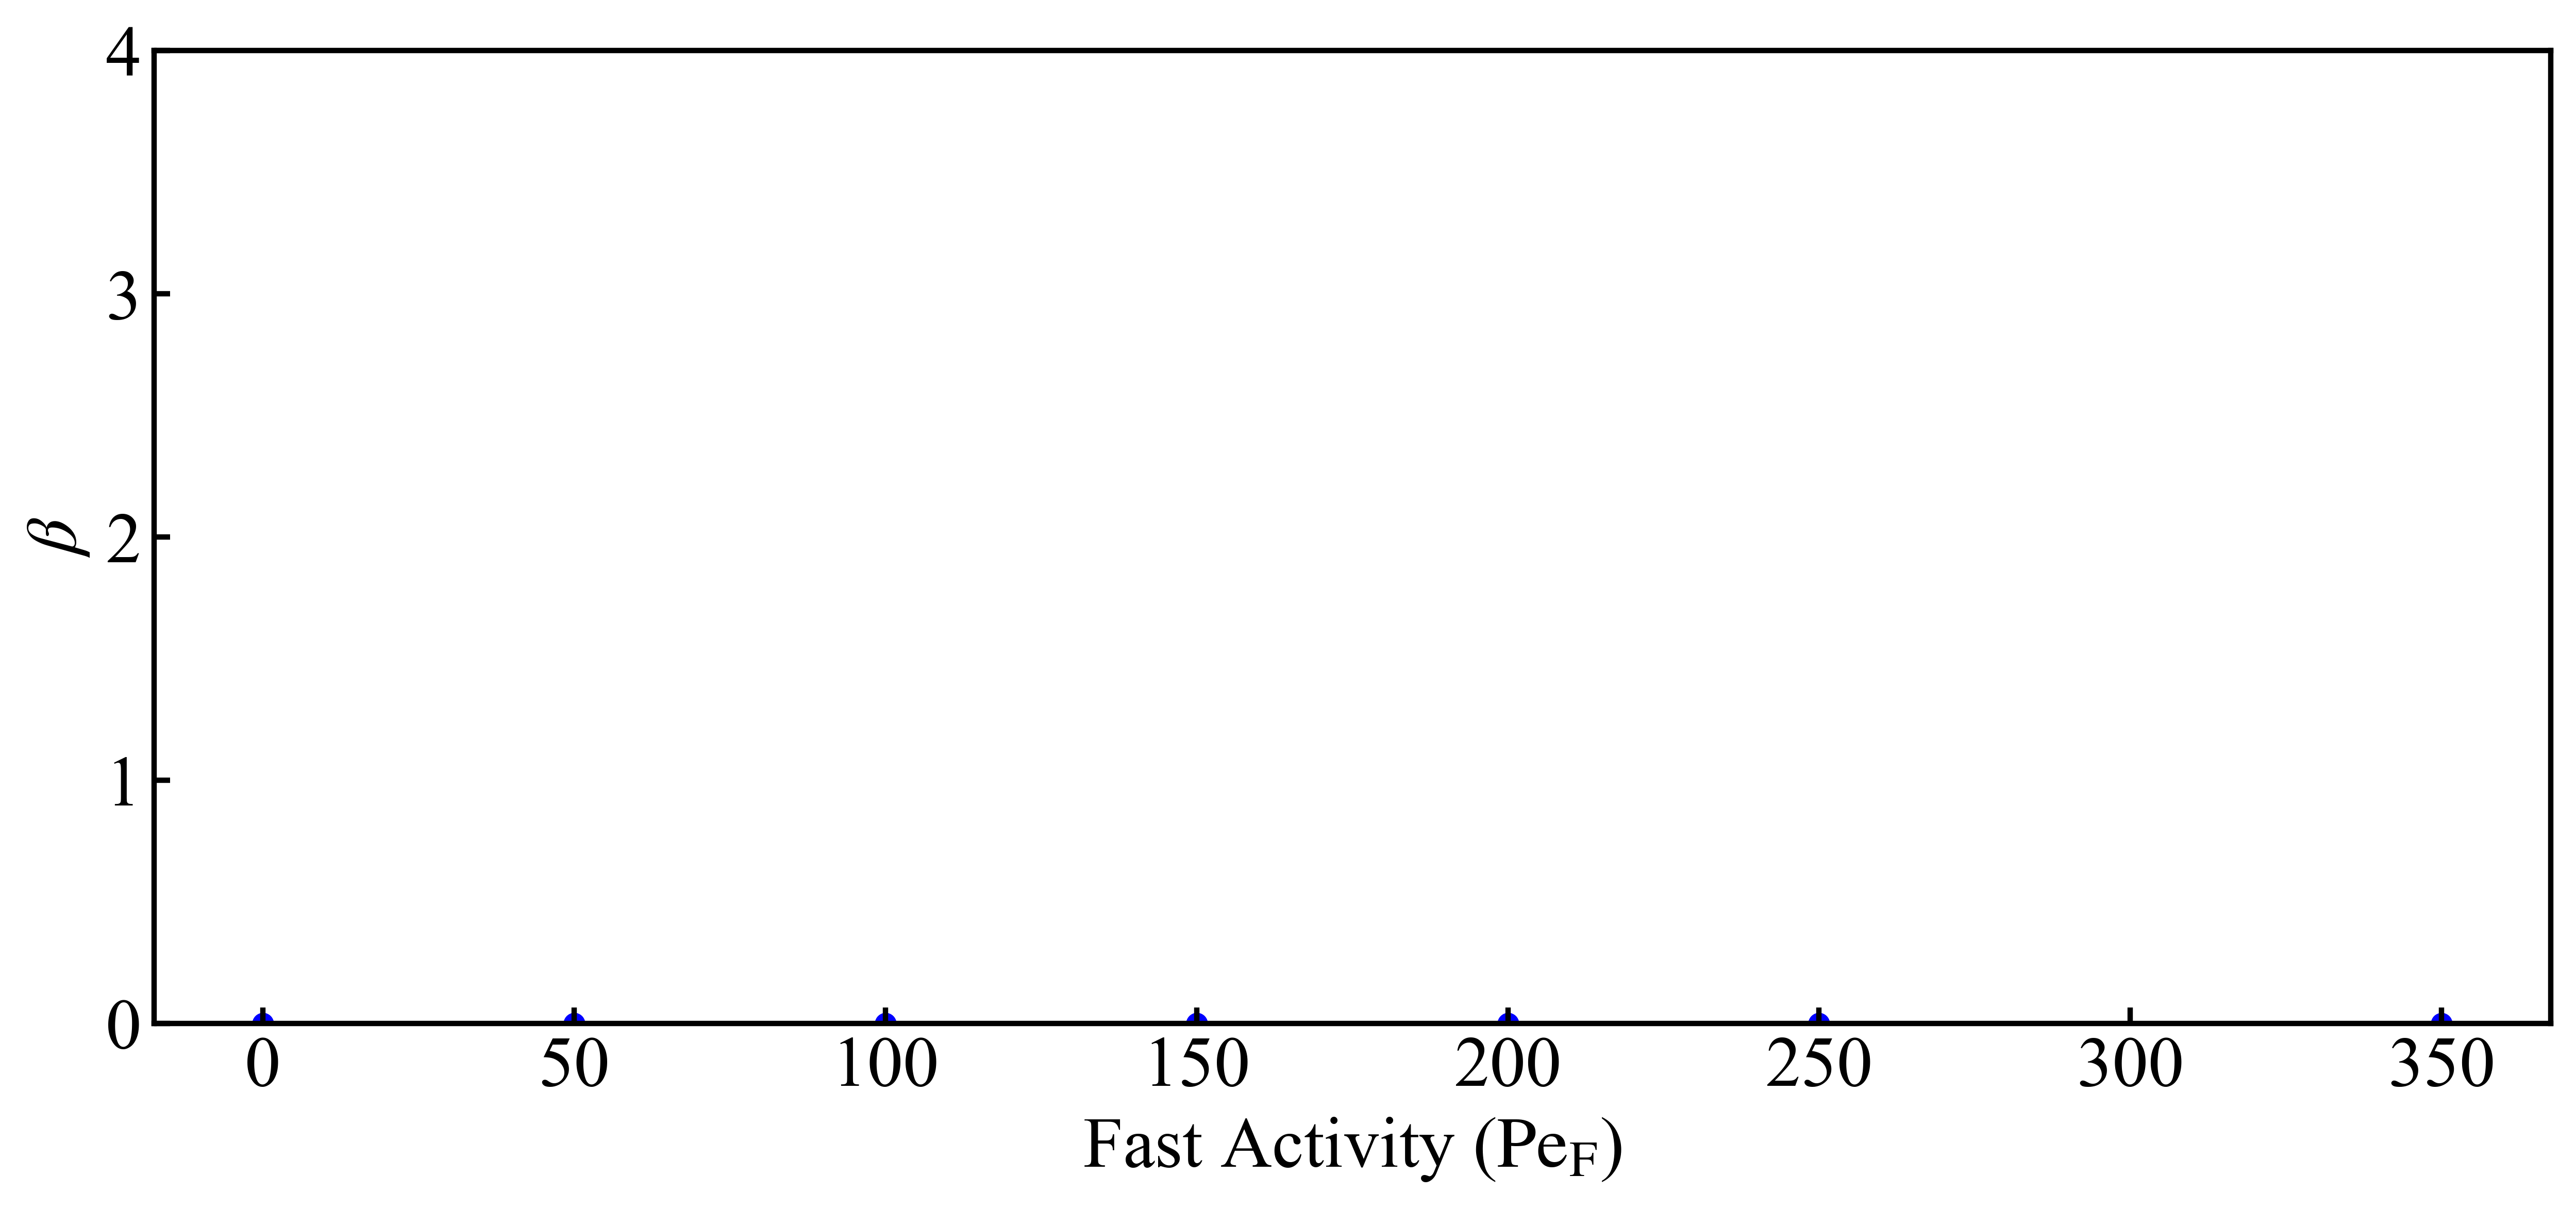

In [118]:
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])


        
        
phase_peA=np.array([])
phase_peB=np.array([])
phase_peRat=np.array([])
phase_peDif=np.array([])
phase_peNet=np.array([])
phase_xA=np.array([])
phase_eps=np.array([])
phase_pnum=np.array([])
phase_phi=np.array([])
avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_arr = np.array([])
beta_peNet = np.array([])
avg_shear=np.array([])
bulk_lat_mean = np.array([])
beta_arr2 = np.array([])
int_lat_mean = np.array([])
all_lat_mean = np.array([])
beta_arr2_std = np.array([])

avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])

avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_final_arr=np.array([])
time_arr3 = np.array([])

def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.874#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
beta_test_arr = np.array([])
for n in range(0, len(all_pres_new)):
    if params3['peA'][n]!=450:
        time_arr3 = np.array([])
        bulk_nA_arr = np.array([])
        bulk_nB_arr = np.array([])
        bulk_n_arr = np.array([])
        int_n_arr = np.array([])
        int_nA_arr = np.array([])
        int_nB_arr = np.array([])
        gas_nA_arr = np.array([])
        gas_nB_arr = np.array([])
        dense_nA_arr = np.array([])
        dense_nB_arr = np.array([])
        dense_n_arr = np.array([])

        for j in range(0, len(all_pres_new[n]['clust_size'])):
            #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                bin_size = all_pres_new[n]['sizeBin'][j]
                bin_area = bin_size**2
                time_arr3 = np.append(time_arr3, all_pres_new[n]['tauB'][j])
                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new[n]['Na_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new[n]['Nb_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new[n]['Nb_bulk'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
                int_n_arr = np.append(int_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]) / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nA_arr = np.append(int_nA_arr, all_pres_new[n]['Na_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                int_nB_arr = np.append(int_nB_arr, all_pres_new[n]['Nb_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
                gas_nA_arr = np.append(gas_nA_arr, all_pres_new[n]['Na_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                gas_nB_arr = np.append(gas_nB_arr, all_pres_new[n]['Nb_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
                dense_n_arr = np.append(dense_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Na_bulk'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))

        for i in range(0, len(all_pres)):
            if params3['peA'][n]==params2['peA'][i]:
                if params3['peB'][n]==params2['peB'][i]:
                    bulk_press_total = 0
                    bulk_press_total_expand = 0
                    bulk_press_vals=0
                    time_arr = np.array([])
                    press_arr = np.array([])
                    shear_press_expand=0
                    # Don't plot non-phase-separated data
                    if all_pres[i].empty:
                            continue


                    max_size = np.amax(all_pres[i]['NDense'])
                    for j in range(0, len(all_pres[i]['NDense'])):
                        #if all_pres[i]['NDense'][j]>=0.95*max_size:

                            time_arr = np.append(time_arr, all_pres[i]['Timestep'][j])
                            bulk_trace = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                            bulk_press = bulk_trace / (all_pres[i]['bulkArea'].iloc[j])

                            bulk_trace_expand = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2
                            bulk_press_expand = bulk_trace_expand / (all_pres[i]['bulkArea'].iloc[j])

                            shear_stress = (all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j])/2
                            shear_press = shear_stress / (all_pres[i]['bulkArea'].iloc[j])
                            press_arr = np.append(press_arr, bulk_press/2)

                            if bulk_press > 0:
                                shear_press_expand +=shear_press
                                bulk_press_total += bulk_press
                                bulk_press_total_expand += bulk_press_expand
                                bulk_press_vals += 1
                    if bulk_press_vals > 0:        
                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                        
                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                        interpart_peA=np.append(interpart_peA, params2['peA'][i])
                        interpart_peB=np.append(interpart_peB, params2['peB'][i])
                        interpart_peNet=np.append(interpart_peNet, params2['peB'][i] * (1-params2['xA'][i]/100) + params2['peA'][i] * (params2['xA'][i]/100))
                        interpart_xA=np.append(interpart_xA, params2['xA'][i])
                        interpart_phi=np.append(interpart_phi, params2['phi'][i])
                        interpart_eps=np.append(interpart_eps, params2['eps'][i])

                    for k in range(0, len(all_pres_new2)):

                        # Don't plot non-phase-separated data
                        if all_pres_new2[k].empty:
                                continue

                        if params4['peA'][k]==params2['peA'][i]:
                            if params4['peB'][k]==params2['peB'][i]:
                                if params4['peA'][k]!=450:
                                    time_arr2 = np.array([])
                                    

                                    max_size = np.amax(all_pres_new2[k]['clust_size'])
                                    bulk_lat_arr = np.array([])
                                    int_lat_arr = np.array([])
                                    all_lat_arr = np.array([])

                                    for j in range(0, len(all_pres_new2[k]['clust_size'])):
                                        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                                            bin_size = all_pres_new2[k]['sizeBin'][j]
                                            bin_area = bin_size**2
                                            time_arr2 = np.append(time_arr2, all_pres_new2[k]['tauB'][j])
                                            bulk_lat_arr = np.append(bulk_lat_arr, all_pres_new2[k]['lat_mean_bulk'][j])
                                            all_lat_arr = np.append(all_lat_arr, all_pres_new2[k]['lat_mean_all'][j])
                                            int_lat_arr = np.append(int_lat_arr, all_pres_new2[k]['lat_mean_int'][j])
                                    time_ids = np.intersect1d(time_arr, time_arr2, return_indices=True)
                                    time_ids_press = time_ids[0].astype(int)
                                    time_ids_lat = time_ids[1].astype(int)
                                    
                                    '''
                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                    plt.plot(time_arr2, bulk_lat_arr/np.max(bulk_lat_arr), '-', color='blue', label='Bulk',lw=1.8*1.8)
                                    plt.plot(time_arr2, int_lat_arr/np.max(int_lat_arr), '-', color='red', label='Interface',lw=1.8*1.8)
                                    # Set all the x ticks for radial plots
                                    loc = ticker.MultipleLocator(base=10)
                                    ax1.xaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=5)
                                    ax1.xaxis.set_minor_locator(loc)
                                   # Set y ticks
                                    loc = ticker.MultipleLocator(base=0.1)
                                    ax1.yaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=0.05)
                                    ax1.yaxis.set_minor_locator(loc)


                                    ax1.tick_params(axis='x', labelsize=26)
                                    ax1.tick_params(axis='y', labelsize=26)
                                    ax1.set_xlabel(r'Time ($x=\tau$)', fontsize=32)
                                    ax1.set_ylabel(r'Number Density ($n$)', fontsize=32)
                                    #ax1.set_ylim([-0.05,1.05])
                                    props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                    #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                    #           transform=ax1.transAxes,
                                    #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                    plt.legend(loc='upper right', fontsize=28)
                                    plt.tight_layout()
                                    plt.show()
                                    '''

                                    
                                    time_ids = np.intersect1d(time_ids_press, time_arr3, return_indices=True)
                                    time_ids_pres2 = time_ids[0].astype(int)
                                    time_ids_dens = time_ids[1].astype(int)
                                    #beta_plot = press_arr[time_ids_press][time_ids_pres2]/(2*np.sqrt(3)*(((dense_nA_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peA[-1] + (dense_nB_arr[time_ids_dens]/dense_n_arr[time_ids_dens]) * phase_peB[-1])-50)/bulk_lat_arr[time_ids_lat][time_ids_pres2])
                                    if np.max(time_ids_lat[time_ids_pres2])>150:
                                        interpart_press=np.append(interpart_press, avg_press)
                                        avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                        avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                        avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
                                        avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))

                                        avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                        avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
                                        avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                        avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
                                        avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                        avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                        avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

        
                                        bulk_lat_mean = np.append(bulk_lat_mean, np.mean(bulk_lat_arr))
                                        all_lat_mean = np.append(all_lat_mean, np.mean(all_lat_arr))
                                        int_lat_mean = np.append(int_lat_mean, np.mean(int_lat_arr))
                                    
                                        phase_peA=np.append(phase_peA, params4['peA'][k])
                                        phase_peB=np.append(phase_peB, params4['peB'][k])
                                        phase_peDif=np.append(phase_peDif, params4['peB'][k]-params4['peA'][k])
                                        phase_peRat=np.append(phase_peRat, params4['peA'][k]/params4['peB'][k])

                                        phase_peNet=np.append(phase_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))
                                        phase_xA=np.append(phase_xA, params4['xA'][k])
                                        phase_phi=np.append(phase_phi, params4['phi'][k])
                                        phase_eps=np.append(phase_eps, params4['eps'][k])

                                        beta_plot = press_arr[time_ids_press][time_ids_pres2]/(2*np.sqrt(3)/bulk_lat_arr[time_ids_lat][time_ids_pres2])

                                        beta_test_arr = np.append(beta_test_arr, beta_plot[-1]) 
                                        #plt.plot(time_arr, press_arr/np.max(press_arr), '-', color='green', label='Press',lw=1.8*1.8)
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        plt.plot(time_ids_lat[time_ids_pres2], beta_plot, '-', color='green', label='Press',lw=1.8*1.8)

                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=5)
                                        ax1.xaxis.set_minor_locator(loc)
                                        # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.5)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.25)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($x=\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'Number Density ($n$)', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=28)
                                        plt.tight_layout()
                                        plt.show()
                                        '''

                                        beta2 = ((24/phase_peB[-1]) * (2*(1.0/bulk_lat_arr)**13 - (1.0/bulk_lat_arr)**7))
                                        print(np.mean(beta2))
                                        ymin = np.mean(beta2)-1
                                        ymax=np.mean(beta2)+1
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        lat_theory = np.zeros(len(time_arr3))
                                        for p in range(0, len(time_arr3)):
                                            lat_theory[p] = conForRClust((((dense_nA_arr[p]/dense_n_arr[p]) * phase_peA[-1] + (dense_nB_arr[p]/dense_n_arr[p]) * phase_peB[-1])), 1.0)
                                            #lat_theory[p] = getLat(phase_peB[-1], 1.0)
                                        #y_arr_now = np.ones(2) * lat_theory
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        plt.plot(time_arr2, bulk_lat_arr, '-', linewidth=1.8*1.8, color='blue', label='Simulation')
                                        plt.plot(time_arr3, lat_theory, '--', linewidth=1.8*1.8, color='black', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'lattice spacing ($a$)', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='lower right', fontsize=22)
                                        ax1.set_ylim([0,1.0])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        '''
                                        xy, x_ind, y_ind = np.intersect1d(time_arr2, time_arr3, return_indices=True)
                                        #x_test = (((dense_nA_arr[y_ind]/dense_n_arr[y_ind]) * phase_peA[-1] + (dense_nB_arr[y_ind]/dense_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        x_test = (((int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1])-50)/bulk_lat_arr[x_ind]
                                        from scipy.optimize import curve_fit
                                        def func(x, m):
                                            return   x * 2.0 * m *np.sqrt(3)

                                        xy2, x_ind2, y_ind2 = np.intersect1d(time_arr2[x_ind], time_arr, return_indices=True)

                                        popt, pcov = curve_fit(func, x_test, press_arr[y_ind2])
                                        beta_final_arr = np.append(beta_final_arr, popt[0])
                                        '''
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        plt.plot(time_arr, press_arr, '-', color='green', label='Simulation',lw=1.8*1.8)
                                        #plt.plot(time_arr2, beta2/np.mean(beta2), '-', color='purple', label=r'$\Pi_\mathrm{d}$',lw=1.8*1.8)
                                        plt.plot(time_arr2[x_ind], func(x_test, *popt), '-', linewidth=1.8*1.8, color='blue', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'$\Pi_\mathrm{d}$', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=22)
                                        #ax1.set_ylim([0,1.4])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        
                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                        x_arr = np.array([0, 200])
                                        y_arr = np.ones(2)
                                        print(params2['peA'][i])
                                        print(params2['peB'][i])
                                        #plt.plot(time_arr2, beta2/np.mean(beta2), '-', color='purple', label=r'$\Pi_\mathrm{d}$',lw=1.8*1.8)
                                        plt.plot(time_arr2[x_ind], (((int_nA_arr[y_ind]/int_n_arr[y_ind]) * phase_peA[-1] + (int_nB_arr[y_ind]/int_n_arr[y_ind]) * phase_peB[-1])-50), '-', linewidth=1.8*1.8, color='blue', label='Theory')
                                        #plt.plot(x_arr, y_arr, '--', color='black', lw=1.8*1.8)
                                        #plt.plot(x_arr, y_arr2, '--', color='green', lw=1.8*1.8)
                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)
                                       # Set y ticks
                                        #loc = ticker.MultipleLocator(base=0.2)
                                        #ax1.yaxis.set_major_locator(loc)
                                        #loc = ticker.MultipleLocator(base=0.1)
                                        #ax1.yaxis.set_minor_locator(loc)


                                        ax1.tick_params(axis='x', labelsize=26)
                                        ax1.tick_params(axis='y', labelsize=26)
                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=32)
                                        ax1.set_ylabel(r'$\mathrm{Pe}_\mathrm{int}$', fontsize=32)
                                        #ax1.set_ylim([-0.05,1.05])
                                        props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
                                        #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
                                        #           transform=ax1.transAxes,
                                        #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
                                        plt.legend(loc='upper right', fontsize=22)
                                        ax1.set_ylim([0,500])
                                        ax1.set_xlim([0, 200])
                                        #plt.ylim([ymin,ymax])
                                        plt.tight_layout()
                                        plt.show()
                                        '''

                                        beta_arr = np.append(beta_arr, interpart_press[-1]/(2*np.sqrt(3)*interpart_peNet[-1]/bulk_lat_mean[-1]))
                                        beta_arr2 = np.append(beta_arr2, np.mean(beta2))
                                        std_sum = 0
                                        std_num =0
                                        for o in range(0, len(bulk_lat_arr)):
                                            std_sum +=(bulk_lat_arr[o]-bulk_lat_mean[-1])**2
                                            std_num +=1

                                        beta_arr2_std = np.append(beta_arr2_std, (std_sum/std_num)**0.5)
                                        beta_peNet=np.append(beta_peNet, params4['peB'][k] * (1-params4['xA'][k]/100) + params4['peA'][k] * (params4['xA'][k]/100))

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(phase_peB, beta_test_arr, color=green, s=25.0, label='Fast Activity')
plt.ylabel(r'$\beta F^a$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
#plt.scatter((((avg_bulk_nA/avg_bulk_n) * phase_peA + (avg_bulk_nB/avg_bulk_n) * phase_peB)), beta_test_arr, color=green, s=25.0, label='bulk')
plt.legend(loc='upper left')
#ax1.set_ylim([0.0,1.0])
plt.show()
lat_theory_mean_int = np.zeros(len(phase_peNet))
lat_theory_mean_bulk = np.zeros(len(phase_peNet))

lat_theory_mean_dense = np.zeros(len(phase_peNet))

dense_pe_net = np.zeros(len(phase_peNet))
bulk_pe_net = np.zeros(len(phase_peNet))
int_pe_net = np.zeros(len(phase_peNet))

beta_theory = np.zeros(len(phase_peNet))
beta_theory2 = np.zeros(len(phase_peNet))

beta_theory3 = np.zeros(len(phase_peNet))
beta_theory4 = np.zeros(len(phase_peNet))
press_theory = np.zeros(len(phase_peNet))
div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
for p in range(0, len(phase_peNet)):
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * phase_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * phase_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * phase_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * phase_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * phase_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * phase_peB[p]))
    lat_theory_mean_int[p] = conForRClust(int_pe_net[p]-50, 1.0)

    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874/lat_theory_mean_int[p]
fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(int_pe_net, press_theory, color='blue', s=25.0)
plt.scatter(int_pe_net, interpart_press, color='red', s=25.0)
plt.ylabel(r'$\Pi_\mathrm{d}$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
#ax1.set_ylim([0.0,1.0])
plt.show()

fig, ax1 = plt.subplots(figsize=(12,5))
plt.scatter(phase_peA, beta_theory, color='blue', s=25.0)
plt.ylabel(r'$\beta$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')
plt.ylim([0,4.0])

plt.show()


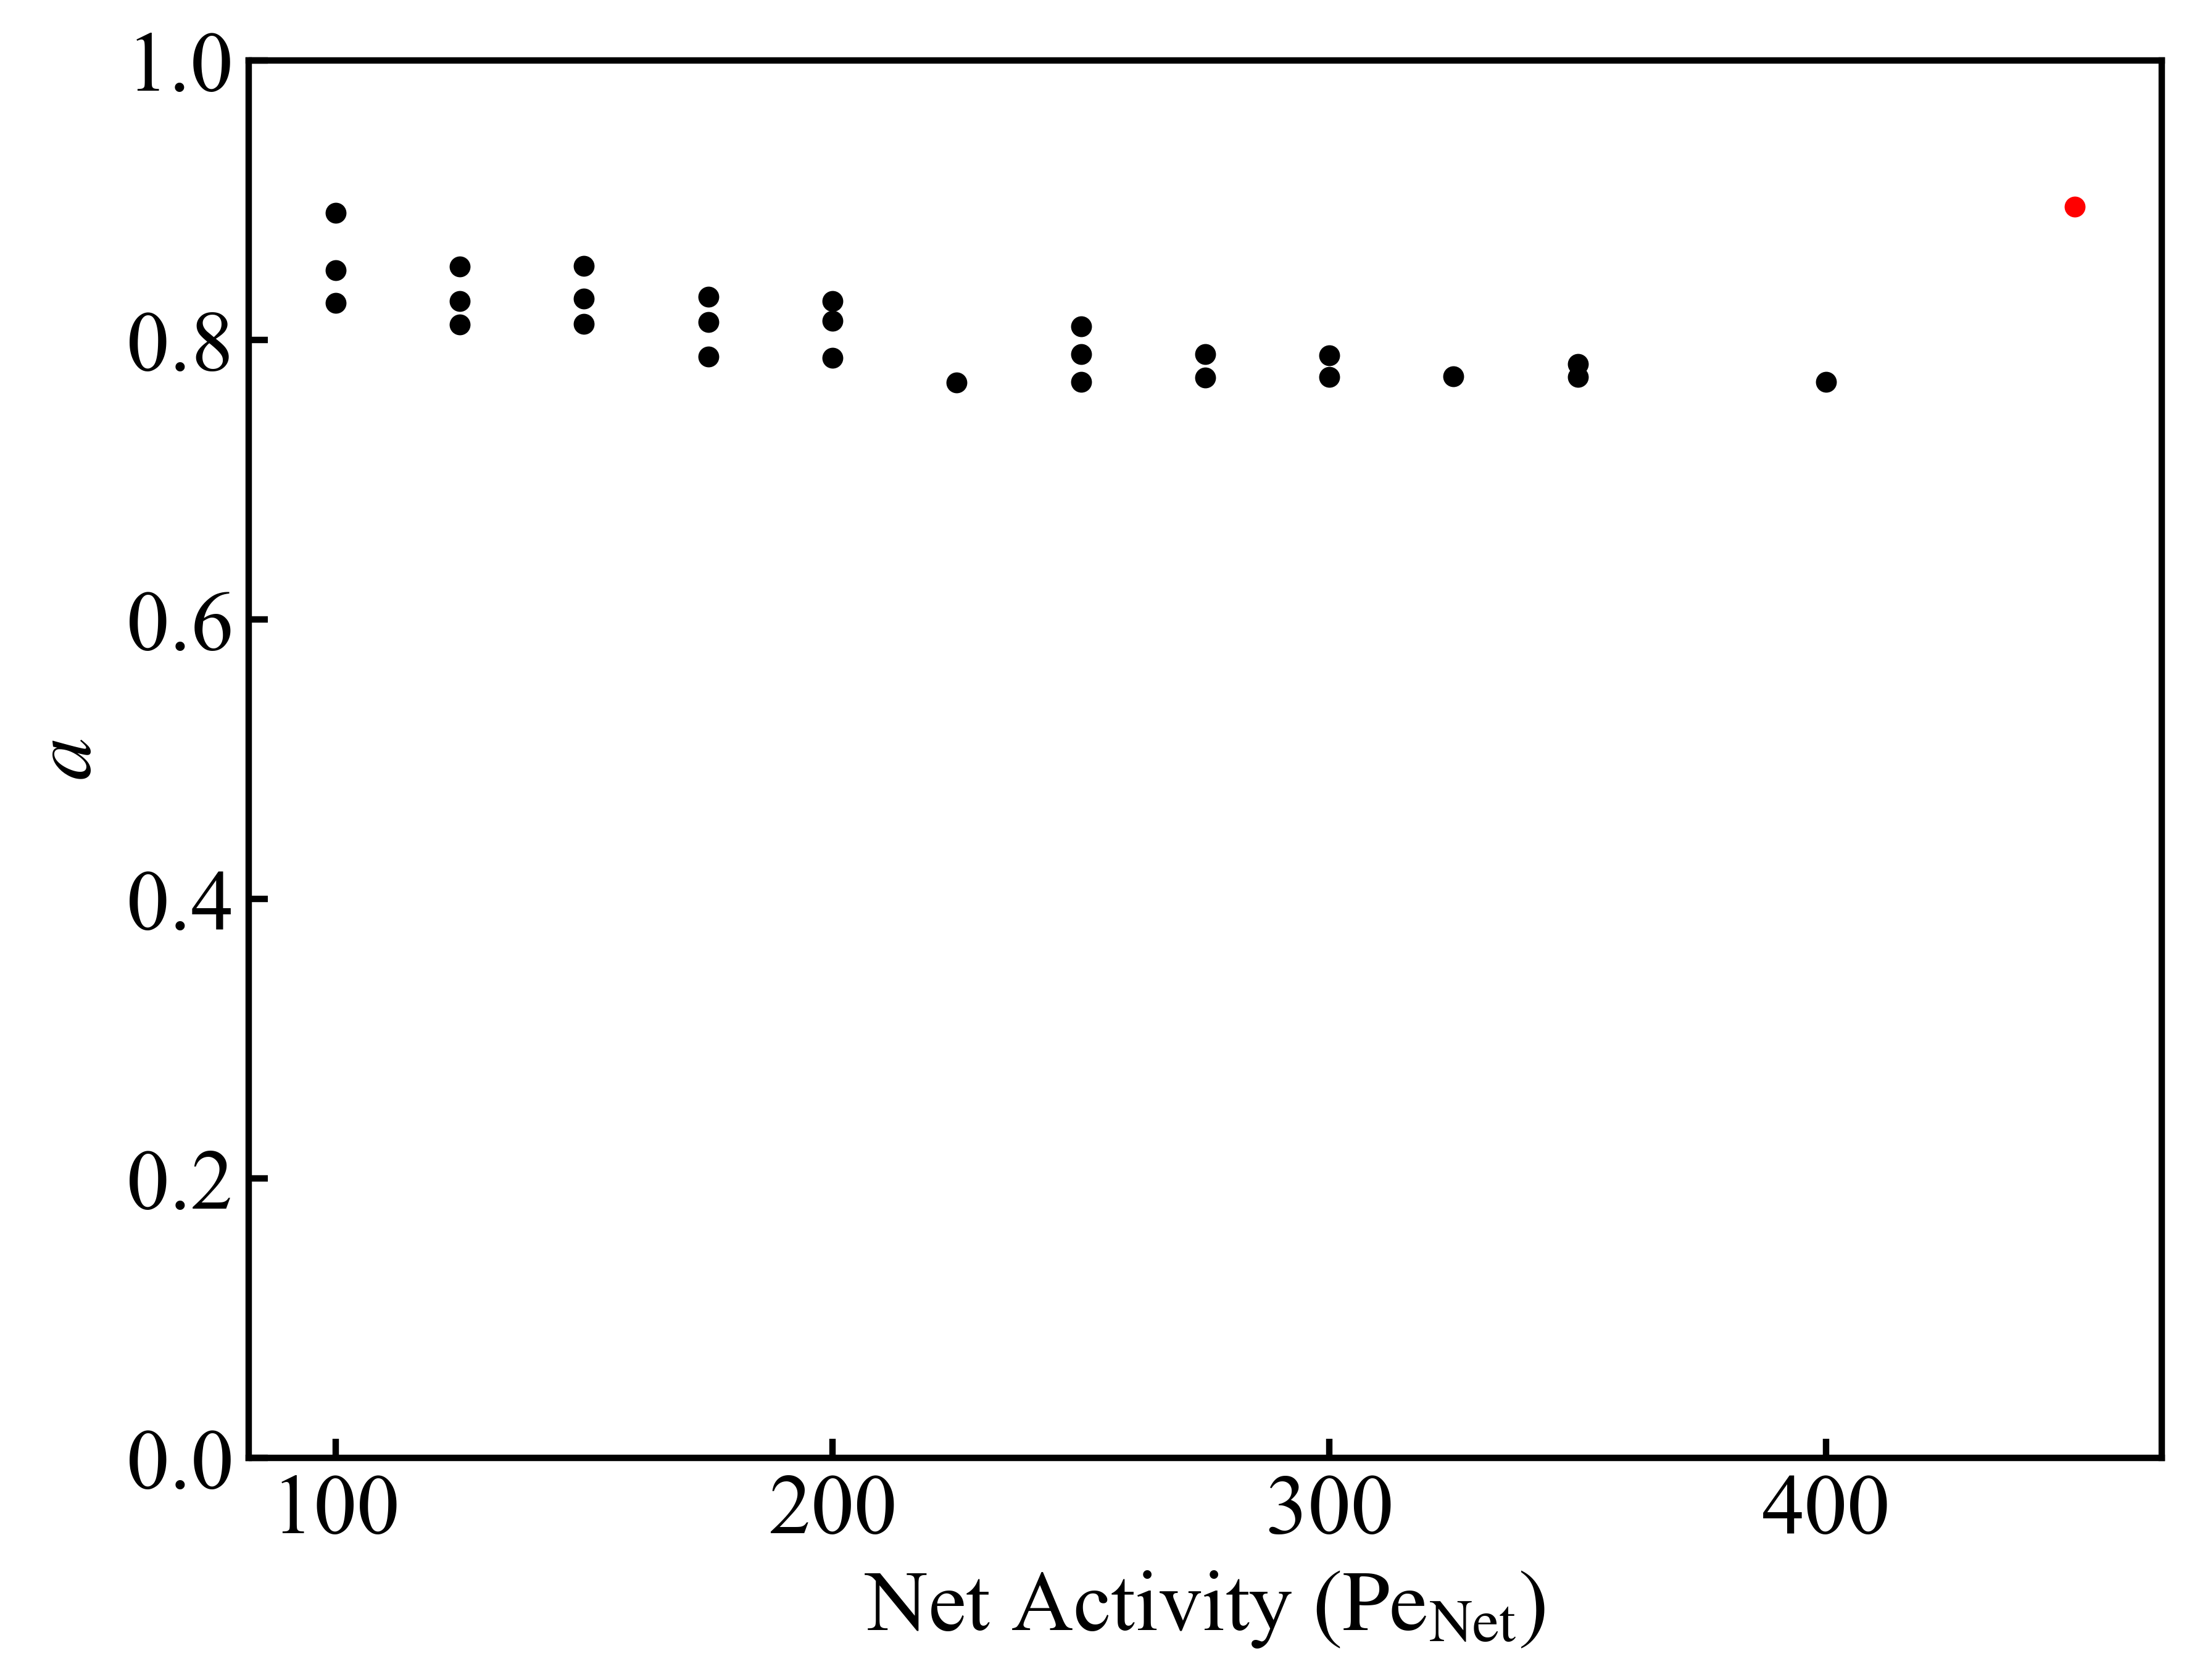

IndexError: index 0 is out of bounds for axis 0 with size 0

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(phase_peNet, bulk_lat_mean, s=15.0, color='black')
plt.scatter(450, ((np.pi/(2*np.sqrt(3)))/(1.440*(np.pi/4)))**0.5, s=15.0, color='red')
#plt.scatter(phase_peNet, (3.*np.sqrt(3)*phase_peB)/interpart_press, s=15.0, color='green')

plt.ylabel(r'$a$')
plt.ylim([0,1.0])
plt.xlabel(r'Net Activity ($\mathrm{Pe}_\mathrm{Net}$)')

plt.show()
remove = np.where((phase_peNet!=450))[0]

from scipy.optimize import curve_fit
def func(x, m, b):
    return m * x + b

popt, pcov = curve_fit(func, phase_peDif[remove], beta_final_arr[remove])
print(popt)
plt.figure(figsize=(8,6))
plt.scatter(phase_peDif[remove], beta_final_arr[remove], s=15.0, color='black')
plt.plot(phase_peDif[remove], func(phase_peDif[remove], *popt), '-', color='black', linewidth=1.8*1.8, label=r'$\beta=1.69 + \mathrm{Pe}_\mathrm{Dif}\times 4.788E-4$')

#plt.scatter(450, ((np.pi/(2*np.sqrt(3)))/(1.440*(np.pi/4)))**0.5, s=15.0, color='red')
#plt.scatter(phase_peNet, (3.*np.sqrt(3)*phase_peB)/interpart_press, s=15.0, color='green')

plt.ylabel(r'$\beta$')
plt.ylim([0,2.0])
plt.xlabel(r'Activity Difference ($\mathrm{Pe}_\mathrm{Fast}-\mathrm{Pe}_\mathrm{Slow}$)')

plt.show()
remove = np.where((phase_peDif==0) & (phase_peNet!=450))[0]
#beta = ((24/beta_peNet) * (2*(1.0/bulk_lat_mean)**13 - (1.0/bulk_lat_mean)**7))


test = np.where(phase_peA == phase_peB)[0]


from scipy.optimize import curve_fit
def func(x, m, b):
    return m * x + b

remove = np.where((phase_peNet!=450))[0]


popt, pcov = curve_fit(func, phase_peB[remove], beta_arr2[remove])
print(popt)
print(170/3.2)
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(phase_peB[remove], beta_arr2[remove], s=50, edgecolor='black', facecolor='none')
plt.plot(phase_peB[remove], func(phase_peB[remove], *popt), '-', color='black', linewidth=1.8*1.8, label=r'$\beta F^a=3.2(\mathrm{Pe}_\mathrm{Fast}-53)$')
plt.ylabel(r'$\beta$')
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)')

loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
# Set y ticks
loc = ticker.MultipleLocator(base=200)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=100)
ax1.yaxis.set_minor_locator(loc)


ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{Fast}$)', fontsize=32)
ax1.set_ylabel(r'$\beta F^a$', fontsize=32)
plt.legend(loc='upper left', fontsize=28)

plt.ylim([0, 1400])
plt.xlim([75, 475])
                            
plt.show()


remove = np.where((phase_peNet!=450))[0]


popt, pcov = curve_fit(func, phase_peB[remove], interpart_press[remove])
print(popt)
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(phase_peB[remove], interpart_press[remove], s=50, edgecolor='black', facecolor='none')
plt.plot(phase_peB[remove], func(phase_peB[remove], *popt), '-', color='black', linewidth=1.8*1.8, label=r'$\beta F^a=3.2\mathrm{Pe}_\mathrm{Fast}-170$')
plt.scatter(phase_peB[remove], 4*np.sqrt(3)*phase_peNet[remove]/bulk_lat_mean[remove], s=50, color='red')

loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
# Set y ticks
loc = ticker.MultipleLocator(base=200)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=100)
ax1.yaxis.set_minor_locator(loc)


ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Net Activity ($\mathrm{Pe}_\mathrm{Net}$)', fontsize=32)
ax1.set_ylabel(r'$\Pi_\mathrm{d}$', fontsize=32)
plt.legend(loc='upper left', fontsize=28)

#plt.ylim([0, 1400])
plt.xlim([75, 475])
                            
plt.show()





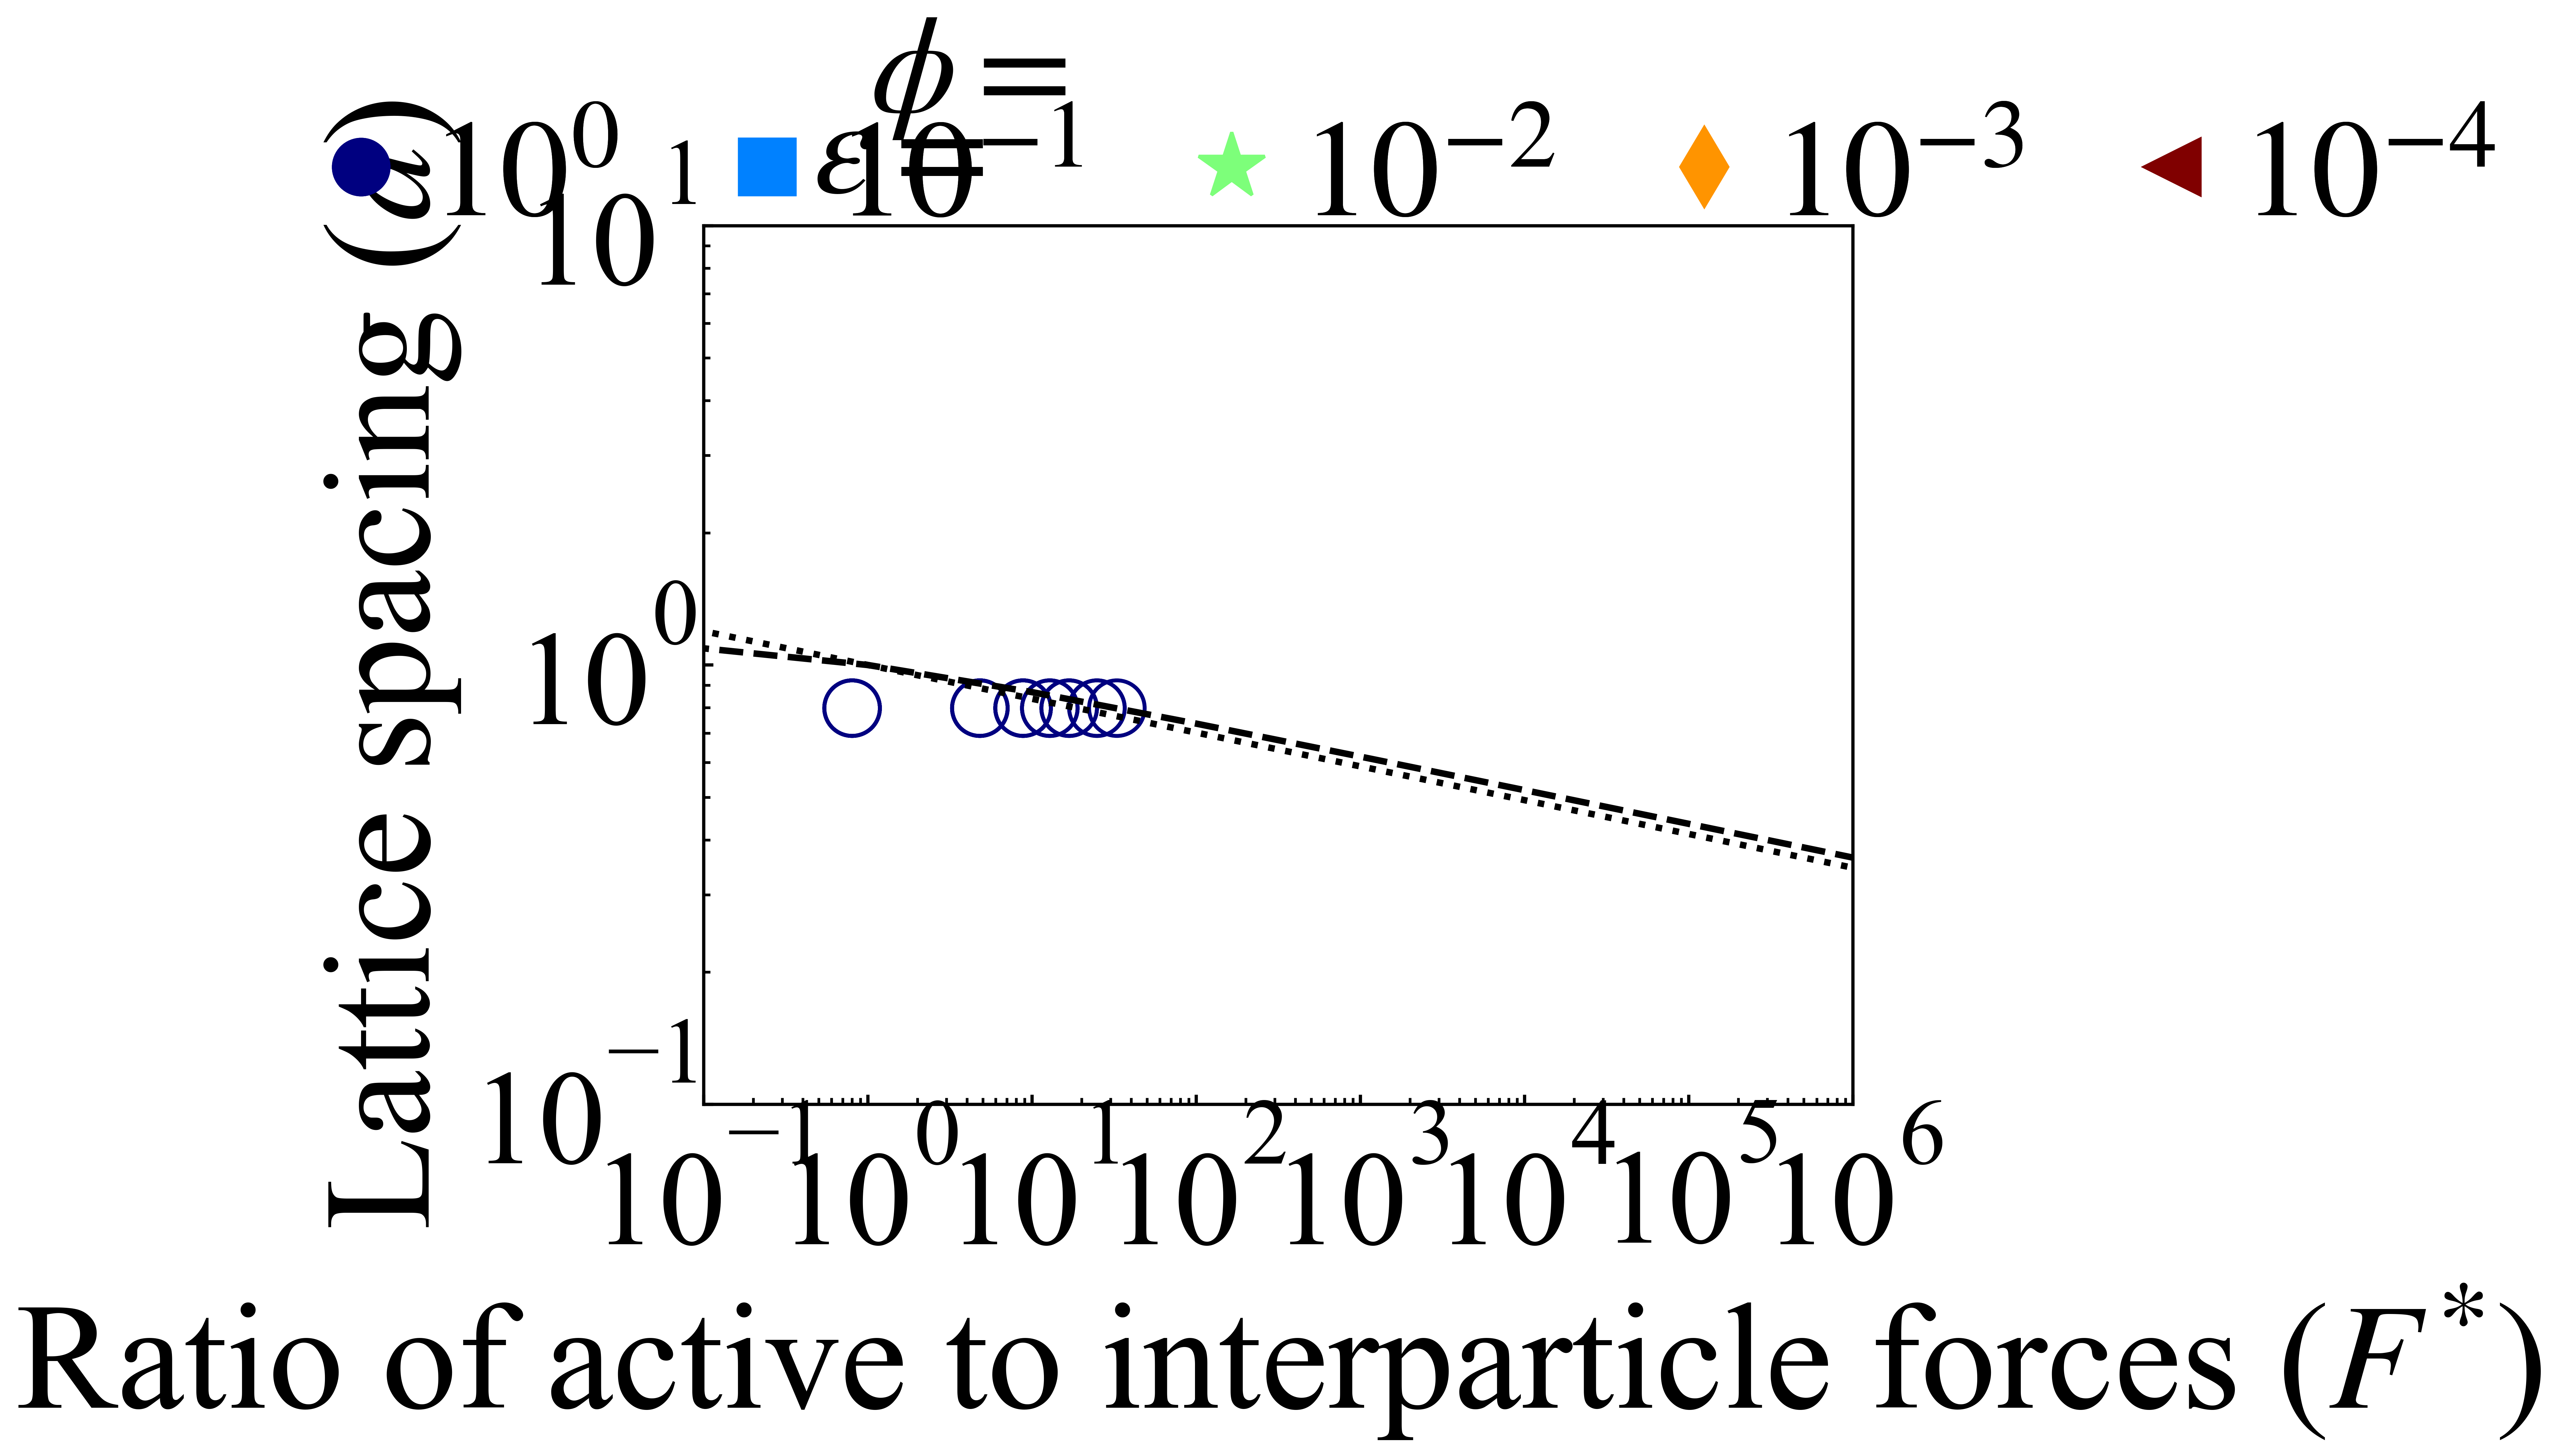

In [61]:
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)
myEps = [1., 0.1, 0.01, 0.001, 0.0001]
mkEps = ['o', 's', '*', 'd', '<']

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
mk='s'
import matplotlib.ticker
from matplotlib import pyplot
med = 1.5
msz = 80.
phiVal = [0.65, 0.55, 0.45]
phiLS = ['-.', ':', '--']
phi_leg = []
for i in range(0, len(phiVal)):
    phi_leg.append(Line2D([0], [0], lw=med, c='k', 
                          markeredgecolor='none', label=phiVal[i], 
                          markerfacecolor='none', markersize=msz, 
                          ls=phiLS[i]))

eps_leg=[]
mkSz = [0.8, 0.8, 1.0, 0.8, 0.8]
msz=10
for i in range(0, len(myEps)):
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
    eps_leg.append(Line2D([0], [0], lw=0., marker=mkEps[i], markeredgewidth=med,
                          markeredgecolor=plt.cm.jet(float(i)/ (len(myEps)-1) ),
                          markerfacecolor=plt.cm.jet(float(i)/ (len(myEps)-1) ),
                          label=r'$10^{{{}}}$'.format(-i), markersize=(3.2*msz * mkSz[i])))

patterns = ['+++', 'xxx', 'ooo']
mkSz = [1.2, 1.0, 2.3, 1.2, 1.2]
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"

fig = plt.figure(figsize=(11, 10))

# The parent gridspec
#gs = gridspec.GridSpec(1, 1, height_ratios=[1,1], figure=fig)
bsSz = 60.

# A more familiar form
ax = []
ax.append(fig.add_subplot())
#ax.append(fig.add_subplot(gs[0]))
#ax.append(fig.add_subplot(gs[1]))

ax[0].text(0.095, 1.03825, r'$\epsilon=$',
           transform=ax[0].transAxes,
           fontsize=fsize*3.2)
one_leg = ax[0].legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[0.57, 1.05],
             fontsize=fsize*3.2, frameon=False, ncol=5)
ax[0].add_artist(one_leg)

#ax[0].text(0.02, 0.92, r'$(a)$', zorder=10,
#           transform=ax[0].transAxes,
#           fontsize=fsize*3.0)

# Add axes for the fstar plot
# Now add inset w/ text

# Plot fstar
#ax[0].plot(fstarRange, fstarLat, ls='-.', c='k', linewidth=1.5*2.0)

def fit(x, *a):
    ret=a[0]*(x**a[1])
    return ret

# Overlay the simulation data
x_plot = np.array([10**(-3), 10**(-2), 10**(-1), 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8])

x_fit = np.array([])
ax[0].plot(fstarRange, fstarLat, ls='--', c='k', linewidth=1.5*2.0)
y_fit = np.array([])
for i in range(0, len(all_pres_new)):
    # Don't plot non-phase-separated data

    x_fit = np.append(x_fit, fStar(params3['peA'][i], params3['eps'][i]))
    y_fit = np.append(y_fit, phiToLat(((all_pres_new[k]['Nb_bulk'][j]+all_pres_new[k]['Na_bulk'][j]) / (bin_area * all_pres_new[k]['NBin_bulk'][j]))*(np.pi/4)))
    ax[0].scatter(fStar(params['peA'][i], params['eps'][i]), phiToLat(((all_pres_new[k]['Nb_bulk'][j]+all_pres_new[k]['Na_bulk'][j]) / (bin_area * all_pres_new[k]['NBin_bulk'][j]))*(np.pi/4)), facecolors='None',
                  edgecolors=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)),
                  s=msz*55*mkSz[0], linewidth=1.2*med,
                  marker=mkEps[0])

#popt, pcov = curve_fit(fit, x_fit, y_fit, [1.0] *2)  
y_fit = ((2.0/2)*x_plot)**(-1/13)
ax[0].plot(x_plot, y_fit, ls='dotted', c='k', linewidth=1.5*2.0)   
# plt.xlim(0, 100000)
ax[0].set_xlim(5,10**6)
ax[0].set_ylim(0.3, 1.)

#ax[0].text(0.49, 0.545, r'$y=1.051x^{-0.078}$',
#           transform=ax[0].transAxes,
#           fontsize=fsize*3.2)

#mpl.rc('font', serif='dejavuserif')
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
#rcParams['font.family'] = 'sans-serif'
ax[0].set_ylabel(r"Lattice spacing ($\mathit{a}$)", fontsize=fsize*3.5)

mpl.rc('font', serif='cm')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
# Set minor ticks
#loc = ticker.MultipleLocator(base=0.125)
#ax[0].yaxis.set_minor_locator(loc)
#loc = ticker.MultipleLocator(base=0.25)
#ax[0].yaxis.set_major_locator(loc)

ax[0].set_xlim([10**(-1), 10**6])
ax[0].set_ylim([10**(-1), 10**1])
locmaj = matplotlib.ticker.LogLocator(base=10.0, numticks=8)
ax[0].xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=9)
ax[0].xaxis.set_minor_locator(locmin)
ax[0].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10.0, numticks=6)
ax[0].yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax[0].text(0.145, 1.13, r'$\phi=$',
           transform=ax[0].transAxes,
           fontsize=fsize*3.2)


#ax[0].text(0.5, 0.545, r'$r^2=$'+str(round(Rsquared, 4)),
#           transform=ax[0].transAxes,
#           fontsize=fsize*3.2)
ax[0].tick_params(axis='x', labelsize=fsize*3.1, pad=10)
ax[0].tick_params(axis='y', labelsize=fsize*3.1)
ax[0].set_xlabel(r'Ratio of active to interparticle forces ($F^{*}$)', fontsize=fsize*3.5)

plt.tight_layout()
#plt.savefig('beta_fit2.png', pad_inches=0.0, dpi=500)
plt.show()